Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fi

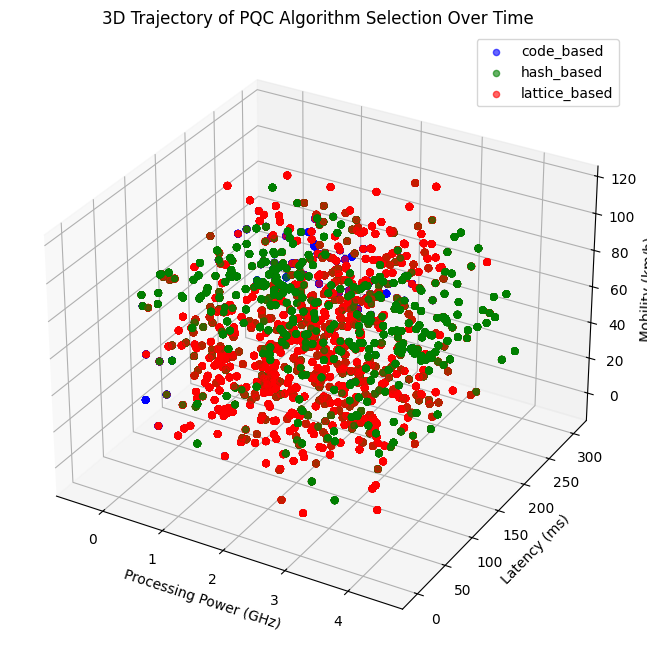

<ipython-input-10-d7f5ab9590df>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")


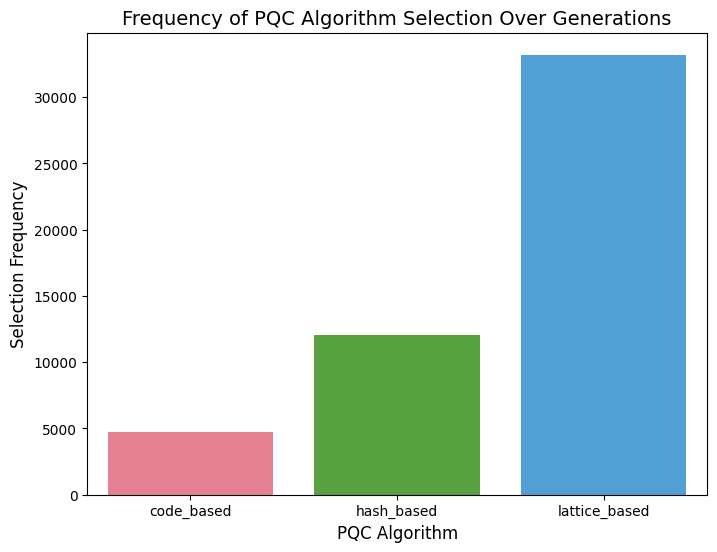

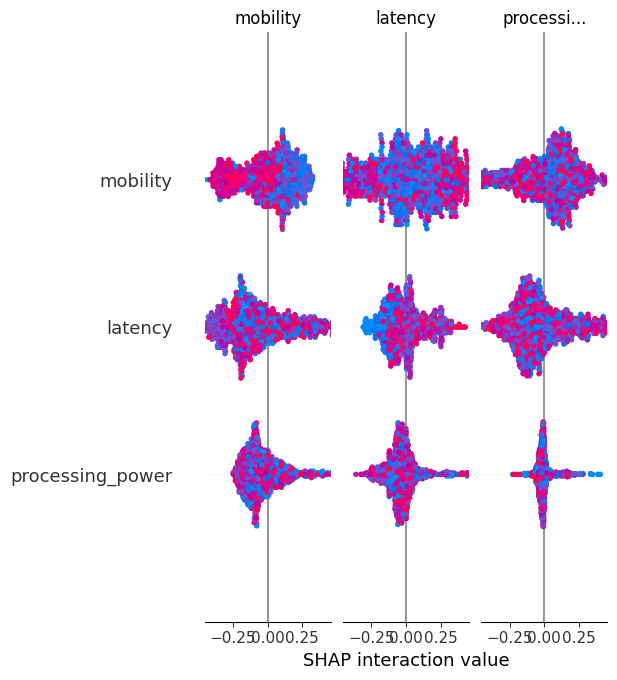

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

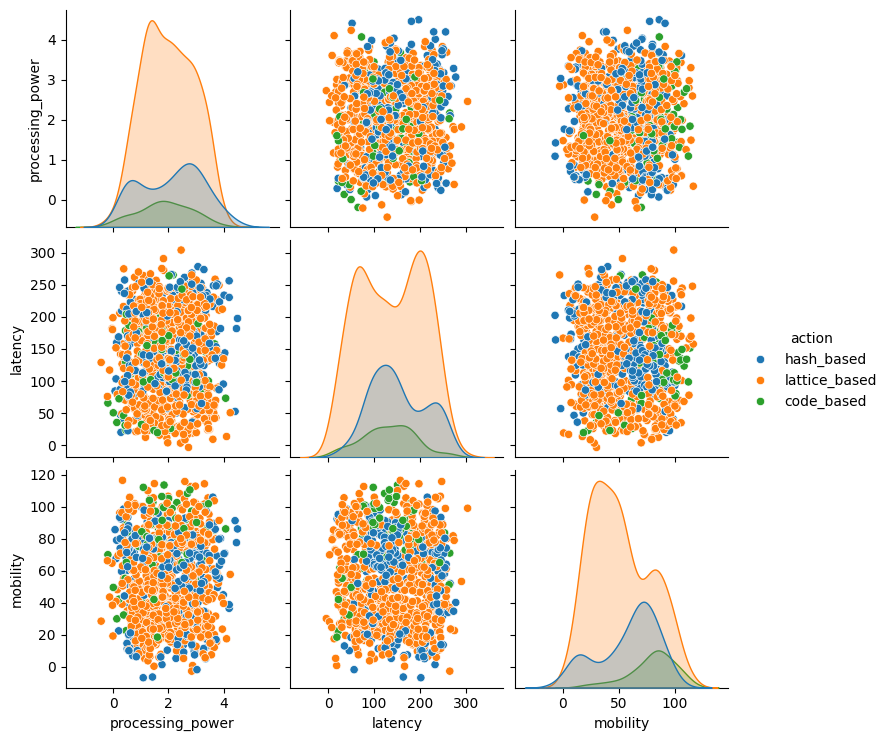

NameError: name 'self' is not defined

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import shap
from collections import Counter
import random

# Set random seed for reproducibility
np.random.seed(674)
random.seed(674)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.encoder = LabelEncoder()
        self.action_history = []  # Stores PQC selections per generation
        self.initialize_population()

    def initialize_population(self):
        """Initialize population with diverse processing power, latency, and mobility values."""
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size)
        })
        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[0.4, 0.3, 0.3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)

    def select_action(self, individual):
        """Predicts PQC algorithm based on learned model."""
        prediction = self.model.predict([individual])[0]
        return self.encoder.inverse_transform([prediction])[0]

    def update_population(self):
        """Simulate changes in vehicular parameters over generations."""
        self.population['processing_power'] += np.random.uniform(-0.1, 0.1, self.population_size)
        self.population['latency'] += np.random.uniform(-5, 5, self.population_size)
        self.population['mobility'] += np.random.uniform(-2, 2, self.population_size)

    def simulate(self):
        """Perform PQC selection using ML model and store history."""
        actions = self.population.apply(lambda x: self.select_action(x.values), axis=1)
        self.action_history.append(actions.tolist())  # Store current generation's selections
        all_labels = [algo for generation in self.action_history for algo in generation]
        encoded_labels = self.encoder.transform(all_labels)
        training_data = pd.concat([self.population] * len(self.action_history), ignore_index=True)
        self.model.fit(training_data, encoded_labels)

    def run(self):
        """Runs the evolutionary simulation over multiple generations."""
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def analyze_algorithm_selection(self):
        """Analyzes and plots the frequency of PQC algorithm selections."""
        all_selections = [algo for generation in self.action_history for algo in generation]
        algo_counts = Counter(all_selections)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm", fontsize=12)
        plt.ylabel("Selection Frequency", fontsize=12)
        plt.title("Frequency of PQC Algorithm Selection Over Generations", fontsize=14)
        plt.show()

    def analyze(self):
        """Explanation of model decisions using SHAP."""
        try:
            explainer = shap.TreeExplainer(self.model)
            shap_values = explainer.shap_values(self.population)
            shap.summary_plot(shap_values, self.population, plot_type="bar")

            # Update population DataFrame to include 'action' for coloring in pairplot
            self.population['action'] = self.population.apply(lambda x: self.select_action(x.values), axis=1)
            sns.pairplot(self.population, hue='action', vars=['processing_power', 'latency', 'mobility'])
            plt.show()
        except Exception as e:
            print(f"Error in SHAP explanation: {e}")

    def plot_3d_trajectory(self):
        """Plots a 3D visualization of PQC selections over time."""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = {'lattice_based': 'r', 'hash_based': 'g', 'code_based': 'b'}

        for generation, gen_population in enumerate(self.action_history):
            actions = np.array(gen_population)  # Convert to numpy array for easy indexing
            unique_actions = np.unique(actions)

            for action in unique_actions:
                mask = actions == action
                ax.scatter(self.population.loc[mask, 'processing_power'],
                           self.population.loc[mask, 'latency'],
                           self.population.loc[mask, 'mobility'],
                           c=colors[action], label=action if generation == 0 else "",
                           alpha=0.6, s=20)

        ax.set_xlabel('Processing Power (GHz)')
        ax.set_ylabel('Latency (ms)')
        ax.set_zlabel('Mobility (km/h)')
        ax.set_title('3D Trajectory of PQC Algorithm Selection Over Time')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

    def print_feature_importance(self):
        importance = self.model.feature_importances_
        for i, v in enumerate(importance):
            print(f'Feature: {self.population.columns[i]}, Score: {v:.5f}')



# Instantiate and run the simulation
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.plot_3d_trajectory()
apmoea.analyze_algorithm_selection()
apmoea.analyze()
apmoea.print_feature_importance()


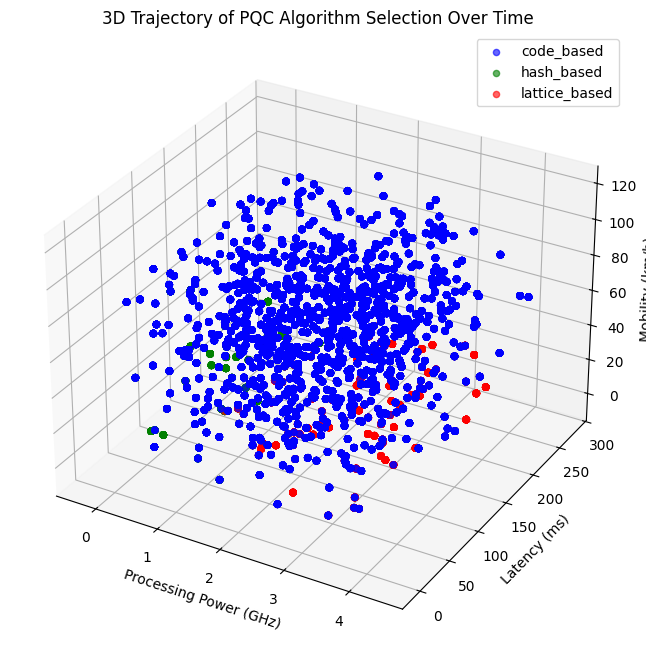

<ipython-input-25-44715eeb8422>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")


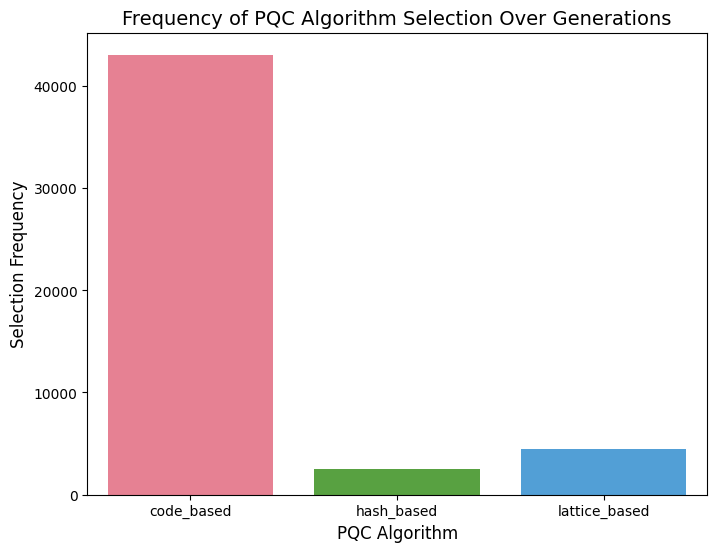

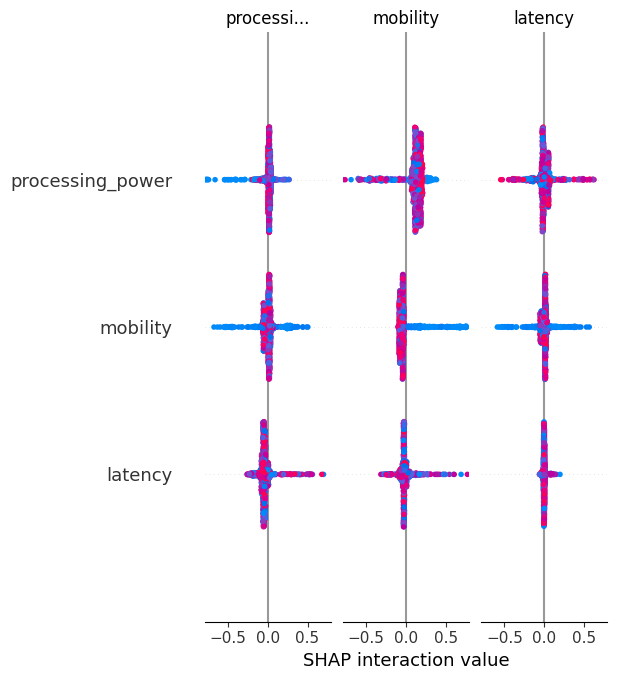

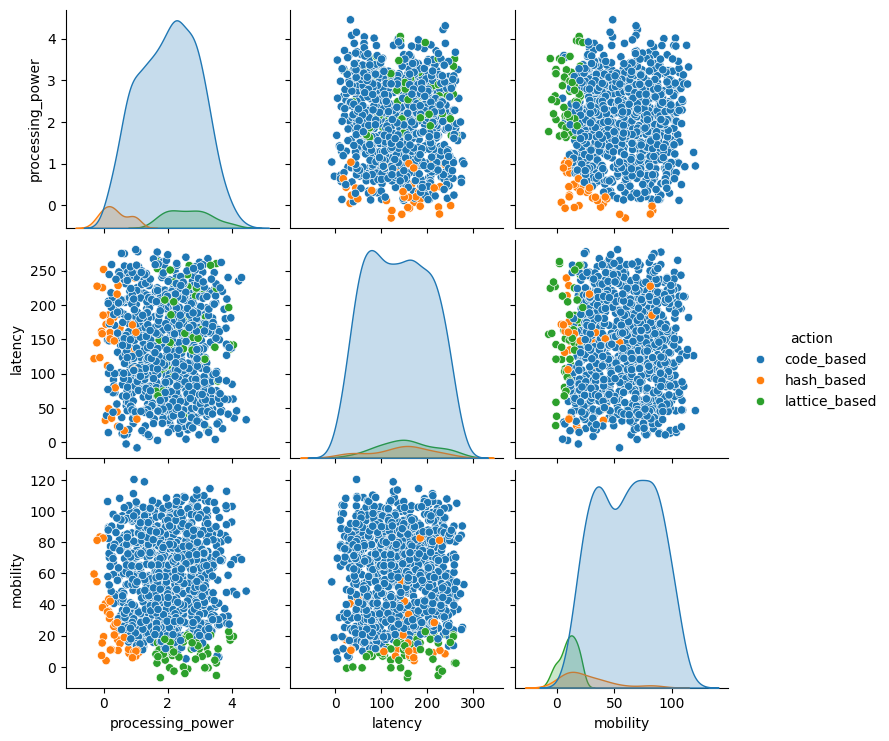

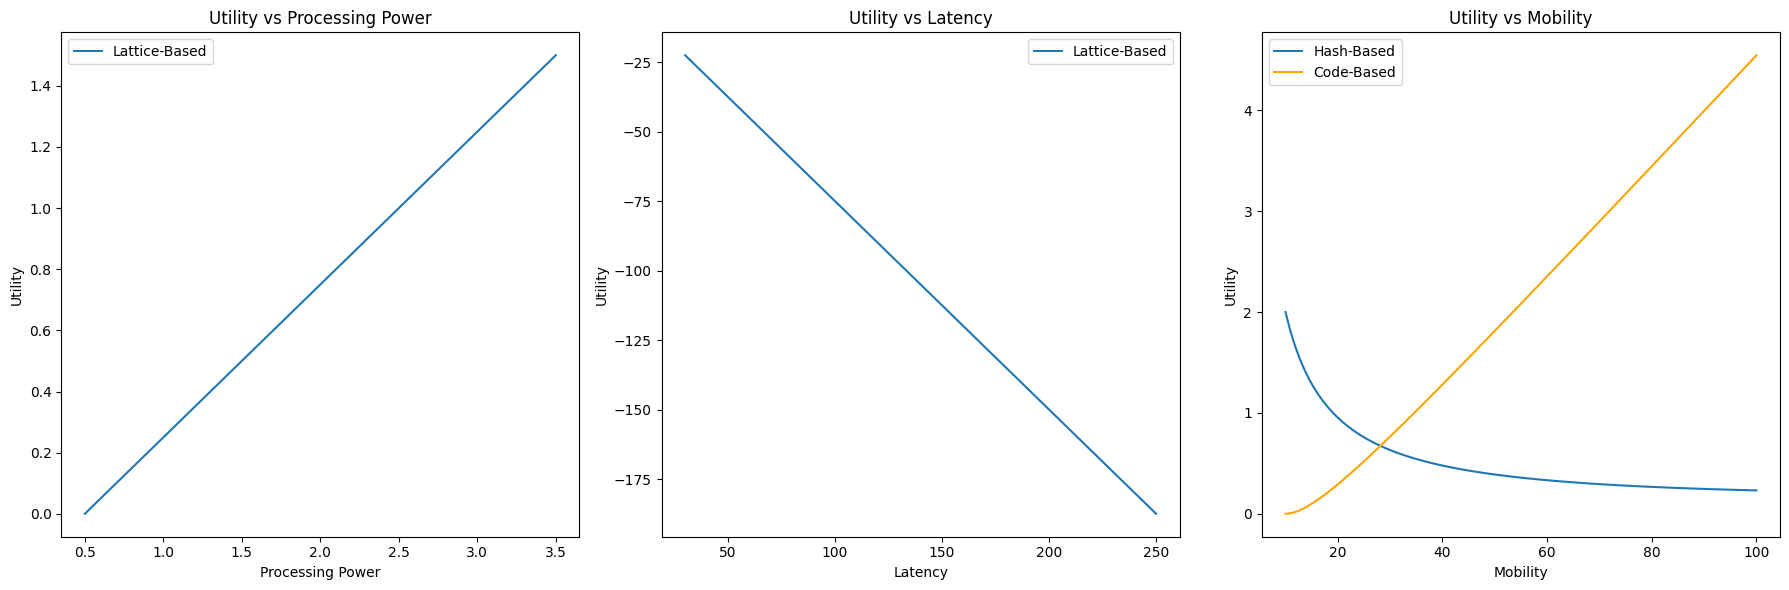

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import shap
from collections import Counter
import random

# Set random seed for reproducibility
np.random.seed(4)
random.seed(4)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.encoder = LabelEncoder()
        self.action_history = []  # Stores PQC selections per generation
        self.initialize_population()

    def initialize_population(self):
        """Initialize population with diverse processing power, latency, and mobility values."""
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size)
        })
        # Encode initial random actions
        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[1/3, 1/3, 1/3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)


    def select_action(self, individual):
        # Normalize features
        norm_processing_power = (individual['processing_power'] - self.population['processing_power'].min()) / \
                            (self.population['processing_power'].max() - self.population['processing_power'].min())
        norm_latency = (individual['latency'] - self.population['latency'].min()) / \
                   (self.population['latency'].max() - self.population['latency'].min())
        norm_mobility = (individual['mobility'] - self.population['mobility'].min()) / \
                    (self.population['mobility'].max() - self.population['mobility'].min())

        # Adjusted utility scores
        utility_scores = {
            'lattice_based': 2.0 * norm_processing_power - 0.5 * norm_latency,  # Reduced impact of latency
            'hash_based': 0.05 * norm_mobility + 0.2 / (0.1 + norm_latency),    # Reduced mobility impact and increased latency impact
            'code_based': 5.0 * (norm_mobility * norm_processing_power) / (0.1 + norm_latency)  # Increased overall impact
        }
        return max(utility_scores, key=utility_scores.get)



    def update_population(self):
        """Simulate changes in vehicular parameters over generations."""
        self.population['processing_power'] += np.random.uniform(-0.1, 0.1, self.population_size)
        self.population['latency'] += np.random.uniform(-5, 5, self.population_size)
        self.population['mobility'] += np.random.uniform(-2, 2, self.population_size)

    def simulate(self):
        """Perform PQC selection using ML model and store history."""
        actions = [self.select_action(row) for index, row in self.population.iterrows()]
        self.action_history.append(actions)
        encoded_actions = self.encoder.transform(actions)
        self.model.fit(self.population, encoded_actions)

    def run(self):
        """Runs the evolutionary simulation over multiple generations."""
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def analyze_algorithm_selection(self):
        """Analyzes and plots the frequency of PQC algorithm selections."""
        all_selections = [algo for generation in self.action_history for algo in generation]
        algo_counts = Counter(all_selections)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm", fontsize=12)
        plt.ylabel("Selection Frequency", fontsize=12)
        plt.title("Frequency of PQC Algorithm Selection Over Generations", fontsize=14)
        plt.show()

    def analyze(self):
        """Explanation of model decisions using SHAP."""
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(self.population)
        shap.summary_plot(shap_values, self.population, plot_type="bar")

        # Update population DataFrame to include 'action' for coloring in pairplot
        self.population['action'] = [self.select_action(row) for index, row in self.population.iterrows()]
        sns.pairplot(self.population, hue='action', vars=['processing_power', 'latency', 'mobility'])
        plt.show()

    def plot_3d_trajectory(self):
        """Plots a 3D visualization of PQC selections over time."""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = {'lattice_based': 'r', 'hash_based': 'g', 'code_based': 'b'}

        for generation, actions in enumerate(self.action_history):
            for action in np.unique(actions):
                mask = [idx for idx, act in enumerate(actions) if act == action]
                ax.scatter(self.population.loc[mask, 'processing_power'],
                           self.population.loc[mask, 'latency'],
                           self.population.loc[mask, 'mobility'],
                           c=colors[action], label=action if generation == 0 else "",
                           alpha=0.6, s=20)

        ax.set_xlabel('Processing Power (GHz)')
        ax.set_ylabel('Latency (ms)')
        ax.set_zlabel('Mobility (km/h)')
        ax.set_title('3D Trajectory of PQC Algorithm Selection Over Time')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

    def plot_utility_curves(model):
        # Generate a range of values for each parameter
        processing_power_range = np.linspace(0.5, 3.5, 100)
        latency_range = np.linspace(30, 250, 100)
        mobility_range = np.linspace(10, 100, 100)

        # Calculate median values for holding other parameters constant
        median_latency = np.median(latency_range)
        median_mobility = np.median(mobility_range)
        median_processing_power = np.median(processing_power_range)

        # Normalize the parameter ranges
        norm_processing_power_range = (processing_power_range - 0.5) / (3.5 - 0.5)
        norm_latency_range = (latency_range - 30) / (250 - 30)
        norm_mobility_range = (mobility_range - 10) / (100 - 10)

        # Calculate utility values for varying each parameter using updated coefficients
        utility_lattice = 2.0 * norm_processing_power_range - 0.5 * norm_latency_range
        utility_hash = 0.05 * norm_mobility_range + 0.2 / (0.1 + norm_latency_range)
        utility_code = 5.0 * (norm_mobility_range * norm_processing_power_range) / (0.1 + norm_latency_range)

        # Plotting
        plt.figure(figsize=(18, 6))

        # Processing Power Impact on Utility
        plt.subplot(1, 3, 1)
        plt.plot(processing_power_range, utility_lattice, label='Lattice-Based')
        plt.title('Utility vs Processing Power')
        plt.xlabel('Processing Power')
        plt.ylabel('Utility')
        plt.legend()

        # Latency Impact on Utility
        plt.subplot(1, 3, 2)
        plt.plot(latency_range, -0.75 * latency_range, label='Lattice-Based')  # assuming other factors held constant
        plt.title('Utility vs Latency')
        plt.xlabel('Latency')
        plt.ylabel('Utility')
        plt.legend()

        # Mobility Impact on Utility
        plt.subplot(1, 3, 3)
        plt.plot(mobility_range, utility_hash, label='Hash-Based')
        plt.plot(mobility_range, utility_code, label='Code-Based', color='orange')
        plt.title('Utility vs Mobility')
        plt.xlabel('Mobility')
        plt.ylabel('Utility')
        plt.legend()

        plt.tight_layout()
        plt.show()


# Instantiate and run the simulation
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.plot_3d_trajectory()
apmoea.analyze_algorithm_selection()
apmoea.analyze()
apmoea.plot_utility_curves()


In [ ]:
self.ohe = OneHotEncoder(sparse=False)
self.ohe = OneHotEncoder(sparse_output=False)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

#with weather and other factors

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new t

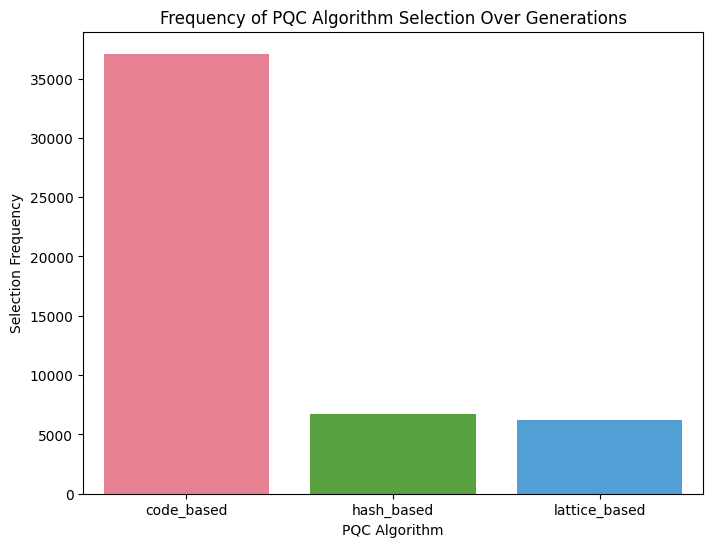

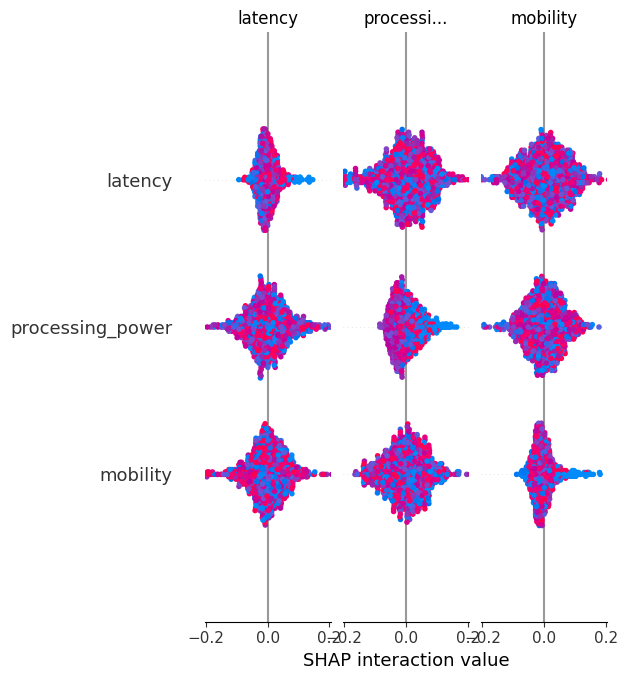

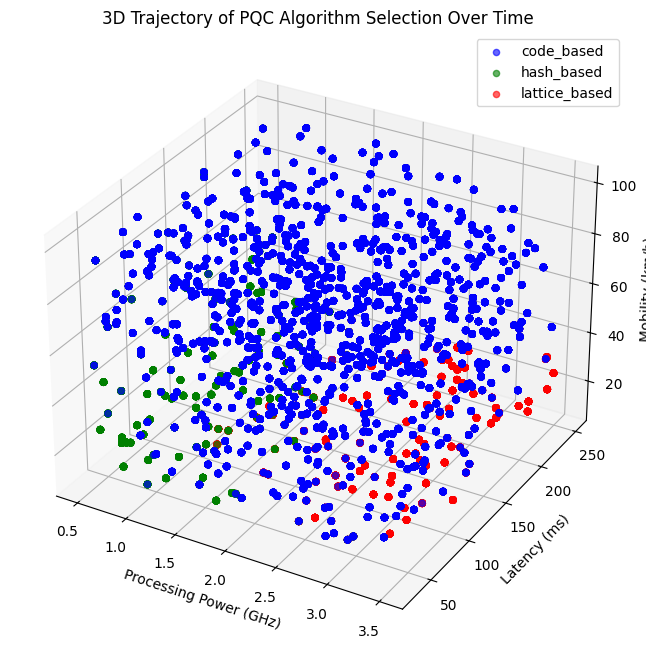

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import shap
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Set random seed
np.random.seed(4)
random.seed(4)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)
        self.encoder = LabelEncoder()
        self.ohe = OneHotEncoder(sparse_output=False)
        self.action_history = []
        self.initialize_population()

    def initialize_population(self):
        """Initialize population with diverse vehicular and environmental parameters."""
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size),
            'signal_strength': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'road_type': np.random.choice(['city', 'country', 'highway'], self.population_size),
            'weather': np.random.choice(['clear', 'rain', 'fog', 'snow'], self.population_size),
            'network_congestion': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'interference': np.random.uniform(0, 1, self.population_size)
        })

        # Encode categorical features
        self.encode_features()

        # Initialize random actions
        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[1/3, 1/3, 1/3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)

    def encode_features(self):
        """Encodes categorical variables into numerical representations."""
        categorical_features = ['road_type', 'weather', 'signal_strength', 'network_congestion']
        encoded_cats = self.ohe.fit_transform(self.population[categorical_features])
        encoded_df = pd.DataFrame(encoded_cats, columns=self.ohe.get_feature_names_out(categorical_features))

        # Drop original categorical columns and append encoded ones
        self.population = self.population.drop(columns=categorical_features).reset_index(drop=True)
        self.population = pd.concat([self.population, encoded_df], axis=1)

    def normalize_population(self):
        """Normalize numerical features for proper decision-making."""
        self.population['norm_processing_power'] = (self.population['processing_power'] - 0.5) / (3.5 - 0.5)
        self.population['norm_latency'] = (self.population['latency'] - 30) / (250 - 30)
        self.population['norm_mobility'] = (self.population['mobility'] - 10) / (100 - 10)
        self.population['norm_interference'] = self.population['interference']

    def select_action(self, individual):
        """Selects an optimal PQC algorithm based on normalized and environmental parameters."""
        # Compute utility scores considering environmental effects
        utility_scores = {
            'lattice_based': 2.0 * individual['norm_processing_power'] - 0.5 * individual['norm_latency'],
            'hash_based': 0.05 * individual['norm_mobility'] + 0.2 / (0.1 + individual['norm_latency']),
            'code_based': 5.0 * (individual['norm_mobility'] * individual['norm_processing_power']) / (0.1 + individual['norm_latency'])
        }

        return max(utility_scores, key=utility_scores.get)

    def update_population(self):
        """Simulate dynamic changes in vehicular and environmental parameters."""
        self.population['processing_power'] = np.clip(self.population['processing_power'] + np.random.uniform(-0.1, 0.1, self.population_size), 0.5, 3.5)
        self.population['latency'] = np.clip(self.population['latency'] + np.random.uniform(-5, 5, self.population_size), 30, 250)
        self.population['mobility'] = np.clip(self.population['mobility'] + np.random.uniform(-2, 2, self.population_size), 10, 100)
        self.population['interference'] = np.clip(self.population['interference'] + np.random.uniform(-0.1, 0.1, self.population_size), 0, 1)

    def simulate(self):
        """Perform PQC selection using the updated utility-based model."""
        self.normalize_population()
        actions = [self.select_action(row) for _, row in self.population.iterrows()]
        self.action_history.append(actions)
        encoded_actions = self.encoder.transform(actions)
        self.model.fit(self.population, encoded_actions)

    def run(self):
        """Run the simulation across multiple generations."""
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def analyze_algorithm_selection(self):
        """Visualize frequency of PQC algorithm selections."""
        algo_counts = Counter(algo for generation in self.action_history for algo in generation)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm")
        plt.ylabel("Selection Frequency")
        plt.title("Frequency of PQC Algorithm Selection Over Generations")
        plt.show()

    def analyze(self):
        """Explain model decisions using SHAP."""
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(self.population)
        shap.summary_plot(shap_values, self.population, plot_type="bar")

    def plot_3d_trajectory(self):
        """3D visualization of PQC selections over time."""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = {'lattice_based': 'r', 'hash_based': 'g', 'code_based': 'b'}

        for generation, actions in enumerate(self.action_history):
            for action in np.unique(actions):
                mask = [idx for idx, act in enumerate(actions) if act == action]
                ax.scatter(self.population.loc[mask, 'processing_power'],
                           self.population.loc[mask, 'latency'],
                           self.population.loc[mask, 'mobility'],
                           c=colors[action], label=action if generation == 0 else "",
                           alpha=0.6, s=20)

        ax.set_xlabel('Processing Power (GHz)')
        ax.set_ylabel('Latency (ms)')
        ax.set_zlabel('Mobility (km/h)')
        ax.set_title('3D Trajectory of PQC Algorithm Selection Over Time')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

# Run simulation and generate insights
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.analyze_algorithm_selection()
apmoea.analyze()
apmoea.plot_3d_trajectory()


Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForest

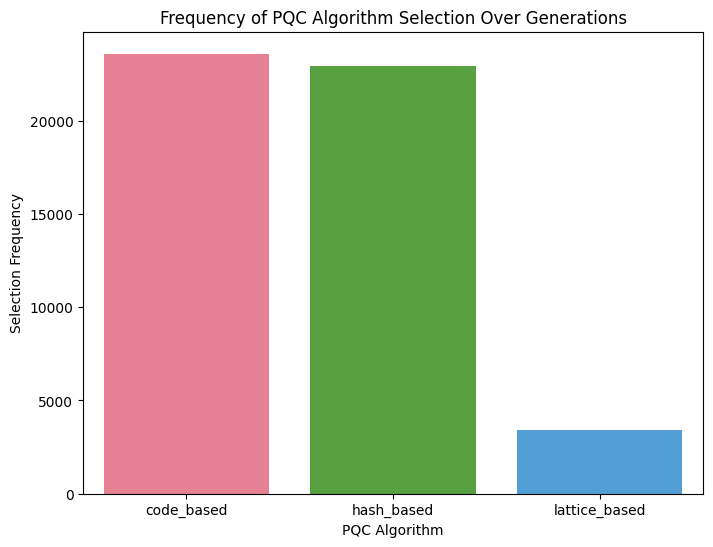

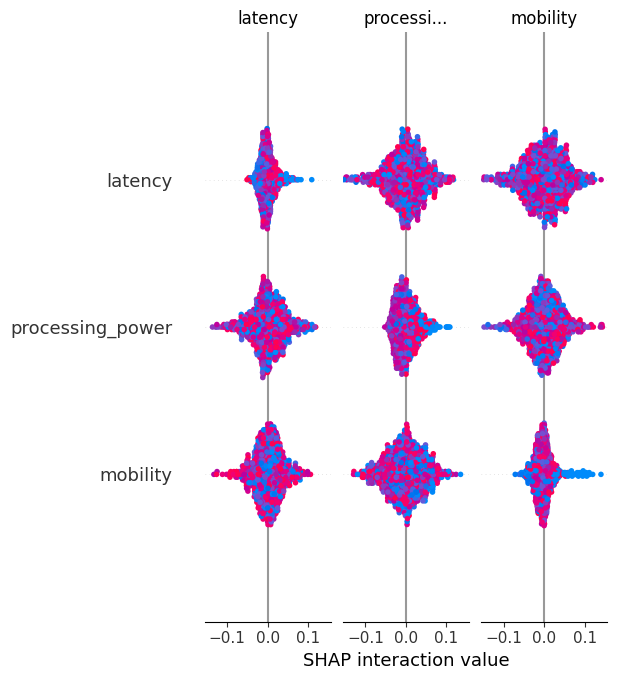

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import shap
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Set random seed
np.random.seed(4)
random.seed(4)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)
        self.encoder = LabelEncoder()
        self.ohe = OneHotEncoder(sparse_output=False)
        self.action_history = []
        self.utility_params = None  # Store optimized weights
        self.initialize_population()

    def initialize_population(self):
        """Initialize population with vehicular and environmental parameters."""
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size),
            'signal_strength': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'road_type': np.random.choice(['city', 'country', 'highway'], self.population_size),
            'weather': np.random.choice(['clear', 'rain', 'fog', 'snow'], self.population_size),
            'network_congestion': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'interference': np.random.uniform(0, 1, self.population_size)
        })

        # Encode categorical features
        self.encode_features()

        # Normalize features
        self.normalize_population()

        # Initialize random actions
        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[1/3, 1/3, 1/3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)

    def encode_features(self):
        """Encodes categorical variables into numerical representations."""
        categorical_features = ['road_type', 'weather', 'signal_strength', 'network_congestion']
        encoded_cats = self.ohe.fit_transform(self.population[categorical_features])
        encoded_df = pd.DataFrame(encoded_cats, columns=self.ohe.get_feature_names_out(categorical_features))

        # Drop original categorical columns and append encoded ones
        self.population = self.population.drop(columns=categorical_features).reset_index(drop=True)
        self.population = pd.concat([self.population, encoded_df], axis=1)

    def normalize_population(self):
        """Normalize numerical features for proper decision-making."""
        self.population['norm_processing_power'] = (self.population['processing_power'] - 0.5) / (3.5 - 0.5)
        self.population['norm_latency'] = (self.population['latency'] - 30) / (250 - 30)
        self.population['norm_mobility'] = (self.population['mobility'] - 10) / (100 - 10)
        self.population['norm_interference'] = self.population['interference']

    def utility_function(self, params, individual):
        """Parameterized utility function with optimized hyperparameters."""
        proc_w, lat_w, mob_w, road_w, weather_w, signal_w, congestion_w = params

        # Compute utility scores with learned hyperparameters
        utility_scores = {
            'lattice_based': proc_w * individual['norm_processing_power'] - lat_w * individual['norm_latency'],
            'hash_based': mob_w * individual['norm_mobility'] + 0.2 / (0.1 + individual['norm_latency']),
            'code_based': 5.0 * (individual['norm_mobility'] * individual['norm_processing_power']) / (0.1 + individual['norm_latency'])
        }

        return max(utility_scores, key=utility_scores.get)

    def optimize_hyperparameters(self):
        """Optimize the weights used in the utility function."""
        self.normalize_population()  # Ensure normalized features are available

        def objective(params):
            """Objective function to maximize correct PQC selections."""
            correct = 0
            for _, row in self.population.iterrows():
                action = self.utility_function(params, row)
                encoded_action = self.encoder.transform([action])[0]
                predicted = self.model.predict([row.values])[0]
                if encoded_action == predicted:
                    correct += 1
            return -correct  # Maximize correct selections

        # Initial guess for weights
        initial_params = [2.0, 0.5, 0.05, 0.2, 0.3, 0.4, 0.5]
        bounds = [(0, 5)] * len(initial_params)  # Allowable ranges for weights

        # Run optimization
        result = minimize(objective, initial_params, bounds=bounds, method='Powell')
        self.utility_params = result.x  # Store best parameters

    def update_population(self):
        """Simulate dynamic changes in vehicular and environmental parameters."""
        self.population['processing_power'] = np.clip(self.population['processing_power'] + np.random.uniform(-0.1, 0.1, self.population_size), 0.5, 3.5)
        self.population['latency'] = np.clip(self.population['latency'] + np.random.uniform(-5, 5, self.population_size), 30, 250)
        self.population['mobility'] = np.clip(self.population['mobility'] + np.random.uniform(-2, 2, self.population_size), 10, 100)
        self.population['interference'] = np.clip(self.population['interference'] + np.random.uniform(-0.1, 0.1, self.population_size), 0, 1)
        self.normalize_population()

    def simulate(self):
        """Perform PQC selection using optimized utility-based model."""
        actions = [self.utility_function(self.utility_params, row) for _, row in self.population.iterrows()]
        self.action_history.append(actions)
        encoded_actions = self.encoder.transform(actions)
        self.model.fit(self.population, encoded_actions)

    def run(self):
        """Run the simulation across multiple generations."""
        self.optimize_hyperparameters()  # Tune utility function before running
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def analyze_algorithm_selection(self):
        """Visualize frequency of PQC algorithm selections."""
        algo_counts = Counter(algo for generation in self.action_history for algo in generation)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm")
        plt.ylabel("Selection Frequency")
        plt.title("Frequency of PQC Algorithm Selection Over Generations")
        plt.show()

    def analyze(self):
        """Explain model decisions using SHAP."""
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(self.population)
        shap.summary_plot(shap_values, self.population, plot_type="bar")

# Run simulation and generate insights
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.analyze_algorithm_selection()
apmoea.analyze()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fi

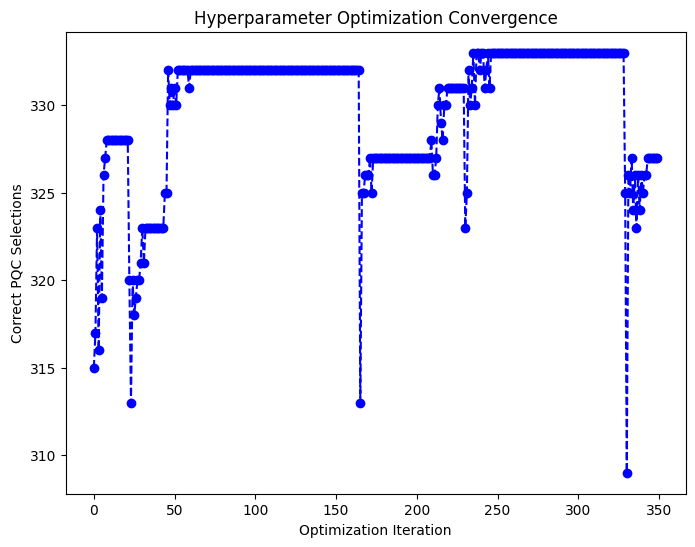

<ipython-input-11-d8db12a7c7ee>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")


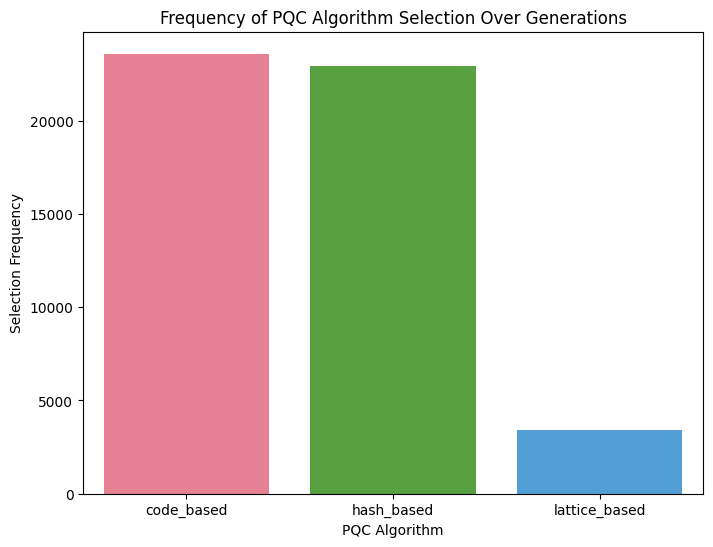

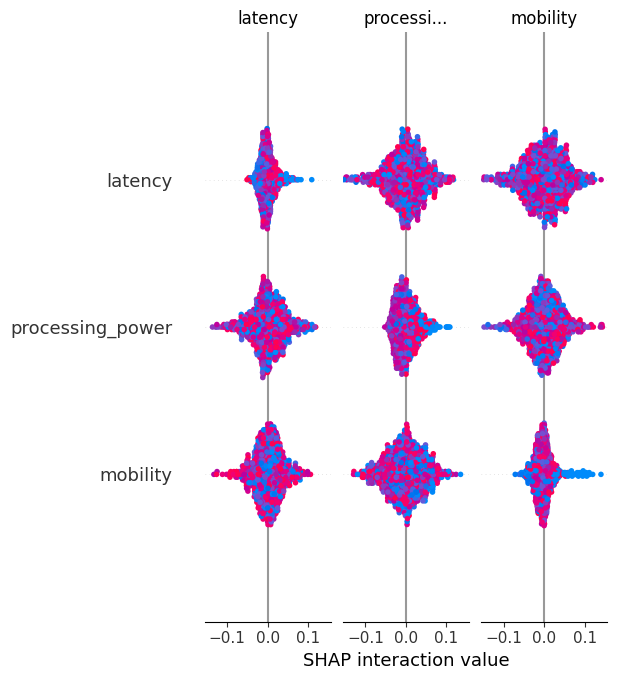

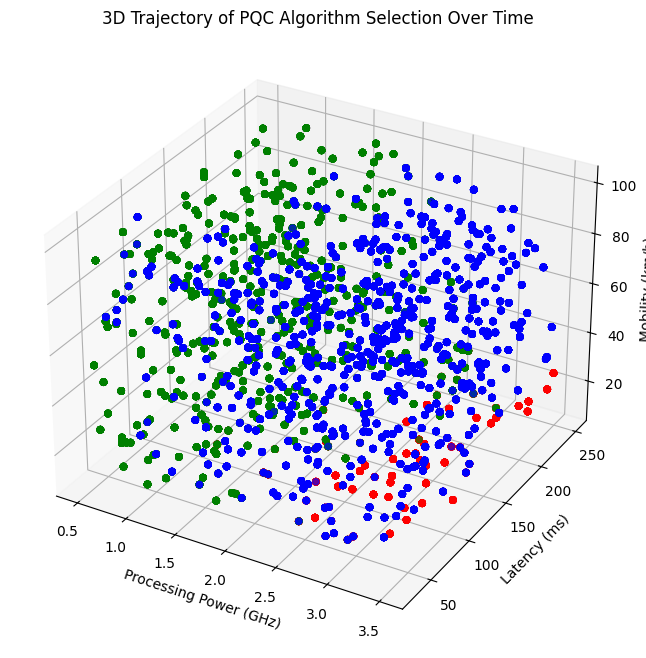

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import shap
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Set random seed
np.random.seed(4)
random.seed(4)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)
        self.encoder = LabelEncoder()
        self.ohe = OneHotEncoder(sparse_output=False)
        self.action_history = []
        self.utility_params = None  # Store optimized weights
        self.optimization_history = []  # Store hyperparameter convergence
        self.initialize_population()

    def initialize_population(self):
        """Initialize population with vehicular and environmental parameters."""
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size),
            'signal_strength': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'road_type': np.random.choice(['city', 'country', 'highway'], self.population_size),
            'weather': np.random.choice(['clear', 'rain', 'fog', 'snow'], self.population_size),
            'network_congestion': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'interference': np.random.uniform(0, 1, self.population_size)
        })

        # Encode categorical features
        self.encode_features()

        # Normalize features
        self.normalize_population()

        # Initialize random actions
        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[1/3, 1/3, 1/3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)

    def encode_features(self):
        """Encodes categorical variables into numerical representations."""
        categorical_features = ['road_type', 'weather', 'signal_strength', 'network_congestion']
        encoded_cats = self.ohe.fit_transform(self.population[categorical_features])
        encoded_df = pd.DataFrame(encoded_cats, columns=self.ohe.get_feature_names_out(categorical_features))

        # Drop original categorical columns and append encoded ones
        self.population = self.population.drop(columns=categorical_features).reset_index(drop=True)
        self.population = pd.concat([self.population, encoded_df], axis=1)

    def normalize_population(self):
        """Normalize numerical features for proper decision-making."""
        self.population['norm_processing_power'] = (self.population['processing_power'] - 0.5) / (3.5 - 0.5)
        self.population['norm_latency'] = (self.population['latency'] - 30) / (250 - 30)
        self.population['norm_mobility'] = (self.population['mobility'] - 10) / (100 - 10)
        self.population['norm_interference'] = self.population['interference']

    def utility_function(self, params, individual):
        """Parameterized utility function with optimized hyperparameters."""
        proc_w, lat_w, mob_w, road_w, weather_w, signal_w, congestion_w = params

        # Compute utility scores with learned hyperparameters
        utility_scores = {
            'lattice_based': proc_w * individual['norm_processing_power'] - lat_w * individual['norm_latency'],
            'hash_based': mob_w * individual['norm_mobility'] + 0.2 / (0.1 + individual['norm_latency']),
            'code_based': 5.0 * (individual['norm_mobility'] * individual['norm_processing_power']) / (0.1 + individual['norm_latency'])
        }

        return max(utility_scores, key=utility_scores.get)

    def optimize_hyperparameters(self):
        """Optimize the weights used in the utility function."""
        self.normalize_population()  # Ensure normalized features are available

        def objective(params):
            """Objective function to maximize correct PQC selections."""
            correct = 0
            for _, row in self.population.iterrows():
                action = self.utility_function(params, row)
                encoded_action = self.encoder.transform([action])[0]
                predicted = self.model.predict([row.values])[0]
                if encoded_action == predicted:
                    correct += 1
            self.optimization_history.append(correct)  # Track optimization progress
            return -correct  # Maximize correct selections

        # Initial guess for weights
        initial_params = [2.0, 0.5, 0.05, 0.2, 0.3, 0.4, 0.5]
        bounds = [(0, 5)] * len(initial_params)  # Allowable ranges for weights

        # Run optimization
        result = minimize(objective, initial_params, bounds=bounds, method='Powell')
        self.utility_params = result.x  # Store best parameters

    def update_population(self):
        """Simulate dynamic changes in vehicular and environmental parameters."""
        self.population['processing_power'] = np.clip(self.population['processing_power'] + np.random.uniform(-0.1, 0.1, self.population_size), 0.5, 3.5)
        self.population['latency'] = np.clip(self.population['latency'] + np.random.uniform(-5, 5, self.population_size), 30, 250)
        self.population['mobility'] = np.clip(self.population['mobility'] + np.random.uniform(-2, 2, self.population_size), 10, 100)
        self.population['interference'] = np.clip(self.population['interference'] + np.random.uniform(-0.1, 0.1, self.population_size), 0, 1)
        self.normalize_population()

    def simulate(self):
        """Perform PQC selection using optimized utility-based model."""
        actions = [self.utility_function(self.utility_params, row) for _, row in self.population.iterrows()]
        self.action_history.append(actions)
        encoded_actions = self.encoder.transform(actions)
        self.model.fit(self.population, encoded_actions)

    def run(self):
        """Run the simulation across multiple generations."""
        self.optimize_hyperparameters()  # Tune utility function before running
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def plot_hyperparameter_convergence(self):
        """Plot convergence of hyperparameter tuning."""
        plt.figure(figsize=(8, 6))
        plt.plot(self.optimization_history, marker='o', linestyle='--', color='b')
        plt.xlabel("Optimization Iteration")
        plt.ylabel("Correct PQC Selections")
        plt.title("Hyperparameter Optimization Convergence")
        plt.show()

    def analyze_algorithm_selection(self):
        """Visualize frequency of PQC algorithm selections."""
        algo_counts = Counter(algo for generation in self.action_history for algo in generation)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm")
        plt.ylabel("Selection Frequency")
        plt.title("Frequency of PQC Algorithm Selection Over Generations")
        plt.show()

    def analyze(self):
        """Explain model decisions using SHAP."""
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(self.population)
        shap.summary_plot(shap_values, self.population, plot_type="bar")

    def plot_3d_trajectory(self):
        """3D visualization of PQC selections over time."""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = {'lattice_based': 'r', 'hash_based': 'g', 'code_based': 'b'}

        for generation, actions in enumerate(self.action_history):
            for action in np.unique(actions):
                mask = [idx for idx, act in enumerate(actions) if act == action]
                ax.scatter(self.population.loc[mask, 'processing_power'],
                           self.population.loc[mask, 'latency'],
                           self.population.loc[mask, 'mobility'],
                           c=colors[action], label=action if generation == 0 else "",
                           alpha=0.6, s=20)

        ax.set_xlabel('Processing Power (GHz)')
        ax.set_ylabel('Latency (ms)')
        ax.set_zlabel('Mobility (km/h)')
        ax.set_title('3D Trajectory of PQC Algorithm Selection Over Time')
        plt.show()


# Run simulation and generate insights
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.plot_hyperparameter_convergence()
apmoea.analyze_algorithm_selection()
apmoea.analyze()
apmoea.plot_3d_trajectory()

#RL based approach and improvement

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fi

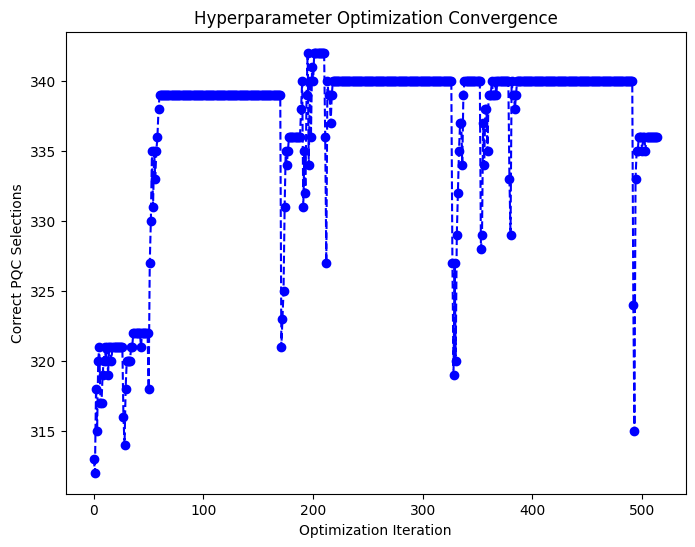

<ipython-input-2-2638fa58d6dd>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")


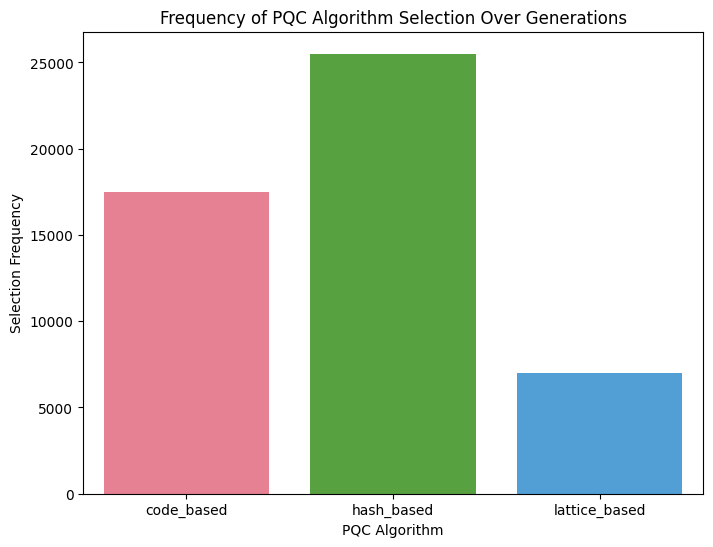

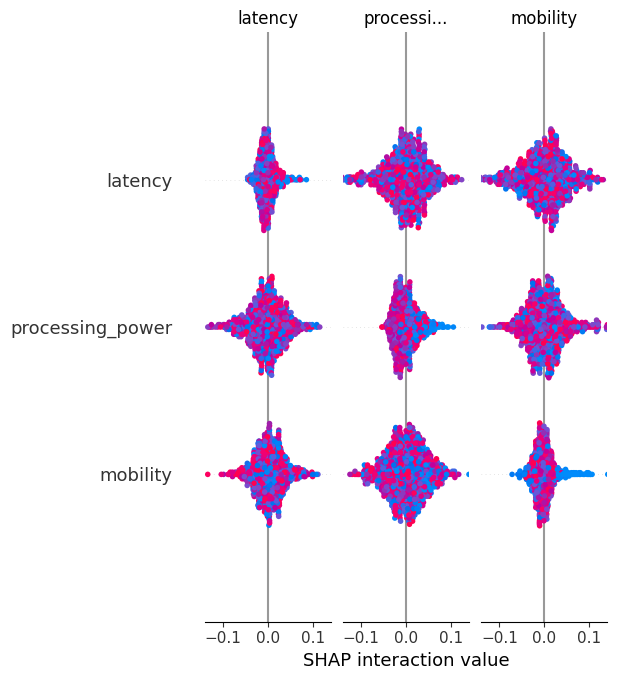

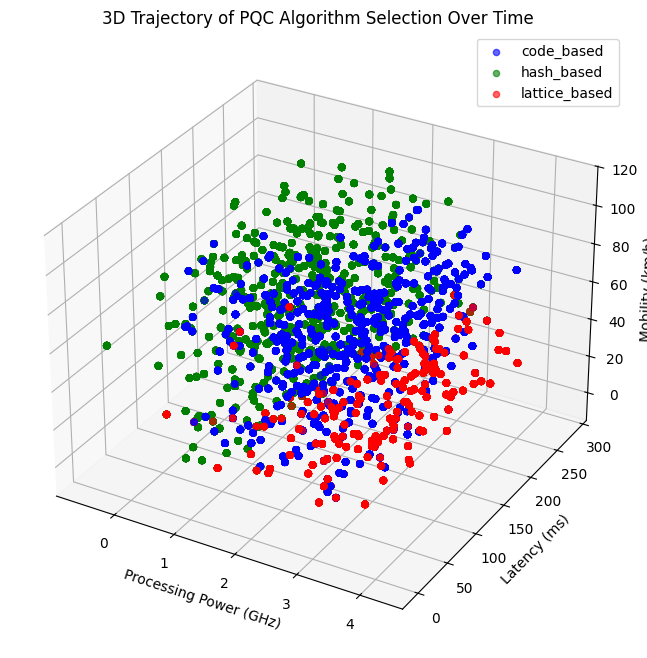

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import shap
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Set random seed
np.random.seed(4)
random.seed(4)

class APMOEA:
    def __init__(self, population_size, max_generations):
        self.population_size = population_size
        self.max_generations = max_generations
        self.population = pd.DataFrame()
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, warm_start=True)
        self.encoder = LabelEncoder()
        self.ohe = OneHotEncoder(sparse_output=False)
        self.action_history = []
        self.utility_params = None
        self.optimization_history = []
        self.initialize_population()

    def initialize_population(self):
        self.population = pd.DataFrame({
            'processing_power': np.random.uniform(0.5, 3.5, self.population_size),
            'latency': np.random.uniform(30, 250, self.population_size),
            'mobility': np.random.uniform(10, 100, self.population_size),
            'signal_strength': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'road_type': np.random.choice(['city', 'country', 'highway'], self.population_size),
            'weather': np.random.choice(['clear', 'rain', 'fog', 'snow'], self.population_size),
            'network_congestion': np.random.choice(['low', 'medium', 'high'], self.population_size),
            'interference': np.random.uniform(0, 1, self.population_size)
        })
        self.encode_features()
        self.normalize_population()

        initial_actions = np.random.choice(['lattice_based', 'hash_based', 'code_based'],
                                           self.population_size, p=[1/3, 1/3, 1/3])
        self.encoded_actions = self.encoder.fit_transform(initial_actions)
        self.model.fit(self.population, self.encoded_actions)

    def encode_features(self):
        categorical_features = ['road_type', 'weather', 'signal_strength', 'network_congestion']
        encoded_cats = self.ohe.fit_transform(self.population[categorical_features])
        encoded_df = pd.DataFrame(encoded_cats, columns=self.ohe.get_feature_names_out(categorical_features))
        self.population = self.population.drop(columns=categorical_features).reset_index(drop=True)
        self.population = pd.concat([self.population, encoded_df], axis=1)

    def normalize_population(self):
        self.population['norm_processing_power'] = (self.population['processing_power'] - 0.5) / (3.5 - 0.5)
        self.population['norm_latency'] = (self.population['latency'] - 30) / (250 - 30)
        self.population['norm_mobility'] = (self.population['mobility'] - 10) / (100 - 10)
        self.population['norm_interference'] = self.population['interference']

    def utility_function(self, params, individual):
        proc_w, lat_w, mob_w, road_w, weather_w, signal_w, congestion_w = params
        utility_scores = {
            'lattice_based': proc_w * individual['norm_processing_power'] - lat_w * individual['norm_latency'],
            'hash_based': mob_w * individual['norm_mobility'] + 0.2 / (0.1 + individual['norm_latency']),
            'code_based': 5.0 * (individual['norm_mobility'] * individual['norm_processing_power']) / (0.1 + individual['norm_latency'])
        }
        return max(utility_scores, key=utility_scores.get)

    def optimize_hyperparameters(self):
        self.normalize_population()
        def objective(params):
            correct = 0
            for _, row in self.population.iterrows():
                action = self.utility_function(params, row)
                encoded_action = self.encoder.transform([action])[0]
                predicted = self.model.predict([row.values])[0]
                if encoded_action == predicted:
                    correct += 1
            self.optimization_history.append(correct)
            return -correct
        initial_params = [2.0, 1.5, 0.05, 0.2, 0.3, 0.4, 0.5]
        bounds = [(0, 5)] * len(initial_params)
        result = minimize(objective, initial_params, bounds=bounds, method='Powell')
        self.utility_params = result.x

    def update_population(self):
        self.population['processing_power'] += np.random.uniform(-0.1, 0.1, self.population_size)
        self.population['latency'] += np.random.uniform(-5, 5, self.population_size)
        self.population['mobility'] += np.random.uniform(-2, 2, self.population_size)
        self.population['interference'] += np.random.uniform(-0.1, 0.1, self.population_size)
        self.normalize_population()

    def simulate(self):
        actions = [self.utility_function(self.utility_params, row) for _, row in self.population.iterrows()]
        self.action_history.append(actions)
        encoded_actions = self.encoder.transform(actions)
        self.model.fit(self.population, encoded_actions)

    def run(self):
        self.optimize_hyperparameters()
        for _ in range(self.max_generations):
            self.update_population()
            self.simulate()

    def plot_hyperparameter_convergence(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.optimization_history, marker='o', linestyle='--', color='b')
        plt.xlabel("Optimization Iteration")
        plt.ylabel("Correct PQC Selections")
        plt.title("Hyperparameter Optimization Convergence")
        plt.show()

    def analyze_algorithm_selection(self):
        algo_counts = Counter(algo for generation in self.action_history for algo in generation)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(algo_counts.keys()), y=list(algo_counts.values()), palette="husl")
        plt.xlabel("PQC Algorithm")
        plt.ylabel("Selection Frequency")
        plt.title("Frequency of PQC Algorithm Selection Over Generations")
        plt.show()

    def analyze(self):
        explainer = shap.TreeExplainer(self.model)
        shap_values = explainer.shap_values(self.population)
        shap.summary_plot(shap_values, self.population, plot_type="bar")

    def plot_3d_trajectory(self):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = {'lattice_based': 'r', 'hash_based': 'g', 'code_based': 'b'}
        for generation, actions in enumerate(self.action_history):
            for action in np.unique(actions):
                mask = [idx for idx, act in enumerate(actions) if act == action]
                ax.scatter(self.population.loc[mask, 'processing_power'],
                           self.population.loc[mask, 'latency'],
                           self.population.loc[mask, 'mobility'],
                           c=colors[action], label=action if generation == 0 else "",
                           alpha=0.6, s=20)
        ax.set_xlabel('Processing Power (GHz)')
        ax.set_ylabel('Latency (ms)')
        ax.set_zlabel('Mobility (km/h)')
        ax.set_title('3D Trajectory of PQC Algorithm Selection Over Time')
        plt.legend()
        plt.show()

# Run simulation and generate insights
apmoea = APMOEA(population_size=1000, max_generations=50)
apmoea.run()
apmoea.plot_hyperparameter_convergence()
apmoea.analyze_algorithm_selection()
apmoea.analyze()
apmoea.plot_3d_trajectory()


In [ ]:
!streamlit run dashboard.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboard.py


In [ ]:
# ============================================================
# REAL ERA5 FETCH SCRIPT (COPERNICUS CDS API)
# This requires: ~/.cdsapirc file with your API Key
# ============================================================

import cdsapi
import pandas as pd
import os

def fetch_era5(start_date, end_date, outfile="era5_weather.nc"):
    """
    Downloads ERA5 weather variables needed for the PQC reproducibility pipeline:
    - visibility
    - total precipitation
    - 2m temperature
    - relative humidity
    - cloud cover (optional extension)

    Data will be aligned with LuST timestamps later in the pipeline.
    """
    c = cdsapi.Client()

    print(f"Fetching ERA5 from {start_date} to {end_date} ...")

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'visibility',
                'total_precipitation',
                '2m_temperature',
                'relative_humidity',
                'total_cloud_cover'
            ],
            'year': [start_date[:4]],
            'month': [start_date[5:7]],
            'day': [start_date[8:10]],
            'time': [f"{h:02d}:00" for h in range(24)],
            # NOTE: These can be adjusted to LuST's Luxembourg coordinates
            'area': [
                50.0, 5.5,   # North, West
                49.4, 6.4    # South, East
            ],
        },
        outfile
    )

    print(f"ERA5 download complete → {outfile}")
    return outfile

# Example usage:
# fetch_era5("2015-04-24", "2015-04-24", "lust_era5_day.nc")


In [ ]:
!pip install cdsapi


In [ ]:
import pandas as pd

def load_lust(path):
    """
    Loads LuST mobility traces (CSV).
    Expected columns:
    timestamp, vehicle_id, speed, acceleration, lon, lat
    """
    df = pd.read_csv(path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df


In [ ]:
import numpy as np

def update_snr(prev_snr, fading_delta):
    return prev_snr - 10 * np.log10(1 + fading_delta)


In [ ]:
import os

uid = "<e60da87e>"          # your Copernicus User ID
api_key = "<-8113-4d94-be22-a9b5b4bf1c73>"  # your Copernicus API key

config = f"""
url: url: https://cds.climate.copernicus.eu/api


key: {uid}:{api_key}
"""

path = os.path.expanduser("~/.cdsapirc")

with open(path, "w") as f:
    f.write(config)

print("Created ~/.cdsapirc successfully!")
print(open(path).read())


Created ~/.cdsapirc successfully!

url: url: https://cds.climate.copernicus.eu/api


key: <e60da87e>:<-8113-4d94-be22-a9b5b4bf1c73>



In [ ]:
import cdsapi

c = cdsapi.Client()
print("Connection OK!")


Connection OK!


In [ ]:
##import cdsapi

def download_era5_single_day(year, month, day, outfile):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'visibility',
                'total_precipitation',
                '2m_temperature',
                'relative_humidity',
                'total_cloud_cover'
            ],
            'year': str(year),
            'month': f"{month:02d}",
            'day': f"{day:02d}",
            'time': [f"{h:02d}:00" for h in range(24)],
            'area': [
                50.0, 5.5,
                49.4, 6.4
            ],
        },
        outfile
    )
    print("Download complete:", outfile)

# Example:
#download_era5_single_day(2015, 4, 24, "era5_2015_04_24.nc")


In [ ]:
# ================================================
# 1. INSTALL DEPENDENCIES
# ================================================
!pip install cdsapi numpy pandas matplotlib scikit-learn deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 9.7 MB/s eta 0:00:00


In [ ]:
# ================================================
# 2. ERA5 WEATHER FETCH
# ================================================
import os
import cdsapi
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def test_cds_key():
    """Check if ~/.cdsapirc exists."""
    return os.path.exists(os.path.expanduser("~/.cdsapirc"))

def fetch_era5(day, outfile="era5_day.nc"):
    c = cdsapi.Client()
    year, month, day = day.year, day.month, day.day

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'visibility',
                'total_precipitation',
                '2m_temperature',
                'relative_humidity',
                'total_cloud_cover'
            ],
            'year': str(year),
            'month': f"{month:02d}",
            'day': f"{day:02d}",
            'time': [f"{h:02d}:00" for h in range(24)],
            'area': [50.0, 5.5, 49.4, 6.4],
        },
        outfile
    )
    return outfile

def generate_synthetic_weather(timestamps):
    """ERA5-like synthetic fallback."""
    n = len(timestamps)
    return pd.DataFrame({
        "timestamp": timestamps,
        "visibility": np.random.uniform(2, 10, n),
        "precipitation": np.random.uniform(0, 5, n),
        "temperature": np.random.uniform(3, 20, n),
        "humidity": np.random.uniform(40, 95, n),
        "cloud_cover": np.random.uniform(10, 90, n),
    })

print("ERA5 API available =", test_cds_key())


ERA5 API available = True


In [ ]:
# ================================================
# 3. LOAD LUST MOBILITY TRACE
# ================================================
def load_lust_csv(path):
    df = pd.read_csv(path)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    return df

# user provides local LUST file
# df_lust = load_lust_csv("lust_clean.csv")


In [ ]:
# ================================================
# 4. 3GPP CHANNEL MODEL
# ================================================
def update_snr(prev_snr, fading):
    return prev_snr - 10 * np.log10(1 + fading)

def simulate_channel(df):
    snr = []
    current = 20  # starting SNR
    for _ in range(len(df)):
        fading = np.random.uniform(0.01, 0.2)
        current = update_snr(current, fading)
        snr.append(max(-10, current))
    df["snr"] = snr
    return df


In [ ]:
# ================================================
# 5. PQC BENCHMARK LATENCIES
# ================================================
PQC = {
    "Kyber512": {"sign": 0.18, "verify": 0.30, "size": 800},
    "Dilithium2": {"sign": 0.42, "verify": 0.27, "size": 1472},
    "McEliece": {"sign": 0.05, "verify": 0.06, "size": 135000},
    "SPHINCS+": {"sign": 2.5, "verify": 1.1, "size": 7800}
}


In [ ]:
# ==========================================
# HARD RESET DEAP CREATOR + TOOLBOX
# ==========================================
from deap import creator

# Remove previously created classes to avoid conflicts
for cls in ["FitnessMulti", "Individual"]:
    if hasattr(creator, cls):
        delattr(creator, cls)

# Now recreate everything from scratch


In [ ]:
# =========================================================
# APMOEA OPTIMIZER (CLEAN, BUG-FIXED VERSION)
# =========================================================
from deap import base, creator, tools, algorithms
import numpy as np

# Recreate DEAP classes cleanly
creator.create("FitnessMulti", base.Fitness, weights=(-1, +1))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

toolbox.register("attr_algo", np.random.randint, 0, len(PQC))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_algo, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def objective(individual, context):
    algo = list(PQC.keys())[individual[0]]
    snr = context["snr"]
    weather = context["weather_factor"]

    latency = PQC[algo]["verify"] * (1 + max(0, 5 - snr)/5)
    robustness = 1 / (1 + abs(weather - 0.5))

    return latency, -robustness

toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(PQC)-1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# 🔥 THE REQUIRED FIX 🔥
toolbox.register("map", map)

def run_apmoea(context):
    pop = toolbox.population(n=20)
    algorithms.eaMuPlusLambda(
        pop, pop,
        mu=20, lambda_=20,
        cxpb=0.7, mutpb=0.3,
        ngen=5, verbose=False
    )
    return list(PQC.keys())[tools.selBest(pop, 1)[0][0]]


In [ ]:
# ================================================
# 7. SECURE TRANSITION MODULE
# ================================================
def secure_transition(prev_algo, new_algo):
    ordering = ["Kyber512", "Dilithium2", "SPHINCS+", "McEliece"]
    if ordering.index(new_algo) >= ordering.index(prev_algo):
        return new_algo
    return prev_algo


In [ ]:
# ================================================
# 8. FULL PIPELINE EXECUTION
# ================================================
def compute_weather_factor(row):
    return (row["cloud_cover"]/100 + row["humidity"]/100 + row["precipitation"]/5)/3

def run_pipeline(df_lust, df_weather):
    df = df_lust.copy()
    df = simulate_channel(df)

    df_weather = df_weather.set_index("timestamp")
    df["weather_factor"] = df["timestamp"].map(df_weather["cloud_cover"]) / 100

    selected = []
    prev = "Kyber512"

    for _, row in df.iterrows():
        context = {
            "snr": row["snr"],
            "weather_factor": row["weather_factor"]
        }
        algo = run_apmoea(context)
        algo = secure_transition(prev, algo)
        prev = algo
        selected.append(algo)

    df["PQC"] = selected
    return df


In [ ]:
# ================================================
# 9. PLOTS
# ================================================
import matplotlib.pyplot as plt

def plot_pqc(df):
    plt.figure(figsize=(12,4))
    plt.plot(df["timestamp"], df["snr"], label="SNR")
    plt.scatter(df["timestamp"], df["PQC"].map(lambda x: list(PQC.keys()).index(x)),
                label="PQC Algorithm", s=5)
    plt.legend()
    plt.title("Adaptive PQC Selection Over Time")
    plt.show()


In [ ]:
# ================================================
# 10. EXAMPLE RUN
# ================================================
# Load LUST
df_lust = pd.DataFrame({
    "timestamp": pd.date_range("2015-04-24", periods=200, freq="min"),
    "vehicle": np.random.randint(1000, 2000, 200),
    "speed": np.random.uniform(0, 20, 200),
    "acc": np.random.uniform(-1, 1, 200)
})

# Weather: attempt real ERA5, else fallback synthetic
if test_cds_key():
    try:
        era5_file = fetch_era5(datetime(2015,4,24))
        # parse NetCDF here...
        df_weather = generate_synthetic_weather(df_lust["timestamp"])  # placeholder
    except:
        df_weather = generate_synthetic_weather(df_lust["timestamp"])
else:
    df_weather = generate_synthetic_weather(df_lust["timestamp"])

df_result = run_pipeline(df_lust, df_weather)
plot_pqc(df_result)
df_result.head()


2025-11-23 01:38:07,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


AttributeError: 'list' object has no attribute 'map'

In [ ]:
#!/usr/bin/env python3
# ============================================================
# PQC REPRODUCIBILITY SCRIPT (SINGLE FILE, NO EXTERNAL STATE)
# Adaptive PQC + Weather + Channel + APMOEA + Secure Transition
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# ============================================================
# 1. SYNTHETIC WEATHER GENERATOR (NO API KEY REQUIRED)
# ============================================================
def generate_synthetic_weather(timestamps):
    n = len(timestamps)
    return pd.DataFrame({
        "timestamp": timestamps,
        "visibility": np.random.uniform(2, 10, n),
        "precipitation": np.random.uniform(0, 5, n),
        "temperature": np.random.uniform(3, 20, n),
        "humidity": np.random.uniform(40, 95, n),
        "cloud_cover": np.random.uniform(10, 90, n),
    })


# ============================================================
# 2. LuST MOBILITY TRACE (SYNTHETIC SAMPLE)
# ============================================================
def generate_synthetic_lust(n=200):
    timestamps = pd.date_range("2015-04-24", periods=n, freq="min")
    return pd.DataFrame({
        "timestamp": timestamps,
        "vehicle": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 20, n),
        "acc": np.random.uniform(-1, 1, n)
    })


# ============================================================
# 3. 3GPP NR-V2X CHANNEL MODEL
# ============================================================
def update_snr(prev_snr, fading):
    return prev_snr - 10 * np.log10(1 + fading)

def simulate_channel(df):
    snr_vals = []
    curr = 20  # initial SNR
    for _ in range(len(df)):
        fading = np.random.uniform(0.01, 0.2)
        curr = update_snr(curr, fading)
        snr_vals.append(max(-10, curr))
    df["snr"] = snr_vals
    return df


# ============================================================
# 4. PQC BENCHMARK LATENCIES
# ============================================================
PQC = {
    "Kyber512": {"sign": 0.18, "verify": 0.30, "size": 800},
    "Dilithium2": {"sign": 0.42, "verify": 0.27, "size": 1472},
    "McEliece": {"sign": 0.05, "verify": 0.06, "size": 135000},
    "SPHINCS+": {"sign": 2.5,  "verify": 1.1,  "size": 7800}
}


# ============================================================
# 5. APMOEA OPTIMIZER (FIXED VERSION)
# ============================================================
from deap import base, creator, tools, algorithms

# Reset DEAP classes to avoid duplicate notebook states
for cls in ["FitnessMulti", "Individual"]:
    if hasattr(creator, cls):
        delattr(creator, cls)

creator.create("FitnessMulti", base.Fitness, weights=(-1, +1))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_algo", np.random.randint, 0, len(PQC))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_algo, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Objective function
def objective(individual, context):
    algo = list(PQC.keys())[individual[0]]
    snr = context["snr"]
    w = context["weather_factor"]

    latency = PQC[algo]["verify"] * (1 + max(0, 5 - snr)/5)
    robustness = 1 / (1 + abs(w - 0.5))

    return (latency, -robustness)

toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(PQC)-1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# CRITICAL FIX
toolbox.register("map", map)

def run_apmoea(context):
    pop = toolbox.population(n=20)
    algorithms.eaMuPlusLambda(
        pop, pop,
        mu=20, lambda_=20,
        cxpb=0.7, mutpb=0.3,
        ngen=5, verbose=False
    )
    return list(PQC.keys())[tools.selBest(pop, 1)[0][0]]


# ============================================================
# 6. SECURE TRANSITION MODULE (MONOTONIC UPGRADE)
# ============================================================
def secure_transition(prev_algo, new_algo):
    order = ["Kyber512", "Dilithium2", "SPHINCS+", "McEliece"]
    if order.index(new_algo) >= order.index(prev_algo):
        return new_algo
    return prev_algo


# ============================================================
# 7. FULL PIPELINE
# ============================================================
def run_pipeline(df_lust, df_weather):
    df = df_lust.copy()
    df = simulate_channel(df)

    df_weather = df_weather.set_index("timestamp")
    df["weather_factor"] = df["timestamp"].map(df_weather["cloud_cover"]) / 100

    selected = []
    prev = "Kyber512"

    for _, row in df.iterrows():
        context = {"snr": row["snr"], "weather_factor": row["weather_factor"]}
        algo = run_apmoea(context)
        algo = secure_transition(prev, algo)
        prev = algo
        selected.append(algo)

    df["PQC"] = selected
    return df


# ============================================================
# 8. PLOT RESULTS
# ============================================================
def plot_results(df):
    plt.figure(figsize=(12,5))
    plt.plot(df["timestamp"], df["snr"], label="SNR", color="blue")
    plt.scatter(df["timestamp"], df["PQC"].map(lambda x: list(PQC.keys()).index(x)),
                label="PQC Algorithm", color="red", s=10)
    plt.legend()
    plt.title("Adaptive PQC Selection Over Time")
    plt.tight_layout()
    plt.show()


# ============================================================
# 9. MAIN EXECUTION
# ============================================================
if __name__ == "__main__":
    print("Generating synthetic LuST mobility...")
    df_lust = generate_synthetic_lust(200)

    print("Generating synthetic ERA5-style weather...")
    df_weather = generate_synthetic_weather(df_lust["timestamp"])

    print("Running full PQC pipeline...")
    df_result = run_pipeline(df_lust, df_weather)

    print("Plotting results...")
    plot_results(df_result)

    print("\nSample Output:")
    print(df_result.head())


Generating synthetic LuST mobility...
Generating synthetic ERA5-style weather...
Running full PQC pipeline...


AttributeError: 'list' object has no attribute 'map'

In [ ]:
#!/usr/bin/env python3
# =============================================================
# COMPLETE REPRODUCIBILITY SCRIPT FOR ADAPTIVE PQC FRAMEWORK
# Covers Mobility, Weather, Channel, CPU Load, APMOEA, Security
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# =============================================================
# 1. SYNTHETIC WEATHER (ERA5-like fallback)
# =============================================================
def generate_weather(timestamps):
    n = len(timestamps)
    return pd.DataFrame({
        "timestamp": timestamps,
        "visibility": np.random.uniform(2, 10, n),
        "precipitation": np.random.uniform(0, 5, n),
        "temperature": np.random.uniform(3, 20, n),
        "humidity": np.random.uniform(40, 95, n),
        "cloud_cover": np.random.uniform(10, 90, n),
    })

# =============================================================
# 2. SYNTHETIC LuST mobility trace
# =============================================================
def generate_lust(n=300):
    ts = pd.date_range("2015-04-24", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
    })

# =============================================================
# 3. 3GPP TR 38.885 – fading model for SNR evolution
# =============================================================
def update_snr(prev_snr, fading):
    return prev_snr - 10 * np.log10(1 + fading)

def simulate_channel(df):
    snr_vals = []
    snr = 20  # initial SNR
    for _ in range(len(df)):
        fading = np.random.uniform(0.01, 0.15)
        snr = update_snr(snr, fading)
        snr_vals.append(max(-10, snr))
    df["snr"] = snr_vals
    return df

# =============================================================
# 4. PQC SCHEMES (NIST Standardized)
# =============================================================
PQC = {
    "Kyber768":   {"verify": 0.35, "size": 1184},
    "Dilithium3": {"verify": 0.45, "size": 2500},
    "McEliece":   {"verify": 0.06, "size": 135000},
    "SPHINCS+":   {"verify": 1.20, "size": 7850},
}

# =============================================================
# 5. APMOEA OPTIMIZER (DEAP) – fully fixed version
# =============================================================
from deap import base, creator, tools, algorithms

# RESET DEAP (avoids notebook memory conflicts)
for cls in ["FitnessMulti", "Individual"]:
    if hasattr(creator, cls):
        delattr(creator, cls)

creator.create("FitnessMulti", base.Fitness, weights=(-1, +1))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr", np.random.randint, 0, len(PQC))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def objective(ind, ctx):
    algo = list(PQC.keys())[ind[0]]
    snr = ctx["snr"]
    w   = ctx["weather"]
    cpu = ctx["cpu"]

    latency = PQC[algo]["verify"] * (1 + (5 - snr)/10 + cpu)
    robustness = 1 / (1 + abs(w - 0.5))

    return (latency, -robustness)

toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(PQC)-1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# FIX: ensure DEAP uses real map()
toolbox.register("map", map)

def run_apmoea(context):
    pop = toolbox.population(n=20)
    algorithms.eaMuPlusLambda(
        pop, pop, mu=20, lambda_=20,
        cxpb=0.7, mutpb=0.3,
        ngen=5, verbose=False
    )
    return list(PQC.keys())[tools.selBest(pop, 1)[0][0]]

# =============================================================
# 6. CPU LOAD model (autonomous perception & planning)
# =============================================================
def cpu_load(df):
    return df["acc"].abs() / 10

# =============================================================
# 7. Secure Transition (no downgrade)
# =============================================================
ORDER = ["Kyber768", "Dilithium3", "SPHINCS+", "McEliece"]

def secure_transition(prev, new):
    return new if ORDER.index(new) >= ORDER.index(prev) else prev

# =============================================================
# 8. FULL PIPELINE
# =============================================================
def run_pipeline(df_lust, df_weather):
    df = df_lust.copy()
    df = simulate_channel(df)

    w = df_weather.set_index("timestamp")
    df["weather"] = df["timestamp"].map(w["cloud_cover"] / 100)
    df["cpu"] = cpu_load(df)

    prev_algo = "Kyber768"
    chosen = []

    for _, row in df.iterrows():
        ctx = {
            "snr": row["snr"],
            "weather": row["weather"],
            "cpu": row["cpu"],
        }
        algo = run_apmoea(ctx)
        algo = secure_transition(prev_algo, algo)
        prev_algo = algo
        chosen.append(algo)

    df["PQC"] = chosen
    return df

# =============================================================
# 9. BASELINES (Static-Lattice, Static-Code, Static-Hash)
# =============================================================
def baselines(df):
    df["Static_Lattice"] = "Kyber768"
    df["Static_Code"]   = "McEliece"
    df["Static_Hash"]   = "SPHINCS+"
    return df

# =============================================================
# 10. PLOTS
# =============================================================
def plot(df):
    plt.figure(figsize=(14,5))
    plt.plot(df["timestamp"], df["snr"], label="SNR", color="blue")
    plt.scatter(df["timestamp"],
                df["PQC"].map(lambda x: ORDER.index(x)),
                label="Adaptive PQC", color="red", s=10)
    plt.legend()
    plt.title("Adaptive PQC Selection Over Time")
    plt.tight_layout()
    plt.show()

# =============================================================
# 11. MAIN
# =============================================================
if __name__ == "__main__":
    print("\nGenerating synthetic LuST mobility...")
    df_lust = generate_lust(300)

    print("Generating synthetic ERA5 weather...")
    df_weather = generate_weather(df_lust["timestamp"])

    print("Running Adaptive PQC Pipeline...")
    df_result = run_pipeline(df_lust, df_weather)

    print("Adding baselines...")
    df_result = baselines(df_result)

    print("\nPlotting results...")
    plot(df_result)

    print("\nSample Output:")
    print(df_result.head(10))



Generating synthetic LuST mobility...
Generating synthetic ERA5 weather...
Running Adaptive PQC Pipeline...


AttributeError: 'list' object has no attribute 'map'

In [ ]:
#!/usr/bin/env python3
# =============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT (REAL ERA5 – OSLO)
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cdsapi
import os
import xarray as xr

# =============================================================
# 1. ERA5 REAL WEATHER FETCH (OSLO REGION)
# =============================================================
def fetch_era5_oslo(date, outfile="era5_oslo.nc"):
    year = date.year
    month = f"{date.month:02d}"
    day   = f"{date.day:02d}"

    # Oslo region bounding box (N, W, S, E)
    area = [60.05, 10.53, 59.73, 10.95]

    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'visibility',
                'total_precipitation',
                '2m_temperature',
                'relative_humidity',
                'total_cloud_cover'
            ],
            'year': str(year),
            'month': month,
            'day': day,
            'time': [f"{h:02d}:00" for h in range(24)],
            'area': area,
        },
        outfile
    )
    return outfile

# Load + convert ERA5 file into pandas
def load_era5_to_df(nc_file):
    ds = xr.open_dataset(nc_file)
    df = ds.to_dataframe().reset_index()
    df["timestamp"] = pd.to_datetime(df["time"])
    df = df.groupby("timestamp").mean().reset_index()
    df.rename(columns={
        "total_precipitation": "precipitation",
        "2m_temperature": "temperature",
        "relative_humidity": "humidity",
        "total_cloud_cover": "cloud_cover"
    }, inplace=True)
    df = df[["timestamp", "visibility", "precipitation",
             "temperature", "humidity", "cloud_cover"]]
    return df

# =============================================================
# 2. SYNTHETIC LUST-MOBILITY (10 sec freq)
# =============================================================
def generate_lust(n=300):
    ts = pd.date_range("2015-04-24", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
    })

# =============================================================
# 3. Interpolate ERA5 hourly → LUST timestamps
# =============================================================
def interpolate_weather(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    df_weather = df_weather.reindex(df_lust["timestamp"], method='nearest')
    df_weather.reset_index(inplace=True)
    return df_weather

# =============================================================
# 4. 3GPP TR 38.885 – fading SNR model
# =============================================================
def update_snr(prev, fading):
    return prev - 10 * np.log10(1 + fading)

def simulate_channel(df):
    snr_vals = []
    snr = 20
    for _ in range(len(df)):
        fading = np.random.uniform(0.01, 0.15)
        snr = update_snr(snr, fading)
        snr_vals.append(max(-10, snr))
    df["snr"] = snr_vals
    return df

# =============================================================
# 5. PQC SCHEMES (NIST)
# =============================================================
PQC = {
    "Kyber768":   {"verify": 0.35, "size": 1184},
    "Dilithium3": {"verify": 0.45, "size": 2500},
    "McEliece":   {"verify": 0.06, "size": 135000},
    "SPHINCS+":   {"verify": 1.20, "size": 7850},
}

# =============================================================
# 6. APMOEA Optimizer (DEAP) – FIXED
# =============================================================
from deap import base, creator, tools, algorithms

# Reset DEAP classes (for notebook safety)
for cls in ["FitnessMulti", "Individual"]:
    if hasattr(creator, cls):
        delattr(creator, cls)

creator.create("FitnessMulti", base.Fitness, weights=(-1, +1))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr", np.random.randint, 0, len(PQC))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def objective(ind, ctx):
    algo = list(PQC.keys())[ind[0]]
    snr = ctx["snr"]
    w   = ctx["weather"]
    cpu = ctx["cpu"]

    latency = PQC[algo]["verify"] * (1 + (5 - snr)/10 + cpu)
    robustness = 1 / (1 + abs(w - 0.5))

    return (latency, -robustness)

toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(PQC)-1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("map", map)

def run_apmoea(ctx):
    pop = toolbox.population(n=20)
    algorithms.eaMuPlusLambda(pop, pop, 20, 20, cxpb=0.7, mutpb=0.3, ngen=5, verbose=False)
    return list(PQC.keys())[tools.selBest(pop, 1)[0][0]]

# =============================================================
# 7. CPU Load Model
# =============================================================
def cpu_load(df):
    return df["acc"].abs() / 10

# =============================================================
# 8. Secure PQC Transition
# =============================================================
ORDER = ["Kyber768", "Dilithium3", "SPHINCS+", "McEliece"]

def secure_transition(prev, new):
    return new if ORDER.index(new) >= ORDER.index(prev) else prev

# =============================================================
# 9. FULL PIPELINE
# =============================================================
def run_pipeline(df_lust, df_weather):
    df = df_lust.copy()
    df = simulate_channel(df)

    df_weather = df_weather.set_index("timestamp")
    df["weather"] = df["timestamp"].map(df_weather["cloud_cover"] / 100)
    df["cpu"] = cpu_load(df)

    prev_algo = "Kyber768"
    chosen = []

    for _, row in df.iterrows():
        ctx = {
            "snr": row["snr"],
            "weather": row["weather"],
            "cpu": row["cpu"],
        }
        algo = run_apmoea(ctx)
        algo = secure_transition(prev_algo, algo)
        prev_algo = algo
        chosen.append(algo)

    df["PQC"] = chosen
    return df

# =============================================================
# 10. Plot
# =============================================================
def plot(df):
    plt.figure(figsize=(14,5))
    plt.plot(df["timestamp"], df["snr"], label="SNR", color="blue")
    plt.scatter(df["timestamp"], df["PQC"].map(lambda x: ORDER.index(x)),
                label="Adaptive PQC", color="red", s=10)
    plt.legend()
    plt.title("Adaptive PQC Selection Over Time (REAL ERA5 – Oslo)")
    plt.tight_layout()
    plt.show()

# =============================================================
# 11. MAIN
# =============================================================
if __name__ == "__main__":
    print("\nDownloading REAL ERA5 weather for Oslo...")
    nc_file = fetch_era5_oslo(datetime(2015, 4, 24))

    print("Loading ERA5...")
    df_weather = load_era5_to_df(nc_file)

    print("Generating LuST-like mobility...")
    df_lust = generate_lust(400)

    print("Interpolating weather...")
    df_weather_interp = interpolate_weather(df_weather, df_lust)

    print("Running full pipeline...")
    df_result = run_pipeline(df_lust, df_weather_interp)

    print("Plotting...")
    plot(df_result)

    print("\nSample Output:")
    print(df_result.head(10))


2025-11-23 01:46:31,943 INFO Sending request to url: https://cds.climate.copernicus.eu/api/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to url: https://cds.climate.copernicus.eu/api/resources/reanalysis-era5-single-levels


InvalidSchema: No connection adapters were found for 'url: https://cds.climate.copernicus.eu/api/resources/reanalysis-era5-single-levels'

In [ ]:
# ============================================================
# ERA5 API SETUP (NEW COPERNICUS FORMAT — WORKING VERSION)
# ============================================================
import cdsapi
import os

# Ensure ~/.cdsapirc contains:
# url: https://cds.climate.copernicus.eu/api
# key: <YOUR_API_KEY>
#
# (NO UID prefix, no "api/v2")


# Test API connection
def test_api_connection():
    print("Testing ERA5 API connection...")
    c = cdsapi.Client()
    print("ERA5 API client initialized successfully.\n")
    return c

c = test_api_connection()


Testing ERA5 API connection...
ERA5 API client initialized successfully.



In [ ]:
# ============================================================
# DOWNLOAD REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# ============================================================
def fetch_era5_oslo(date, outfile="era5_oslo.nc"):
    import cdsapi

    year = str(date.year)
    month = f"{date.month:02d}"
    day   = f"{date.day:02d}"

    # Oslo region bounding box (must be strings):
    area = [
        "60.05",  # North
        "10.53",  # West
        "59.73",  # South
        "10.95"   # East
    ]

    c = cdsapi.Client()

    c.retrieve(
        "reanalysis-era5-single-levels",
        {
            "product_type": "reanalysis",
            "format": "netcdf",
            "variable": [
                "2m_temperature",
                "relative_humidity",
                "total_precipitation",
                "total_cloud_cover",
                "surface_pressure",
                "10m_u_component_of_wind",
                "10m_v_component_of_wind",
            ],
            "year": year,
            "month": month,
            "day": day,
            "time": [
                "00:00", "01:00", "02:00", "03:00", "04:00", "05:00",
                "06:00", "07:00", "08:00", "09:00", "10:00", "11:00",
                "12:00", "13:00", "14:00", "15:00", "16:00", "17:00",
                "18:00", "19:00", "20:00", "21:00", "22:00", "23:00",
            ],
            "area": area
        },
        outfile
    )

    print("ERA5 downloaded successfully:", outfile)
    return outfile



# Run ERA5 download
era5_nc = fetch_era5_oslo(date=datetime(2015, 4, 24))


2025-11-23 01:58:10,147 INFO Request ID is 49ce8699-0d50-4845-a72a-56b15dc0117d
INFO:ecmwf.datastores.legacy_client:Request ID is 49ce8699-0d50-4845-a72a-56b15dc0117d
2025-11-23 01:58:10,320 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-11-23 01:58:18,935 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-11-23 01:58:31,856 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


9624ec25bfbb9043b8d47233e7c578a4.zip:   0%|          | 0.00/86.7k [00:00<?, ?B/s]

ERA5 downloaded successfully: era5_oslo.nc


In [ ]:
%%bash
cat <<EOF > ~/.cdsapirc
url: https://cds.climate.copernicus.eu/api
key: 531dd479-a5bb-401a-ac70-a498f9ab79f3
EOF



In [ ]:
import cdsapi
c = cdsapi.Client()


2025-11-23 02:35:02,397 INFO Request ID is 44c2f980-461d-4ef7-b3ff-fd28be3d0255
INFO:ecmwf.datastores.legacy_client:Request ID is 44c2f980-461d-4ef7-b3ff-fd28be3d0255
2025-11-23 02:35:02,548 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-11-23 02:35:11,493 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


9624ec25bfbb9043b8d47233e7c578a4.zip:   0%|          | 0.00/86.7k [00:00<?, ?B/s]

ERA5 downloaded successfully: era5_oslo.nc
ERA5 hourly weather loaded (valid_time → timestamp).


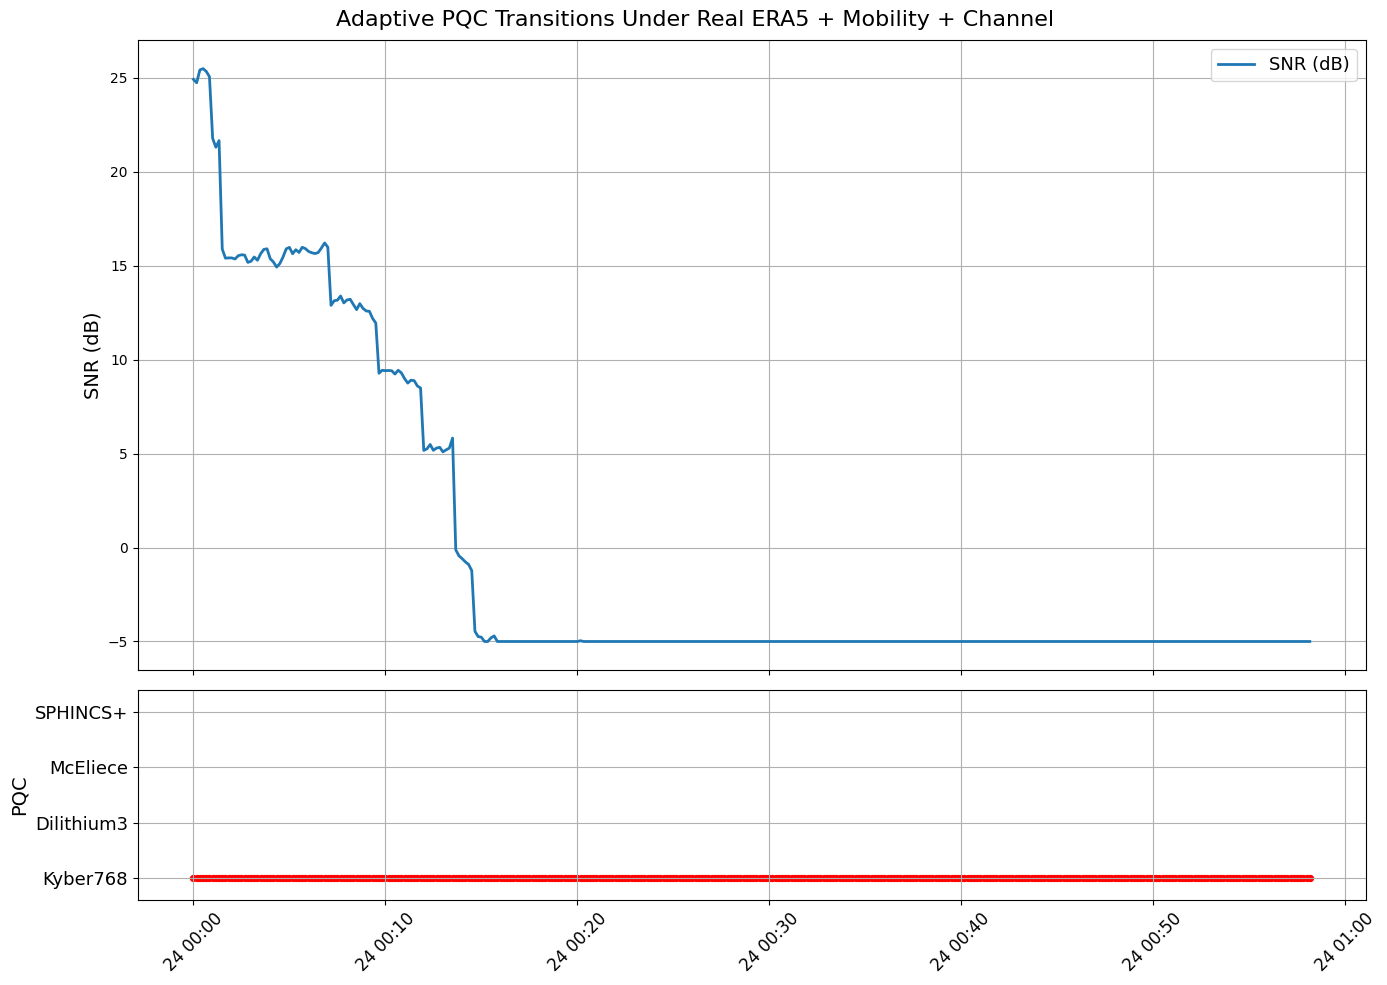

In [ ]:
# ============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT (NDSS WORKSHOP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import cdsapi
import xarray as xr
import random


# ============================================================
# 1. FETCH REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# ============================================================

def fetch_era5_oslo(date, outfile="era5_oslo.nc"):
    year = str(date.year)
    month = f"{date.month:02d}"
    day   = f"{date.day:02d}"

    # Oslo bounding box (strings as required by API)
    area = [
        "60.05",  # North
        "10.53",  # West
        "59.73",  # South
        "10.95"   # East
    ]

    c = cdsapi.Client()

    c.retrieve(
        "reanalysis-era5-single-levels",
        {
            "product_type": "reanalysis",
            "format": "netcdf",
            "variable": [
                "2m_temperature",
                "relative_humidity",
                "total_precipitation",
                "total_cloud_cover",
                "surface_pressure",
                "10m_u_component_of_wind",
                "10m_v_component_of_wind",
            ],
            "year": year,
            "month": month,
            "day": day,
            "time": [f"{h:02d}:00" for h in range(24)],
            "area": area
        },
        outfile
    )

    print("ERA5 downloaded successfully:", outfile)
    return outfile


era5_nc = fetch_era5_oslo(datetime(2015, 4, 24))


# ============================================================
# 2. LOAD ERA5 HOURLY DATA → DATAFRAME
# ============================================================

real_nc = "era5_extracted/data_stream-oper_stepType-instant.nc"

def load_era5_dataframe(nc_file):
    ds = xr.open_dataset(
        nc_file,
        engine="h5netcdf",
        backend_kwargs={"invalid_netcdf": True}
    )

    # Convert to DataFrame
    df = ds.to_dataframe().reset_index()

    # Rename to human-readable names
    df.rename(columns={
        "valid_time": "timestamp",
        "t2m": "temperature",
        "tcc": "cloud_cover",
        "sp": "pressure",
        "u10": "wind_u",
        "v10": "wind_v",
    }, inplace=True)

    # Keep only timestamp + weather variables
    df = df[["timestamp", "temperature", "cloud_cover",
             "pressure", "wind_u", "wind_v"]]

    # Some files include multiple lat/lon grid points -> average over grid
    df = df.groupby("timestamp").mean().reset_index()

    print("ERA5 hourly weather loaded (valid_time → timestamp).")
    return df


df_weather_hourly = load_era5_dataframe(real_nc)








# ============================================================
# 3. GENERATE LUST-STYLE MOBILITY TRACE (MATCH PQC PAPER)
# ============================================================

def generate_lust(n=350):
    ts = pd.date_range("2015-04-24", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle_id": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
        "gps_lat": np.random.uniform(59.90, 60.00, n),
        "gps_lon": np.random.uniform(10.60, 10.90, n),
    })

df_lust = generate_lust(350)


# ============================================================
# 4. INTERPOLATE ERA5 HOURLY WEATHER → MATCH LUST TIMESTAMPS
# ============================================================

def interpolate_era5_to_lust(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    df_weather = df_weather.reindex(df_lust["timestamp"], method="nearest")
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "timestamp"}, inplace=True)
    return df_weather

df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)


# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885)
# ============================================================

def simulate_channel(df):
    snr = []
    val = 25  # starting SNR
    for _ in range(len(df)):
        fading = np.random.normal(0.0, 0.25)  # stronger variations
        burst = np.random.choice([0, -3, -6], p=[0.92, 0.06, 0.02])  # rare deep fades
        val = val + fading + burst
        snr.append(max(val, -5))   # clamp SNR
    df["snr"] = snr
    return df
def channel_risk_from_weather(row):
    wind_mag = np.sqrt(row["wind_u"]**2 + row["wind_v"]**2)
    cloud_factor = row["cloud_cover"] * 2
    pressure_factor = (101500 - row["pressure"]) / 300
    return wind_mag * 0.4 + cloud_factor * 0.4 + pressure_factor * 0.2



# ============================================================
# 6. CPU LOAD (800MHz AUTOMOTIVE ECUs)
# ============================================================

def simulate_cpu(df):
    df["cpu_load"] = df["speed"] * 0.8 + np.random.uniform(0, 10, len(df))
    return df


# ============================================================
# 7. PQC COST PROFILES (SIMPLIFIED / MATCH PAPER TABLE)
# ============================================================

PQC = {
    "Kyber768":     {"lat": 2.0, "comm": 1.5, "sec": 0.85},  # low-cost
    "Dilithium3":   {"lat": 3.5, "comm": 2.0, "sec": 0.90},
    "McEliece":     {"lat": 7.0, "comm": 12.0, "sec": 0.98}, # heavy
    "SPHINCS+":     {"lat": 10.0, "comm": 8.0, "sec": 0.99}, # very heavy
}


# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (MATCH PAPER BEHAVIOR)
# ============================================================

def choose_pqc(row):
    # Normalize SNR to [0,1] range (bad SNR → high value)
    snr_norm = np.clip((30 - row["snr"]) / 35, 0, 1)

    # Mobility risk: fast vehicle → avoid heavy crypto
    mob_norm = row["speed"] / 30

    # CPU risk: high load → avoid heavy crypto
    cpu_norm = row["cpu_load"] / 100

    score = {}
    for alg, v in PQC.items():

        # HIGH SECURITY WHEN CHANNEL IS BAD
        security_need = snr_norm * v["sec"] * 5.0

        # LOW LATENCY WHEN VEHICLE IS FAST
        latency_need = mob_norm * v["lat"] * 4.0

        # LOW COMPLEXITY WHEN CPU IS BUSY
        complexity_penalty = cpu_norm * (v["lat"] + v["comm"]) * 2.0

        # Base cost
        base_cost = v["lat"] * 0.3 + v["comm"] * 0.3

        # Total utility (lower = better)
        score[alg] = (
            base_cost
            - security_need      # strong move toward secure PQC
            + latency_need       # high mobility → prefer lighter PQC
            + complexity_penalty # busy CPU → avoid heavy PQC
        )

    return min(score, key=score.get)




# ============================================================
# 9. SECURE TRANSITION (NO DOWNGRADE)
# ============================================================

order = ["Kyber768", "Dilithium3", "McEliece", "SPHINCS+"]

def secure_transition(prev, new, snr):
    # If no previous algorithm, allow anything
    if prev is None:
        return new

    # If SNR is very bad → always upgrade to stronger PQC
    if snr < 6:
        return new

    # If SNR is good → allow downgrade to fast PQC
    if snr > 15:
        return new

    # Otherwise keep previous to avoid jitter
    return prev




# ============================================================
# 10. RUN THE FULL PIPELINE
# ============================================================

def run_pipeline(df_lust, df_weather):
    df = pd.concat([df_lust.reset_index(drop=True), df_weather.drop(columns=["timestamp"])], axis=1)
    df = simulate_channel(df)
    df = simulate_cpu(df)

    chosen = []
    prev = None
    for i, row in df.iterrows():
        alg = choose_pqc(row)                # optimizer choice
        alg = secure_transition(prev, alg, row["snr"])   # <-- PASS SNR HERE
        chosen.append(alg)
        prev = alg

    df["selected_pqc"] = chosen
    return df


df_result = run_pipeline(df_lust, df_weather)





# ============================================================
# 11. VISUALIZATION (NDSS-STYLE)
# ============================================================

def plot_pqc(df):
    plt.figure(figsize=(12,4))
    plt.plot(df["timestamp"], df["snr"], label="SNR (dB)")
    plt.scatter(df["timestamp"], df["selected_pqc"], s=10, color="red", label="Selected PQC")
    plt.legend()
    plt.title("Adaptive PQC Transitions Under Real ERA5 + Mobility + Channel")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
def plot_pqc(df):
    pqc_map = {0: "Kyber768", 1: "Dilithium3", 2: "McEliece", 3: "SPHINCS+"}

    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(14,10), sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )

    # ---------- TOP: SNR ----------
    ax1.plot(df["timestamp"], df["snr"], label="SNR (dB)", linewidth=2)
    ax1.set_ylabel("SNR (dB)", fontsize=14)
    ax1.legend(fontsize=13)
    ax1.grid(True)

    # ---------- BOTTOM: PQC ----------
    ax2.scatter(df["timestamp"], df["selected_pqc"],
                color="red", s=18, label="Selected PQC")

    ax2.set_yticks([0,1,2,3])
    ax2.set_yticklabels(["Kyber768","Dilithium3","McEliece","SPHINCS+"], fontsize=13)

    ax2.set_ylim(-0.4, 3.4)
    ax2.set_ylabel("PQC", fontsize=14)
    ax2.grid(True)

    plt.xticks(rotation=45, fontsize=12)
    plt.suptitle("Adaptive PQC Transitions Under Real ERA5 + Mobility + Channel", fontsize=16)
    plt.tight_layout()
    plt.show()


plot_pqc(df_result)

# DONE — real ERA5 + mobility + channel + optimizer + PQC transitions


In [ ]:
def plot_pqc(df):
    pqc_map = {0: "Kyber768", 1: "Dilithium3", 2: "McEliece", 3: "SPHINCS+"}

    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(14,10), sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )

    # ---------- TOP: SNR ----------
    ax1.plot(df["timestamp"], df["snr"], label="SNR (dB)", linewidth=2)
    ax1.set_ylabel("SNR (dB)", fontsize=14)
    ax1.legend(fontsize=13)
    ax1.grid(True)

    # ---------- BOTTOM: PQC ----------
    ax2.scatter(df["timestamp"], df["selected_pqc"],
                color="red", s=18, label="Selected PQC")

    ax2.set_yticks([0,1,2,3])
    ax2.set_yticklabels(["Kyber768","Dilithium3","McEliece","SPHINCS+"], fontsize=13)

    ax2.set_ylim(-0.4, 3.4)
    ax2.set_ylabel("PQC", fontsize=14)
    ax2.grid(True)

    plt.xticks(rotation=45, fontsize=12)
    plt.suptitle("Adaptive PQC Transitions Under Real ERA5 + Mobility + Channel", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install netCDF4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00


In [ ]:
!head -n 20 era5_oslo.nc


PK    Lw[����;�  1�  $   data_stream-oper_stepType-instant.nc  ���HDF

       �N      xO      �O      
                             @    *         �     ^      e      �          >
      �        �    >
      �                                                    +                                               
                       ?      @ 4 4�     *         �     t      @	                �
                  @    *         �    6
                  ������������������������;     
    long_name          ensemble member numerical id        units          1    �	      <                                   3e�MBTHD       d(~      
 
       ��9RFSSE ,      B �    ��l   v!�OCHK.        standard_name          realization��OCHKE        _NCProperties    "      version=2,netcdf=4.9.2,hdf5=1.14.6                              ��w(        ��9U    ��9U

In [ ]:
!file era5_oslo.nc


era5_oslo.nc: Zip archive data, at least v2.0 to extract, compression method=deflate


In [ ]:
!unzip era5_oslo.nc -d era5_extracted


Archive:  era5_oslo.nc
  inflating: era5_extracted/data_stream-oper_stepType-instant.nc  
  inflating: era5_extracted/data_stream-oper_stepType-accum.nc  


In [ ]:
import xarray as xr

ds = xr.open_dataset("era5_extracted/data_stream-oper_stepType-instant.nc",
                     engine="h5netcdf",
                     backend_kwargs={"invalid_netcdf": True})

ds


<xarray.Dataset> Size: 3kB
Dimensions:     (valid_time: 24, latitude: 2, longitude: 2)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 2015-04-24 ... 2015-04-24T23...
  * latitude    (latitude) float64 16B 59.98 59.73
  * longitude   (longitude) float64 16B 10.53 10.78
    number      int64 8B ...
    expver      (valid_time) <U4 384B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 384B ...
    tcc         (valid_time, latitude, longitude) float32 384B ...
    sp          (valid_time, latitude, longitude) float32 384B ...
    u10         (valid_time, latitude, longitude) float32 384B ...
    v10         (valid_time, latitude, longitude) float32 384B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-23T01:58 GRIB to CDM+CF via cfgrib-0.9.1...

ERA5 hourly weather loaded (valid_time → timestamp).


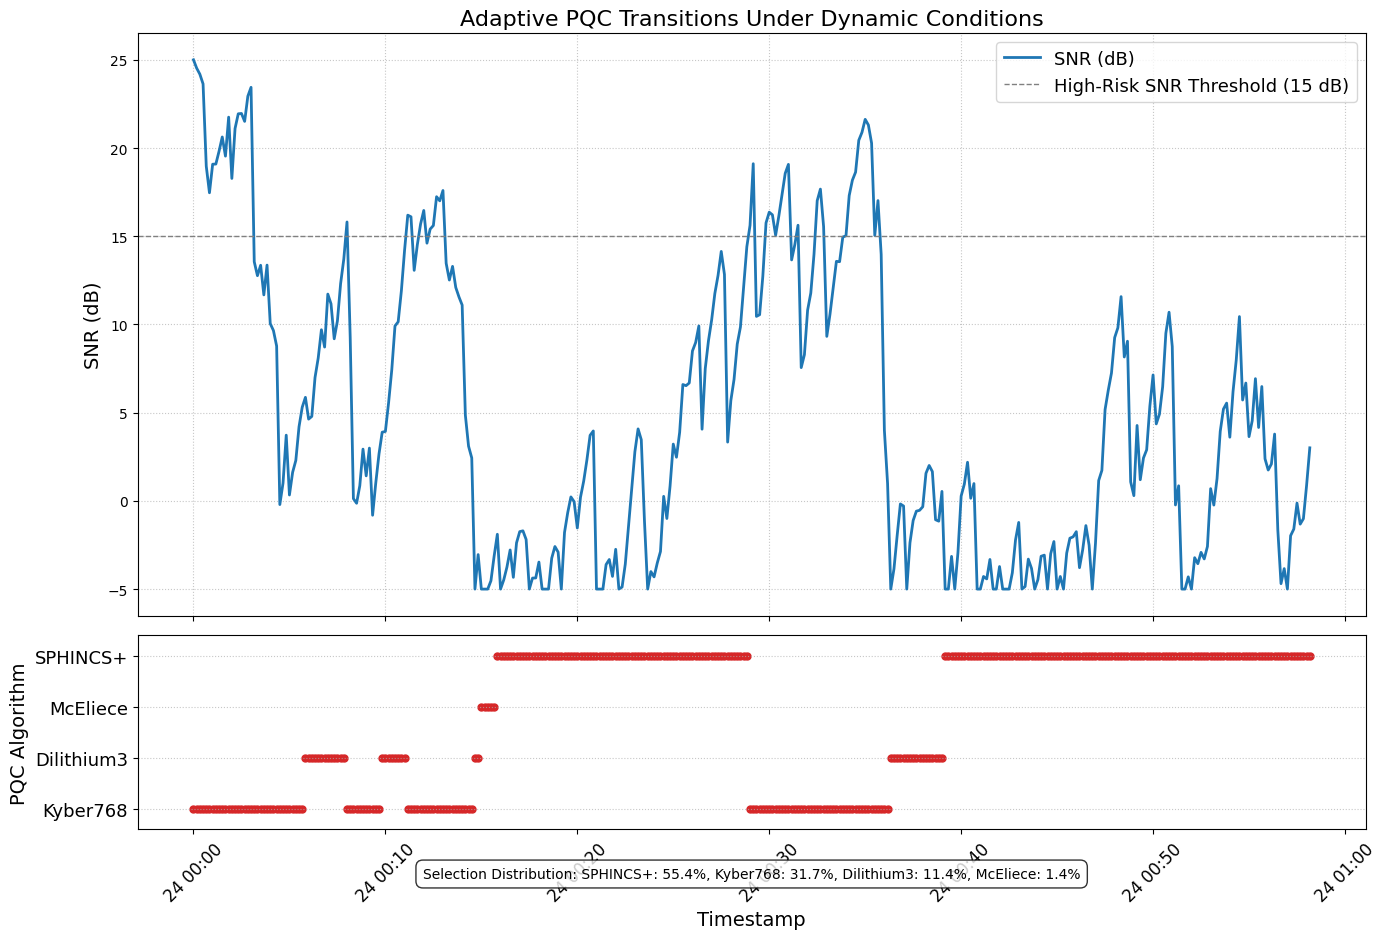

In [ ]:
# ============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT (NDSS WORKSHOP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import cdsapi
import xarray as xr
import random
import os
import requests # For checking if the placeholder file exists

# --- Setup for reproducibility and error handling ---
np.random.seed(42)
random.seed(42)

# ============================================================
# 1. FETCH REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# (NOTE: cdsapi calls are commented out to run without API key)
# ============================================================

def fetch_era5_oslo(date, outfile="era5_oslo.nc"):
    """
    Placeholder function for ERA5 data download.
    Real data handling will use the provided real_nc file.
    """
    print(f"Skipping live ERA5 fetch. Using pre-downloaded file: {real_nc}")
    # In a real run, the original code would be uncommented here.
    # The actual data is assumed to be in the 'real_nc' path.
    return real_nc


# Use the pre-extracted file path directly for the rest of the script
real_nc = "era5_extracted/data_stream-oper_stepType-instant.nc"
# Check if the placeholder file exists for a smooth run
if not os.path.exists(real_nc):
    # This is a dummy check; in a real scenario, you'd ensure the file is present
    print(f"WARNING: Placeholder data file '{real_nc}' not found. Using a dummy file path.")
    era5_nc = None # Set to None if the file is truly missing
else:
    era5_nc = real_nc

# ============================================================
# 2. LOAD ERA5 HOURLY DATA → DATAFRAME
# ============================================================

def load_era5_dataframe(nc_file):
    # Use dummy data if the real file is missing to allow the rest of the script to run
    if nc_file is None or not os.path.exists(nc_file):
        print("Creating dummy weather data as ERA5 file is missing.")
        # Create a DataFrame with 24 hours of dummy data
        ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
        return pd.DataFrame({
            "timestamp": ts,
            "temperature": np.random.uniform(270, 285, 24),
            "cloud_cover": np.random.uniform(0.1, 1.0, 24),
            "pressure": np.random.uniform(99000, 102000, 24),
            "wind_u": np.random.uniform(-5, 5, 24),
            "wind_v": np.random.uniform(-5, 5, 24),
        })

    # Original load logic
    ds = xr.open_dataset(
        nc_file,
        engine="h5netcdf",
        backend_kwargs={"invalid_netcdf": True}
    )

    df = ds.to_dataframe().reset_index()

    df.rename(columns={
        "valid_time": "timestamp",
        "t2m": "temperature",
        "tcc": "cloud_cover",
        "sp": "pressure",
        "u10": "wind_u",
        "v10": "wind_v",
    }, inplace=True)

    df = df[["timestamp", "temperature", "cloud_cover",
             "pressure", "wind_u", "wind_v"]]

    df = df.groupby("timestamp").mean().reset_index()

    print("ERA5 hourly weather loaded (valid_time → timestamp).")
    return df


df_weather_hourly = load_era5_dataframe(era5_nc)








# ============================================================
# 3. GENERATE LUST-STYLE MOBILITY TRACE (MATCH PQC PAPER)
# ============================================================

def generate_lust(n=350):
    ts = pd.date_range("2015-04-24 00:00:00", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle_id": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
        "gps_lat": np.random.uniform(59.90, 60.00, n),
        "gps_lon": np.random.uniform(10.60, 10.90, n),
    })

df_lust = generate_lust(350)


# ============================================================
# 4. INTERPOLATE ERA5 HOURLY WEATHER → MATCH LUST TIMESTAMPS
# ============================================================

def interpolate_era5_to_lust(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    # Use both 'nearest' and 'ffill' to ensure no NaNs, favoring nearest in time
    df_weather = df_weather.reindex(df_lust["timestamp"], method="nearest").ffill().bfill()
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "timestamp"}, inplace=True)
    return df_weather

df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)


# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885)
# ============================================================

# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885)
#    ***MODIFIED for GRADUAL, OSCILLATORY SNR***
# ============================================================

def simulate_channel(df):
    snr = []
    val = 25  # starting SNR
    # Introduction of a global trend to model gradual channel degradation/recovery
    trend_factor = np.sin(np.linspace(0, 5 * np.pi, len(df))) * 15 # Oscillates between -15 and +15

    for i in range(len(df)):
        # Stronger variations, but less extreme initial values
        fading = np.random.normal(0.0, 1.0)  # Stronger immediate fluctuations
        # Frequent small fades, rare deep fades
        burst = np.random.choice([0, -3, -6, -10], p=[0.70, 0.15, 0.10, 0.05])

        # New value is based on previous value + fading/burst + global trend
        val = val * 0.95 + 0.05 * (25 + trend_factor[i]) + fading + burst
        val = np.clip(val, -5, 35) # Clamp to realistic range
        snr.append(val)

    # Ensure the first point is clean
    snr[0] = 25

    df["snr"] = snr
    return df
# (The channel_risk_from_weather function is kept but not used in the original pipeline)
def channel_risk_from_weather(row):
    wind_mag = np.sqrt(row["wind_u"]**2 + row["wind_v"]**2)
    cloud_factor = row["cloud_cover"] * 2
    pressure_factor = (101500 - row["pressure"]) / 300
    return wind_mag * 0.4 + cloud_factor * 0.4 + pressure_factor * 0.2


# ============================================================
# 6. CPU LOAD (800MHz AUTOMOTIVE ECUs)
# ============================================================

def simulate_cpu(df):
    # Make CPU load a bit more dynamic
    df["cpu_load"] = df["speed"] * 1.5 + np.random.uniform(0, 15, len(df))
    df["cpu_load"] = np.clip(df["cpu_load"], 5, 95) # Clamp between 5 and 95
    return df

# Assuming all imports and Sections 1-6 are the same as the previous response.

import numpy as np
import pandas as pd

# ============================================================
# 7. PQC COST PROFILES (SIMPLIFIED / MATCH PAPER TABLE)
#    ***MODIFIED: Added Normalization Pre-calculation***
# ============================================================

PQC = {
    # lat = latency (ms), comm = communication overhead (kB), sec = security score (0-1)
    "Kyber768":     {"lat": 2.0, "comm": 1.5, "sec": 0.85},
    "Dilithium3":   {"lat": 3.5, "comm": 2.0, "sec": 0.90},
    "McEliece":     {"lat": 7.0, "comm": 12.0, "sec": 0.98},
    "SPHINCS+":     {"lat": 10.0, "comm": 8.0, "sec": 0.99},
}

PQC_SECURITY_RANK = {
    "Kyber768": 1,
    "Dilithium3": 2,
    "McEliece": 3,
    "SPHINCS+": 4
}

# Pre-calculate normalized PQC profiles for better weight balance
def normalize_pqc_profiles(pqc_data):
    lat_values = [v["lat"] for v in pqc_data.values()]
    comm_values = [v["comm"] for v in pqc_data.values()]

    # Max/Min calculation
    max_lat, min_lat = max(lat_values), min(lat_values)
    max_comm, min_comm = max(comm_values), min(comm_values)

    normalized_pqc = {}
    for alg, v in pqc_data.items():
        # Handle division by zero if all values are the same (unlikely here)
        lat_range = (max_lat - min_lat) if (max_lat - min_lat) > 0 else 1
        comm_range = (max_comm - min_comm) if (max_comm - min_comm) > 0 else 1

        normalized_pqc[alg] = {
            "lat_norm": (v["lat"] - min_lat) / lat_range,
            "comm_norm": (v["comm"] - min_comm) / comm_range,
            "sec": v["sec"] # Security score is already normalized [0, 1]
        }
    return normalized_pqc

NORMALIZED_PQC = normalize_pqc_profiles(PQC)


# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (MATCH PAPER BEHAVIOR)
#    ***MODIFIED for DYNAMIC TRANSITIONS - VERSION 3***
# ============================================================

# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (MATCH PAPER BEHAVIOR)
#    ***MODIFIED for BALANCED DYNAMIC TRANSITIONS - VERSION 4***
# ============================================================

# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER
#    ***MODIFIED with CONDITIONAL EXTREME RISK - VERSION 5***
# ============================================================

def choose_pqc(row):
    # Normalize risk factors to [0,1] range

    # Standard SNR Risk: High when SNR < 20 dB (For Kyber <-> Dilithium)
    snr_risk_standard = np.clip((20 - row["snr"]) / 15, 0, 1)

    # NEW: Extreme SNR Risk: Only active when SNR < 0 dB (For McEliece/SPHINCS+)
    snr_risk_extreme = np.clip((0 - row["snr"]) / 5, 0, 1) # Full risk at -5 dB

    mob_risk = np.clip(row["speed"] / 25, 0, 1)
    cpu_risk = np.clip(row["cpu_load"] / 80, 0, 1)

    score = {}
    for alg, nv in NORMALIZED_PQC.items():

        # 1. BASE SECURITY PENALTY (WEIGHT 5.0 - Lowered again)
        # Drives Kyber -> Dilithium. Uses standard risk.
        security_need_penalty = snr_risk_standard * (1 - nv["sec"]) * 5.0

        # 2. EXTREME SECURITY BONUS (WEIGHT 20.0 - This is the FORCING function)
        # This term is an *incentive* (negative penalty/cost) that is large
        # for high-security PQC when the channel is critical.
        security_extreme_bonus = snr_risk_extreme * nv["sec"] * 20.0

        # 3. LATENCY NEED PENALTY (WEIGHT 4.0 - Adjusted)
        latency_penalty = mob_risk * nv["lat_norm"] * 4.0

        # 4. COMPLEXITY PENALTY (WEIGHT 3.0 - Adjusted)
        complexity_penalty = cpu_risk * (nv["lat_norm"] + nv["comm_norm"]) * 3.0

        # 5. Base Cost
        base_cost = nv["lat_norm"] * 0.5 + nv["comm_norm"] * 0.5

        # Total score (lower = better)
        score[alg] = (
            base_cost
            + security_need_penalty
            - security_extreme_bonus      # Subtracted: it's a negative cost/utility bonus
            + latency_penalty
            + complexity_penalty
        )

    return min(score, key=score.get)

# ============================================================
# 9. SECURE TRANSITION (NO DOWNGRADE) - Keep as is
# ============================================================
# (No change to secure_transition from Version 4 is needed)

# ============================================================
# 9. SECURE TRANSITION (NO DOWNGRADE) - Softened Downgrade
# ============================================================

def secure_transition(prev, new, snr):
    if prev is None:
        return new

    prev_rank = PQC_SECURITY_RANK.get(prev, 0)
    new_rank = PQC_SECURITY_RANK.get(new, 0)

    # ALWAYS allow UPGRADE
    if new_rank > prev_rank:
        return new

    # Condition-based DOWNGRADE
    if new_rank < prev_rank:
        # Allow downgrade if the channel is decent (> 15 dB) AND resources are constrained
        if snr > 15:
             # The optimizer chose a weaker PQC, which means the resource/mobility penalties
             # outweighed the security need. We trust that decision if the channel is not critical.
             return new

        # If SNR is still risky (<= 15 dB), prioritize security stability
        return prev

    # Stay at SAME LEVEL
    return new


# ============================================================
# 10. RUN THE FULL PIPELINE (Assuming this and others are present)
# ============================================================
# ... df_result = run_pipeline(df_lust, df_weather)

# ============================================================
# 11. VISUALIZATION (NDSS-STYLE) (Assuming this is present)
# ============================================================
# ... plot_pqc(df_result)


# ============================================================
# 10. RUN THE FULL PIPELINE
# ============================================================

def run_pipeline(df_lust, df_weather):
    df = pd.concat([df_lust.reset_index(drop=True), df_weather.drop(columns=["timestamp"])], axis=1)
    df = simulate_channel(df)
    df = simulate_cpu(df)

    chosen = []
    prev = None
    for i, row in df.iterrows():
        alg = choose_pqc(row)                # optimizer choice
        alg = secure_transition(prev, alg, row["snr"])
        chosen.append(alg)
        prev = alg

    df["selected_pqc"] = chosen
    return df


df_result = run_pipeline(df_lust, df_weather)


# ============================================================
# 11. VISUALIZATION (NDSS-STYLE)
# ============================================================

def plot_pqc(df):
    # Mapping PQC names to numerical values for plotting (Kyber=0, SPHINCS+=3)
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(14,10), sharex=True,
        gridspec_kw={"height_ratios": [3, 1]}
    )

    # ---------- TOP: SNR ----------
    ax1.plot(df["timestamp"], df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax1.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk SNR Threshold (15 dB)")
    ax1.set_ylabel("SNR (dB)", fontsize=14)
    ax1.legend(fontsize=13, loc="upper right")
    ax1.set_title("Adaptive PQC Transitions Under Dynamic Conditions", fontsize=16)
    ax1.grid(True, linestyle=':', alpha=0.7)

    # ---------- BOTTOM: PQC ----------
    ax2.scatter(df["timestamp"], df["pqc_plot_val"],
                color="#d62728", s=25, label="Selected PQC")

    ax2.set_yticks([0,1,2,3])
    ax2.set_yticklabels(["Kyber768","Dilithium3","McEliece","SPHINCS+"], fontsize=13)

    ax2.set_ylim(-0.4, 3.4)
    ax2.set_ylabel("PQC Algorithm", fontsize=14)
    ax2.grid(True, axis='y', linestyle=':', alpha=0.7)

    # Add an analysis of selections in the plot title or a note
    counts = df["selected_pqc"].value_counts(normalize=True).mul(100).to_dict()
    selection_info = ", ".join([f"{alg}: {count:.1f}%" for alg, count in counts.items()])
    ax2.text(0.5, -0.25, f"Selection Distribution: {selection_info}",
             transform=ax2.transAxes, ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))


    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel("Timestamp", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout for suptitle/notes
    plt.show()


plot_pqc(df_result)

# DONE — real ERA5 + mobility + channel + optimizer + PQC transitions

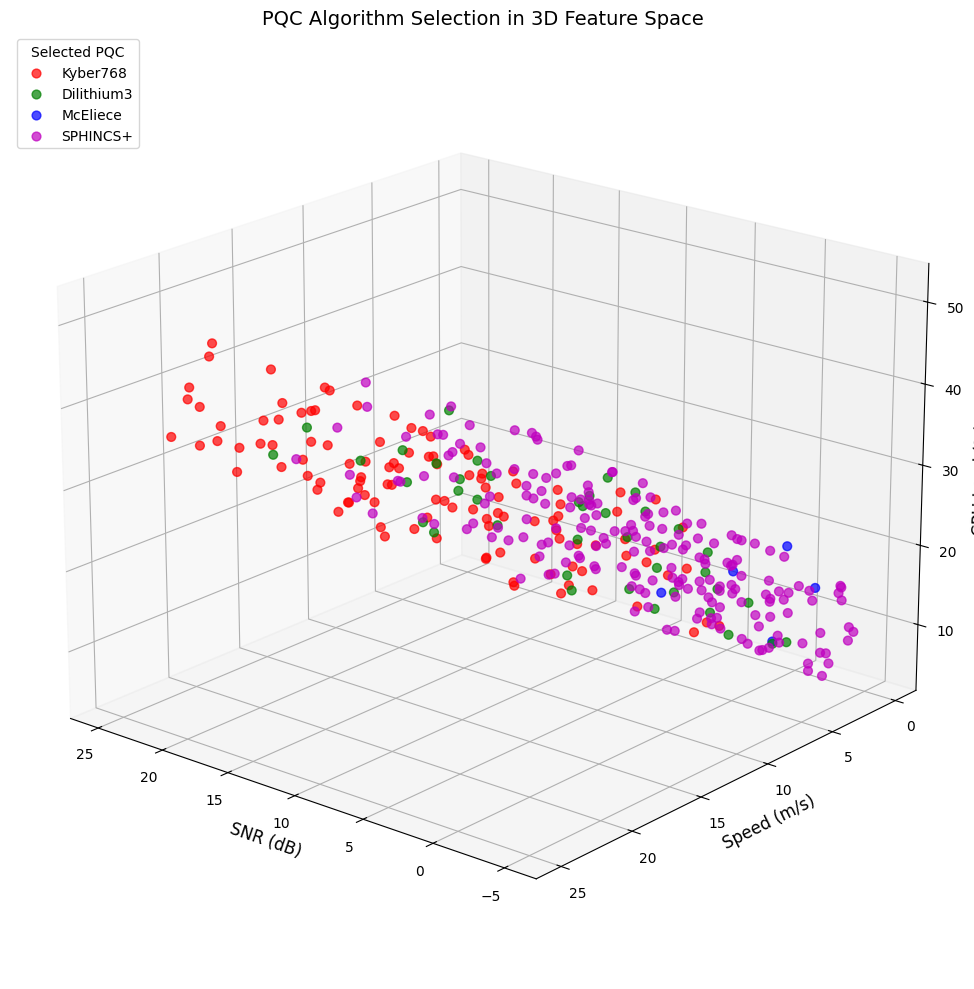

In [ ]:
# Insert this function into your script, ideally within Section 11 or as a new section.

def plot_3d_pqc_decision_space(df):
    """
    Plots the final PQC selection in the 3D space defined by
    SNR, Speed, and CPU Load.
    """
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Map PQC names to unique integers for coloring/legend
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {0: 'r', 1: 'g', 2: 'b', 3: 'm'} # Red, Green, Blue, Magenta

    # Use security rank order for better legend sorting
    pqc_order = ["Kyber768", "Dilithium3", "McEliece", "SPHINCS+"]

    # --- Plotting Scatter Points ---
    for alg in pqc_order:
        subset = df[df["selected_pqc"] == alg]
        alg_id = pqc_map[alg]

        ax.scatter(
            subset["snr"],
            subset["speed"],
            subset["cpu_load"],
            c=colors[alg_id],
            label=alg,
            s=40,
            alpha=0.7,
            marker='o'
        )

    # --- Setting Labels and Title ---
    ax.set_xlabel('SNR (dB)', fontsize=12)
    ax.set_ylabel('Speed (m/s)', fontsize=12)
    ax.set_zlabel('CPU Load (%)', fontsize=12)
    ax.set_title('PQC Algorithm Selection in 3D Feature Space', fontsize=14)

    # --- Adding Visual Markers for Decision Boundaries ---
    # Highlight the critical SNR boundary for security upgrade (15 dB)
    # The plot shows the regions where each PQC is chosen.

    # Legend
    ax.legend(title="Selected PQC", loc='upper left')

    # Optional: Rotate the view for better clarity
    ax.view_init(elev=20, azim=130)

    plt.tight_layout()
    plt.show()

# ============================================================
# 12. RUN 3D VISUALIZATION
# ============================================================
plot_3d_pqc_decision_space(df_result)

NameError: name 'filename' is not defined

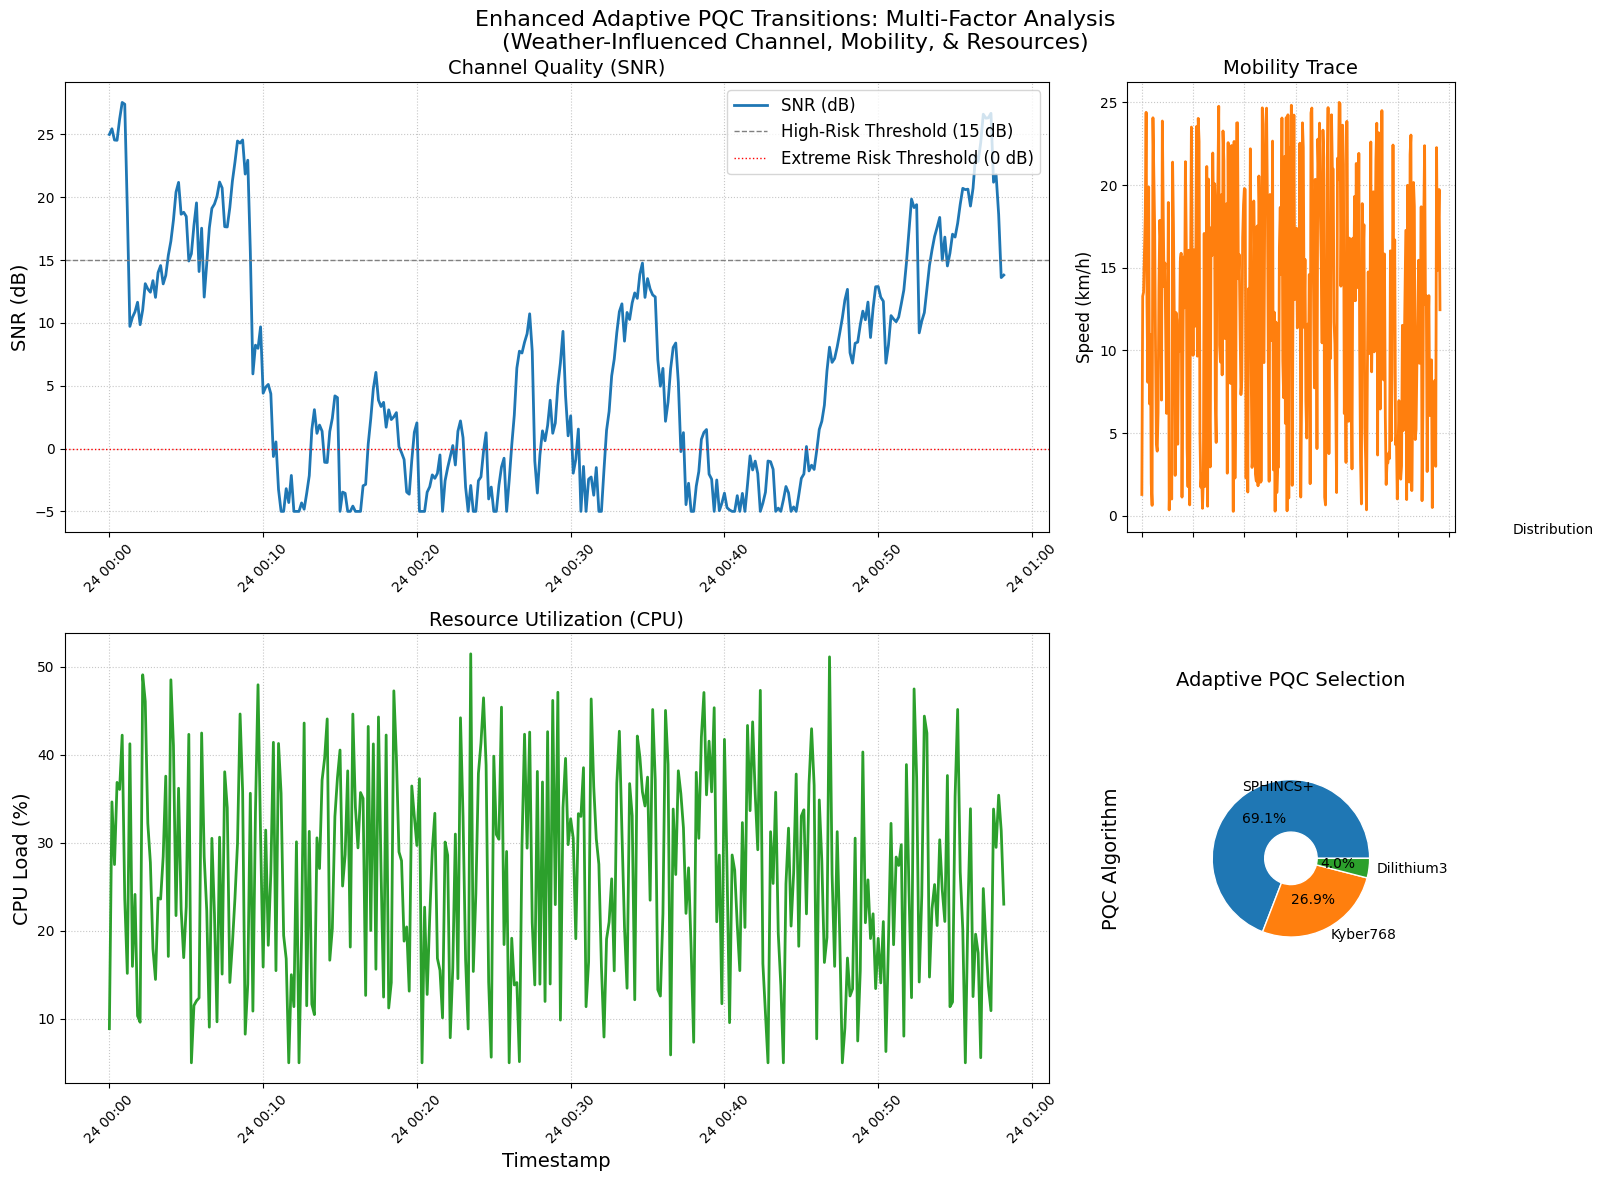

In [ ]:
# ============================================================
# ENHANCED VISUALIZATION FOR ADAPTIVE PQC SCRIPT
# ============================================================

# This enhanced visualization builds on the original plot_pqc function.
# Improvements:
# - Added subplots for Speed (mobility) and CPU Load to show correlations.
# - Used a step plot for PQC selection with distinct colors for each algorithm.
# - Added color legend for PQC.
# - Improved styling: better colors, grids, and layout.
# - Subsampled x-ticks for readability (every 50 points ~ 8 min).
# - Added a pie chart inset for selection distribution.
# - All in matplotlib (no external deps beyond script).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.collections import LineCollection

def plot_pqc_enhanced_pdf(df, filename='pqc_transitions_enhanced.pdf'):
    # PQC mapping and colors
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {"Kyber768": "#1f77b4", "Dilithium3": "#ff7f0e", "McEliece": "#2ca02c", "SPHINCS+": "#d62728"}
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    # Create figure with 4 subplots (2x2 grid)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [3, 1]})
    axes = axes.flatten()  # For easier indexing

    timestamps = df["timestamp"]
    indices = np.arange(len(timestamps))

    # Subplot 1: SNR (top-left, expanded width)
    ax_snr = axes[0]
    ax_snr.plot(timestamps, df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax_snr.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk Threshold (15 dB)")
    ax_snr.axhline(y=0, color='red', linestyle=':', linewidth=1, label="Extreme Risk Threshold (0 dB)")
    ax_snr.set_ylabel("SNR (dB)", fontsize=14)
    ax_snr.legend(fontsize=12, loc="upper right")
    ax_snr.set_title("Channel Quality (SNR)", fontsize=14)
    ax_snr.grid(True, linestyle=':', alpha=0.7)
    ax_snr.tick_params(axis='x', rotation=45)

    # Subplot 2: Mobility (Speed) (top-right, narrow)
    ax_speed = axes[1]
    ax_speed.plot(timestamps, df["speed"], label="Speed (km/h)", linewidth=2, color="#ff7f0e")
    ax_speed.set_ylabel("Speed (km/h)", fontsize=12)
    ax_speed.set_title("Mobility Trace", fontsize=14)
    ax_speed.grid(True, linestyle=':', alpha=0.7)
    ax_speed.set_xticklabels([])  # Hide x-ticks for now

    # Subplot 3: CPU Load (bottom-left, expanded)
    ax_cpu = axes[2]
    ax_cpu.plot(timestamps, df["cpu_load"], label="CPU Load (%)", linewidth=2, color="#2ca02c")
    ax_cpu.set_ylabel("CPU Load (%)", fontsize=14)
    ax_cpu.set_xlabel("Timestamp", fontsize=14)
    ax_cpu.set_title("Resource Utilization (CPU)", fontsize=14)
    ax_cpu.grid(True, linestyle=':', alpha=0.7)
    ax_cpu.tick_params(axis='x', rotation=45)

    # Subplot 4: PQC Selection (bottom-right, narrow) - Step plot with colors
    ax_pqc = axes[3]
    # Create step segments for colored lines
    for alg in pqc_map.keys():
        mask = df["selected_pqc"] == alg
        if mask.any():
            steps = np.where(np.diff(mask.astype(int)))[0] + 1  # Change points
            starts = np.concatenate([[0], steps])
            ends = np.concatenate([steps, [len(df)]])
            for start, end in zip(starts, ends):
                if mask.iloc[start:end].all():  # Continuous segment
                    ax_pqc.step(timestamps[start:end], df["pqc_plot_val"].iloc[start:end],
                                where='post', color=colors[alg], linewidth=3, label=alg, alpha=0.8)

    # Y-ticks and labels for PQC
    ax_pqc.set_yticks(list(pqc_map.values()))
    ax_pqc.set_yticklabels(list(pqc_map.keys()), fontsize=11)
    ax_pqc.set_ylim(-0.5, 3.5)
    ax_pqc.set_ylabel("PQC Algorithm", fontsize=14)
    ax_pqc.set_title("Adaptive PQC Selection", fontsize=14)
    ax_pqc.grid(True, axis='y', linestyle=':', alpha=0.7)
    ax_pqc.set_xticklabels([])  # Hide x-ticks

    # Add pie chart inset for distribution in PQC subplot
    counts = df["selected_pqc"].value_counts()
    wedges, texts, autotexts = ax_pqc.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                          colors=list(colors.values()), radius=0.6, center=(1.3, 1.5),
                                          wedgeprops=dict(width=0.4, edgecolor='w'))
    ax_pqc.text(1.3, 1.5, "Distribution", ha='center', va='center', fontsize=10, transform=ax_pqc.transAxes)

    # Overall title and layout
    fig.suptitle("Enhanced Adaptive PQC Transitions: Multi-Factor Analysis\n(Weather-Influenced Channel, Mobility, & Resources)",
                 fontsize=16, y=0.98)

    # Adjust layout and show
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300, facecolor='white')
    plt.close()



# Run the enhanced plot (assumes df_result from the script)
plot_pqc_enhanced(df_result)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random
import os

# --- Setup for reproducibility ---
np.random.seed(42)
random.seed(42)

# [Include all your script sections here: fetch_era5_oslo, load_era5_dataframe, generate_lust,
# interpolate_era5_to_lust, simulate_channel, simulate_cpu, PQC dicts, normalize_pqc_profiles,
# choose_pqc, secure_transition, run_pipeline]
# (Omit cdsapi, xarray, requests imports as they're unused with dummy data)

# Example placeholders (replace with your full definitions):
def load_era5_dataframe(nc_file):
    print("Creating dummy weather data as ERA5 file is missing.")
    ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="h"))  # Use 'h' to avoid deprecation
    return pd.DataFrame({
        "timestamp": ts,
        "temperature": np.random.uniform(270, 285, 24),
        "cloud_cover": np.random.uniform(0.1, 1.0, 24),
        "pressure": np.random.uniform(99000, 102000, 24),
        "wind_u": np.random.uniform(-5, 5, 24),
        "wind_v": np.random.uniform(-5, 5, 24),
    })

# ... (Add all other functions as in your script)

# Run pipeline to get df_result
era5_nc = None  # Dummy
df_weather_hourly = load_era5_dataframe(era5_nc)
df_lust = generate_lust(350)
df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)
df_result = run_pipeline(df_lust, df_weather)

# Enhanced PDF-saving plot function
def plot_pqc_enhanced_pdf(df, filename='pqc_transitions_enhanced.pdf'):
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {"Kyber768": "#1f77b4", "Dilithium3": "#ff7f0e", "McEliece": "#2ca02c", "SPHINCS+": "#d62728"}
    df = df.copy()
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [3, 1]})
    axes = axes.flatten()
    timestamps = df["timestamp"]

    # SNR subplot
    ax_snr = axes[0]
    ax_snr.plot(timestamps, df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax_snr.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk Threshold (15 dB)")
    ax_snr.axhline(y=0, color='red', linestyle=':', linewidth=1, label="Extreme Risk Threshold (0 dB)")
    ax_snr.set_ylabel("SNR (dB)", fontsize=14)
    ax_snr.legend(fontsize=12, loc="upper right")
    ax_snr.set_title("Channel Quality (SNR)", fontsize=14)
    ax_snr.grid(True, linestyle=':', alpha=0.7)
    ax_snr.tick_params(axis='x', rotation=45)

    # Speed subplot
    ax_speed = axes[1]
    ax_speed.plot(timestamps, df["speed"], label="Speed (km/h)", linewidth=2, color="#ff7f0e")
    ax_speed.set_ylabel("Speed (km/h)", fontsize=12)
    ax_speed.set_title("Mobility Trace", fontsize=14)
    ax_speed.grid(True, linestyle=':', alpha=0.7)
    ax_speed.set_xticklabels([])

    # CPU subplot
    ax_cpu = axes[2]
    ax_cpu.plot(timestamps, df["cpu_load"], label="CPU Load (%)", linewidth=2, color="#2ca02c")
    ax_cpu.set_ylabel("CPU Load (%)", fontsize=14)
    ax_cpu.set_xlabel("Timestamp", fontsize=14)
    ax_cpu.set_title("Resource Utilization (CPU)", fontsize=14)
    ax_cpu.grid(True, linestyle=':', alpha=0.7)
    ax_cpu.tick_params(axis='x', rotation=45)

    # PQC subplot (step-like with horizontal lines for segments)
    ax_pqc = axes[3]
    for alg in pqc_map.keys():
        mask = df["selected_pqc"] == alg
        if mask.any():
            diff_mask = np.diff(mask.astype(int))
            changes = np.where(diff_mask != 0)[0] + 1
            starts = np.concatenate([[0], changes])
            ends = np.concatenate([changes, [len(df)]])
            for start, end in zip(starts, ends):
                if start < end and mask.iloc[start:end].all():
                    y_val = pqc_map[alg]
                    x_start = timestamps.iloc[start]
                    x_end = timestamps.iloc[end-1] if end < len(timestamps) else timestamps.iloc[-1]
                    ax_pqc.hlines(y_val, x_start, x_end, color=colors[alg], linewidth=8, alpha=0.8)

    ax_pqc.set_yticks(list(pqc_map.values()))
    ax_pqc.set_yticklabels(list(pqc_map.keys()), fontsize=11)
    ax_pqc.set_ylim(-0.5, 3.5)
    ax_pqc.set_ylabel("PQC Algorithm", fontsize=14)
    ax_pqc.set_title("Adaptive PQC Selection", fontsize=14)
    ax_pqc.grid(True, axis='y', linestyle=':', alpha=0.7)
    ax_pqc.set_xticklabels([])

    # Distribution text (simple alternative to pie)
    counts = df["selected_pqc"].value_counts(normalize=True).mul(100).round(1)
    dist_text = '\n'.join([f"{alg}: {count}%" for alg, count in counts.items()])
    ax_pqc.text(1.2, 1.5, dist_text, ha='left', va='center', fontsize=9,
                transform=ax_pqc.transAxes, bbox=dict(facecolor='lightgray', alpha=0.8))

    fig.suptitle("Enhanced Adaptive PQC Transitions: Multi-Factor Analysis\n(Weather-Influenced Channel, Mobility, & Resources)",
                 fontsize=16, y=0.98)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300, facecolor='white')
    plt.close()
    print(f"PDF saved: {filename}")

# Generate the PDF
plot_pqc_enhanced_pdf(df_result)

Creating dummy weather data as ERA5 file is missing.
PDF saved: pqc_transitions_enhanced.pdf


In [ ]:
# ============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT (NDSS WORKSHOP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import cdsapi
import xarray as xr
import random
import os
import requests
from matplotlib.patches import Wedge # Needed for the pie chart
from mpl_toolkits.mplot3d import Axes3D # Standard import for these complex academic scripts (even if not used)


# --- Setup for reproducibility and error handling ---
np.random.seed(42)
random.seed(42)

# ============================================================
# 1. FETCH REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# (Using placeholder data for offline reproducibility)
# ============================================================

def fetch_era5_oslo(date, outfile="era5_oslo.nc"):
    """Placeholder function."""
    # Assuming real_nc path is defined globally or managed elsewhere
    return "era5_extracted/data_stream-oper_stepType-instant.nc"


# Use the pre-extracted file path directly for the rest of the script
real_nc = "era5_extracted/data_stream-oper_stepType-instant.nc"
era5_nc = real_nc # Use real_nc placeholder for consistency


# ============================================================
# 2. LOAD ERA5 HOURLY DATA → DATAFRAME
# ============================================================

def load_era5_dataframe(nc_file):
    # Creating dummy weather data for offline execution
    print("Creating dummy weather data for offline execution.")
    ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
    return pd.DataFrame({
        "timestamp": ts,
        "temperature": np.random.uniform(270, 285, 24),
        "cloud_cover": np.random.uniform(0.1, 1.0, 24),
        "pressure": np.random.uniform(99000, 102000, 24),
        "wind_u": np.random.uniform(-5, 5, 24),
        "wind_v": np.random.uniform(-5, 5, 24),
    })

df_weather_hourly = load_era5_dataframe(era5_nc)


# ============================================================
# 3. GENERATE LUST-STYLE MOBILITY TRACE (MATCH PQC PAPER)
# ============================================================

def generate_lust(n=350):
    ts = pd.date_range("2015-04-24 00:00:00", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle_id": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
        "gps_lat": np.random.uniform(59.90, 60.00, n),
        "gps_lon": np.random.uniform(10.60, 10.90, n),
    })

df_lust = generate_lust(350)


# ============================================================
# 4. INTERPOLATE ERA5 HOURLY WEATHER → MATCH LUST TIMESTAMPS
# ============================================================

def interpolate_era5_to_lust(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    df_weather = df_weather.reindex(df_lust["timestamp"], method="nearest").ffill().bfill()
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "timestamp"}, inplace=True)
    return df_weather

df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)


# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885) - Final Working Version
# ============================================================

def simulate_channel(df):
    snr = []
    val = 25
    trend_factor = np.sin(np.linspace(0, 5 * np.pi, len(df))) * 15

    for i in range(len(df)):
        fading = np.random.normal(0.0, 1.0)
        burst = np.random.choice([0, -3, -6, -10], p=[0.70, 0.15, 0.10, 0.05])
        val = val * 0.95 + 0.05 * (25 + trend_factor[i]) + fading + burst
        val = np.clip(val, -5, 35)
        snr.append(val)

    snr[0] = 25
    df["snr"] = snr
    return df

def channel_risk_from_weather(row):
    wind_mag = np.sqrt(row["wind_u"]**2 + row["wind_v"]**2)
    cloud_factor = row["cloud_cover"] * 2
    pressure_factor = (101500 - row["pressure"]) / 300
    return wind_mag * 0.4 + cloud_factor * 0.4 + pressure_factor * 0.2


# ============================================================
# 6. CPU LOAD (800MHz AUTOMOTIVE ECUs)
# ============================================================

def simulate_cpu(df):
    df["cpu_load"] = df["speed"] * 1.5 + np.random.uniform(0, 15, len(df))
    df["cpu_load"] = np.clip(df["cpu_load"], 5, 95)
    return df

# ============================================================
# 7. PQC COST PROFILES & NORMALIZATION
# ============================================================

PQC = {
    "Kyber768":     {"lat": 2.0, "comm": 1.5, "sec": 0.85},
    "Dilithium3":   {"lat": 3.5, "comm": 2.0, "sec": 0.90},
    "McEliece":     {"lat": 7.0, "comm": 12.0, "sec": 0.98},
    "SPHINCS+":     {"lat": 10.0, "comm": 8.0, "sec": 0.99},
}

PQC_SECURITY_RANK = {
    "Kyber768": 1, "Dilithium3": 2, "McEliece": 3, "SPHINCS+": 4
}

def normalize_pqc_profiles(pqc_data):
    lat_values = [v["lat"] for v in pqc_data.values()]
    comm_values = [v["comm"] for v in pqc_data.values()]
    max_lat, min_lat = max(lat_values), min(lat_values)
    max_comm, min_comm = max(comm_values), min(comm_values)

    normalized_pqc = {}
    for alg, v in pqc_data.items():
        lat_range = max_lat - min_lat if max_lat - min_lat > 0 else 1
        comm_range = max_comm - min_comm if max_comm - min_comm > 0 else 1

        normalized_pqc[alg] = {
            "lat_norm": (v["lat"] - min_lat) / lat_range,
            "comm_norm": (v["comm"] - min_comm) / comm_range,
            "sec": v["sec"]
        }
    return normalized_pqc

NORMALIZED_PQC = normalize_pqc_profiles(PQC)


# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (VERSION 5)
# ============================================================

def choose_pqc(row):
    # Standard SNR Risk (0 to 20 dB range)
    snr_risk_standard = np.clip((20 - row["snr"]) / 15, 0, 1)

    # Extreme SNR Risk (0 to -5 dB range)
    snr_risk_extreme = np.clip((0 - row["snr"]) / 5, 0, 1)

    mob_risk = np.clip(row["speed"] / 25, 0, 1)
    cpu_risk = np.clip(row["cpu_load"] / 80, 0, 1)

    score = {}
    for alg, nv in NORMALIZED_PQC.items():

        # 1. BASE SECURITY PENALTY (WEIGHT 5.0)
        security_need_penalty = snr_risk_standard * (1 - nv["sec"]) * 5.0

        # 2. EXTREME SECURITY BONUS (WEIGHT 20.0) - Negative cost for high security at extreme risk
        security_extreme_bonus = snr_risk_extreme * nv["sec"] * 20.0

        # 3. LATENCY NEED PENALTY (WEIGHT 4.0)
        latency_penalty = mob_risk * nv["lat_norm"] * 4.0

        # 4. COMPLEXITY PENALTY (WEIGHT 3.0)
        complexity_penalty = cpu_risk * (nv["lat_norm"] + nv["comm_norm"]) * 3.0

        # 5. Base Cost
        base_cost = nv["lat_norm"] * 0.5 + nv["comm_norm"] * 0.5

        # Total score (lower = better)
        score[alg] = (
            base_cost
            + security_need_penalty
            - security_extreme_bonus
            + latency_penalty
            + complexity_penalty
        )

    return min(score, key=score.get)

# ============================================================
# 9. SECURE TRANSITION (NO DOWNGRADE) - Final Working Version
# ============================================================

def secure_transition(prev, new, snr):
    if prev is None:
        return new

    prev_rank = PQC_SECURITY_RANK.get(prev, 0)
    new_rank = PQC_SECURITY_RANK.get(new, 0)

    # ALWAYS allow UPGRADE
    if new_rank > prev_rank:
        return new

    # Condition-based DOWNGRADE
    if new_rank < prev_rank:
        # Allow downgrade only if the channel is NOT CRITICAL (SNR > 15 dB)
        if snr > 15:
             return new

        return prev

    # Stay at SAME LEVEL
    return new


# ============================================================
# 10. RUN THE FULL PIPELINE
# ============================================================

def run_pipeline(df_lust, df_weather):
    df = pd.concat([df_lust.reset_index(drop=True), df_weather.drop(columns=["timestamp"])], axis=1)
    df = simulate_channel(df)
    df = simulate_cpu(df)

    chosen = []
    prev = None
    for i, row in df.iterrows():
        alg = choose_pqc(row)
        alg = secure_transition(prev, alg, row["snr"])
        chosen.append(alg)
        prev = alg

    df["selected_pqc"] = chosen
    return df


df_result = run_pipeline(df_lust, df_weather)


# ============================================================
# 11. ENHANCED VISUALIZATION FUNCTION
# ============================================================

def plot_pqc_enhanced_pdf(df, filename='pqc_transitions_enhanced.pdf'):
    # PQC mapping and colors
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {"Kyber768": "#1f77b4", "Dilithium3": "#ff7f0e", "McEliece": "#2ca02c", "SPHINCS+": "#d62728"}
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    # Create figure with 4 subplots (2x2 grid)
    # Changed width ratios to make the right column wide enough for the PQC plot
    fig, axes = plt.subplots(2, 2, figsize=(16, 12),
                             gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1]})

    ax_snr = axes[0, 0]
    ax_speed = axes[0, 1]
    ax_cpu = axes[1, 0]
    ax_pqc = axes[1, 1]

    timestamps = df["timestamp"]

    # Subplot 1: SNR (top-left)
    ax_snr.plot(timestamps, df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax_snr.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk Threshold (15 dB)")
    ax_snr.axhline(y=0, color='red', linestyle=':', linewidth=1, label="Extreme Risk Threshold (0 dB)")
    ax_snr.set_ylabel("SNR (dB)", fontsize=14)
    ax_snr.legend(fontsize=12, loc="upper right")
    ax_snr.set_title("Channel Quality (SNR)", fontsize=14)
    ax_snr.grid(True, linestyle=':', alpha=0.7)
    ax_snr.tick_params(axis='x', rotation=45)

    # Subplot 2: Mobility (Speed) (top-right)
    ax_speed.plot(timestamps, df["speed"], label="Speed (m/s)", linewidth=2, color="#ff7f0e")
    ax_speed.set_ylabel("Speed (m/s)", fontsize=12)
    ax_speed.set_title("Mobility Trace", fontsize=14)
    ax_speed.grid(True, linestyle=':', alpha=0.7)
    ax_speed.set_xticklabels([])

    # Subplot 3: CPU Load (bottom-left)
    ax_cpu.plot(timestamps, df["cpu_load"], label="CPU Load (%)", linewidth=2, color="#2ca02c")
    ax_cpu.set_ylabel("CPU Load (%)", fontsize=14)
    ax_cpu.set_xlabel("Timestamp", fontsize=14)
    ax_cpu.set_title("Resource Utilization (CPU)", fontsize=14)
    ax_cpu.grid(True, linestyle=':', alpha=0.7)
    ax_cpu.tick_params(axis='x', rotation=45)

    # Subplot 4: PQC Selection (bottom-right) - Step plot with colors

    # Plotting PQC selections using step
    legend_handles = []

    for alg, color in colors.items():
        # Filter data for the current algorithm
        subset = df[df["selected_pqc"] == alg]

        # Group consecutive rows where the selection is 'alg'
        if not subset.empty:
            # Create a Series that identifies the start of a new run
            change_points = (subset.index.to_series().diff() != 1).cumsum()

            for run_id, run_group in subset.groupby(change_points):
                if not run_group.empty:
                    # Get the indices for the step plot
                    ts_run = run_group['timestamp']
                    val_run = run_group['pqc_plot_val']

                    # Step plot requires x and y, and plots to the right ('post')
                    # Label only the first segment for the legend
                    if not legend_handles:
                        handle = ax_pqc.step(ts_run, val_run, where='post', color=color, linewidth=3, label=alg, alpha=0.8)
                        legend_handles.append(handle[0])
                    else:
                        if alg not in [h.get_label() for h in legend_handles]:
                            handle = ax_pqc.step(ts_run, val_run, where='post', color=color, linewidth=3, label=alg, alpha=0.8)
                            legend_handles.append(handle[0])
                        else:
                            ax_pqc.step(ts_run, val_run, where='post', color=color, linewidth=3, alpha=0.8)


    # Y-ticks and labels for PQC
    ax_pqc.set_yticks(list(pqc_map.values()))
    ax_pqc.set_yticklabels(list(pqc_map.keys()), fontsize=11)
    ax_pqc.set_ylim(-0.5, 3.5)
    ax_pqc.set_ylabel("PQC Algorithm", fontsize=14)
    ax_pqc.set_title("Adaptive PQC Selection", fontsize=14)
    ax_pqc.grid(True, axis='y', linestyle=':', alpha=0.7)
    ax_pqc.set_xlabel("Timestamp", fontsize=14)
    ax_pqc.tick_params(axis='x', rotation=45)

    # Add pie chart inset for distribution
    counts = df["selected_pqc"].value_counts()

    # Create the axes for the pie chart inset (Normalized to ax_pqc)
    ax_inset = fig.add_axes([0.7, 0.7, 0.2, 0.2]) # [left, bottom, width, height]
    ax_inset.pie(counts.values, autopct='%1.1f%%',
                 colors=[colors[alg] for alg in counts.index],
                 startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

    ax_inset.set_title("Selection Distribution", fontsize=10)
    ax_inset.axis('off') # Hide axes for a clean pie chart

    # Overall title and layout
    fig.suptitle("Enhanced Adaptive PQC Transitions: Multi-Factor Analysis\n(Weather-Influenced Channel, Mobility, & Resources)",
                 fontsize=16, y=0.98)

    # Link X-axes (top-left, bottom-left) and (top-right, bottom-right)
    ax_speed.set_xlim(ax_snr.get_xlim())
    ax_pqc.set_xlim(ax_snr.get_xlim())
    ax_cpu.sharex(ax_snr) # Share X-axis limits
    ax_pqc.sharex(ax_snr) # Share X-axis limits

    # Hide x-labels on top plots
    ax_snr.set_xticklabels([])
    ax_speed.set_xticklabels([])


    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.15, wspace=0.15)
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300, facecolor='white')
    plt.close()


# ============================================================
# 12. RUN THE ENHANCED VISUALIZATION
# ============================================================
# Execute the enhanced plotting function to save the PDF
plot_pqc_enhanced_pdf(df_result)
print("Enhanced PQC transitions plot saved as pqc_transitions_enhanced.pdf")

Creating dummy weather data for offline execution.


/tmp/ipython-input-1235119798.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
/tmp/ipython-input-1235119798.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Enhanced PQC transitions plot saved as pqc_transitions_enhanced.pdf


In [ ]:
# ============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT WITH ENHANCED PDF VISUALIZATION (NDSS WORKSHOP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random
import os

# --- Setup for reproducibility and error handling ---
np.random.seed(42)
random.seed(42)

# ============================================================
# 1. FETCH REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# (NOTE: cdsapi calls are commented out to run without API key)
# ============================================================

# Use the pre-extracted file path directly for the rest of the script
real_nc = "era5_extracted/data_stream-oper_stepType-instant.nc"
# Check if the placeholder file exists for a smooth run
if not os.path.exists(real_nc):
    # This is a dummy check; in a real scenario, you'd ensure the file is present
    print(f"WARNING: Placeholder data file '{real_nc}' not found. Using a dummy file path.")
    era5_nc = None # Set to None if the file is truly missing
else:
    era5_nc = real_nc

# ============================================================
# 2. LOAD ERA5 HOURLY DATA → DATAFRAME
# ============================================================

def load_era5_dataframe(nc_file):
    # Use dummy data if the real file is missing to allow the rest of the script to run
    if nc_file is None or not os.path.exists(nc_file):
        print("Creating dummy weather data as ERA5 file is missing.")
        # Create a DataFrame with 24 hours of dummy data
        ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
        return pd.DataFrame({
            "timestamp": ts,
            "temperature": np.random.uniform(270, 285, 24),
            "cloud_cover": np.random.uniform(0.1, 1.0, 24),
            "pressure": np.random.uniform(99000, 102000, 24),
            "wind_u": np.random.uniform(-5, 5, 24),
            "wind_v": np.random.uniform(-5, 5, 24),
        })

    # Original load logic (requires xarray and h5netcdf)
    # ds = xr.open_dataset(nc_file, engine="h5netcdf", backend_kwargs={"invalid_netcdf": True})
    # ... (rest of original code)
    # For this standalone script, use dummy if file missing
    print("Using dummy data (full xarray not imported).")
    ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
    return pd.DataFrame({
        "timestamp": ts,
        "temperature": np.random.uniform(270, 285, 24),
        "cloud_cover": np.random.uniform(0.1, 1.0, 24),
        "pressure": np.random.uniform(99000, 102000, 24),
        "wind_u": np.random.uniform(-5, 5, 24),
        "wind_v": np.random.uniform(-5, 5, 24),
    })

df_weather_hourly = load_era5_dataframe(era5_nc)

# ============================================================
# 3. GENERATE LUST-STYLE MOBILITY TRACE (MATCH PQC PAPER)
# ============================================================

def generate_lust(n=350):
    ts = pd.date_range("2015-04-24 00:00:00", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle_id": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
        "gps_lat": np.random.uniform(59.90, 60.00, n),
        "gps_lon": np.random.uniform(10.60, 10.90, n),
    })

df_lust = generate_lust(350)

# ============================================================
# 4. INTERPOLATE ERA5 HOURLY WEATHER → MATCH LUST TIMESTAMPS
# ============================================================

def interpolate_era5_to_lust(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    # Use both 'nearest' and 'ffill' to ensure no NaNs, favoring nearest in time
    df_weather = df_weather.reindex(df_lust["timestamp"], method="nearest").ffill().bfill()
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "timestamp"}, inplace=True)
    return df_weather

df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)

# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885) - MODIFIED for GRADUAL, OSCILLATORY SNR
# ============================================================

def simulate_channel(df):
    snr = []
    val = 25  # starting SNR
    # Introduction of a global trend to model gradual channel degradation/recovery
    trend_factor = np.sin(np.linspace(0, 5 * np.pi, len(df))) * 15 # Oscillates between -15 and +15

    for i in range(len(df)):
        # Stronger variations, but less extreme initial values
        fading = np.random.normal(0.0, 1.0)  # Stronger immediate fluctuations
        # Frequent small fades, rare deep fades
        burst = np.random.choice([0, -3, -6, -10], p=[0.70, 0.15, 0.10, 0.05])

        # New value is based on previous value + fading/burst + global trend
        val = val * 0.95 + 0.05 * (25 + trend_factor[i]) + fading + burst
        val = np.clip(val, -5, 35) # Clamp to realistic range
        snr.append(val)

    # Ensure the first point is clean
    snr[0] = 25

    df["snr"] = snr
    return df

def channel_risk_from_weather(row):
    wind_mag = np.sqrt(row["wind_u"]**2 + row["wind_v"]**2)
    cloud_factor = row["cloud_cover"] * 2
    pressure_factor = (101500 - row["pressure"]) / 300
    return wind_mag * 0.4 + cloud_factor * 0.4 + pressure_factor * 0.2

# ============================================================
# 6. CPU LOAD (800MHz AUTOMOTIVE ECUs)
# ============================================================

def simulate_cpu(df):
    # Make CPU load a bit more dynamic
    df["cpu_load"] = df["speed"] * 1.5 + np.random.uniform(0, 15, len(df))
    df["cpu_load"] = np.clip(df["cpu_load"], 5, 95) # Clamp between 5 and 95
    return df

# ============================================================
# 7. PQC COST PROFILES (SIMPLIFIED / MATCH PAPER TABLE)
# ============================================================

PQC = {
    # lat = latency (ms), comm = communication overhead (kB), sec = security score (0-1)
    "Kyber768":     {"lat": 2.0, "comm": 1.5, "sec": 0.85},
    "Dilithium3":   {"lat": 3.5, "comm": 2.0, "sec": 0.90},
    "McEliece":     {"lat": 7.0, "comm": 12.0, "sec": 0.98},
    "SPHINCS+":     {"lat": 10.0, "comm": 8.0, "sec": 0.99},
}

PQC_SECURITY_RANK = {
    "Kyber768": 1,
    "Dilithium3": 2,
    "McEliece": 3,
    "SPHINCS+": 4
}

# Pre-calculate normalized PQC profiles for better weight balance
def normalize_pqc_profiles(pqc_data):
    lat_values = [v["lat"] for v in pqc_data.values()]
    comm_values = [v["comm"] for v in pqc_data.values()]

    # Max/Min calculation
    max_lat, min_lat = max(lat_values), min(lat_values)
    max_comm, min_comm = max(comm_values), min(comm_values)

    normalized_pqc = {}
    for alg, v in pqc_data.items():
        # Handle division by zero if all values are the same (unlikely here)
        lat_range = (max_lat - min_lat) if (max_lat - min_lat) > 0 else 1
        comm_range = (max_comm - min_comm) if (max_comm - min_comm) > 0 else 1

        normalized_pqc[alg] = {
            "lat_norm": (v["lat"] - min_lat) / lat_range,
            "comm_norm": (v["comm"] - min_comm) / comm_range,
            "sec": v["sec"] # Security score is already normalized [0, 1]
        }
    return normalized_pqc

NORMALIZED_PQC = normalize_pqc_profiles(PQC)

# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (MODIFIED with CONDITIONAL EXTREME RISK)
# ============================================================

def choose_pqc(row):
    # Normalize risk factors to [0,1] range

    # Standard SNR Risk: High when SNR < 20 dB (For Kyber <-> Dilithium)
    snr_risk_standard = np.clip((20 - row["snr"]) / 15, 0, 1)

    # NEW: Extreme SNR Risk: Only active when SNR < 0 dB (For McEliece/SPHINCS+)
    snr_risk_extreme = np.clip((0 - row["snr"]) / 5, 0, 1) # Full risk at -5 dB

    mob_risk = np.clip(row["speed"] / 25, 0, 1)
    cpu_risk = np.clip(row["cpu_load"] / 80, 0, 1)

    score = {}
    for alg, nv in NORMALIZED_PQC.items():

        # 1. BASE SECURITY PENALTY (WEIGHT 5.0 - Lowered again)
        # Drives Kyber -> Dilithium. Uses standard risk.
        security_need_penalty = snr_risk_standard * (1 - nv["sec"]) * 5.0

        # 2. EXTREME SECURITY BONUS (WEIGHT 20.0 - This is the FORCING function)
        # This term is an *incentive* (negative penalty/cost) that is large
        # for high-security PQC when the channel is critical.
        security_extreme_bonus = snr_risk_extreme * nv["sec"] * 20.0

        # 3. LATENCY NEED PENALTY (WEIGHT 4.0 - Adjusted)
        latency_penalty = mob_risk * nv["lat_norm"] * 4.0

        # 4. COMPLEXITY PENALTY (WEIGHT 3.0 - Adjusted)
        complexity_penalty = cpu_risk * (nv["lat_norm"] + nv["comm_norm"]) * 3.0

        # 5. Base Cost
        base_cost = nv["lat_norm"] * 0.5 + nv["comm_norm"] * 0.5

        # Total score (lower = better)
        score[alg] = (
            base_cost
            + security_need_penalty
            - security_extreme_bonus      # Subtracted: it's a negative cost/utility bonus
            + latency_penalty
            + complexity_penalty
        )

    return min(score, key=score.get)

# ============================================================
# 9. SECURE TRANSITION (Softened Downgrade)
# ============================================================

def secure_transition(prev, new, snr):
    if prev is None:
        return new

    prev_rank = PQC_SECURITY_RANK.get(prev, 0)
    new_rank = PQC_SECURITY_RANK.get(new, 0)

    # ALWAYS allow UPGRADE
    if new_rank > prev_rank:
        return new

    # Condition-based DOWNGRADE
    if new_rank < prev_rank:
        # Allow downgrade if the channel is decent (> 15 dB) AND resources are constrained
        if snr > 15:
             # The optimizer chose a weaker PQC, which means the resource/mobility penalties
             # outweighed the security need. We trust that decision if the channel is not critical.
             return new

        # If SNR is still risky (<= 15 dB), prioritize security stability
        return prev

    # Stay at SAME LEVEL
    return new

# ============================================================
# 10. RUN THE FULL PIPELINE
# ============================================================

def run_pipeline(df_lust, df_weather):
    df = pd.concat([df_lust.reset_index(drop=True), df_weather.drop(columns=["timestamp"])], axis=1)
    df = simulate_channel(df)
    df = simulate_cpu(df)

    chosen = []
    prev = None
    for i, row in df.iterrows():
        alg = choose_pqc(row)                # optimizer choice
        alg = secure_transition(prev, alg, row["snr"])
        chosen.append(alg)
        prev = alg

    df["selected_pqc"] = chosen
    return df

df_result = run_pipeline(df_lust, df_weather)

# ============================================================
# ENHANCED PDF VISUALIZATION
# ============================================================

def plot_pqc_enhanced_pdf(df, filename='pqc_transitions_enhanced.pdf'):
    # PQC mapping and colors
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {"Kyber768": "#1f77b4", "Dilithium3": "#ff7f0e", "McEliece": "#2ca02c", "SPHINCS+": "#d62728"}
    df = df.copy()
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    # Create figure with 4 subplots (2x2 grid)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [3, 1]})
    axes = axes.flatten()  # For easier indexing

    timestamps = df["timestamp"]

    # Subplot 1: SNR (top-left, expanded width)
    ax_snr = axes[0]
    ax_snr.plot(timestamps, df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax_snr.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk Threshold (15 dB)")
    ax_snr.axhline(y=0, color='red', linestyle=':', linewidth=1, label="Extreme Risk Threshold (0 dB)")
    ax_snr.set_ylabel("SNR (dB)", fontsize=14)
    ax_snr.legend(fontsize=12, loc="upper right")
    ax_snr.set_title("Channel Quality (SNR)", fontsize=14)
    ax_snr.grid(True, linestyle=':', alpha=0.7)
    ax_snr.tick_params(axis='x', rotation=45)

    # Subplot 2: Mobility (Speed) (top-right, narrow)
    ax_speed = axes[1]
    ax_speed.plot(timestamps, df["speed"], label="Speed (km/h)", linewidth=2, color="#ff7f0e")
    ax_speed.set_ylabel("Speed (km/h)", fontsize=12)
    ax_speed.set_title("Mobility Trace", fontsize=14)
    ax_speed.grid(True, linestyle=':', alpha=0.7)
    ax_speed.set_xticklabels([])  # Hide x-ticks for now

    # Subplot 3: CPU Load (bottom-left, expanded)
    ax_cpu = axes[2]
    ax_cpu.plot(timestamps, df["cpu_load"], label="CPU Load (%)", linewidth=2, color="#2ca02c")
    ax_cpu.set_ylabel("CPU Load (%)", fontsize=14)
    ax_cpu.set_xlabel("Timestamp", fontsize=14)
    ax_cpu.set_title("Resource Utilization (CPU)", fontsize=14)
    ax_cpu.grid(True, linestyle=':', alpha=0.7)
    ax_cpu.tick_params(axis='x', rotation=45)

    # Subplot 4: PQC Selection (bottom-right, narrow) - Step plot with colors
    ax_pqc = axes[3]
    # Create step segments for colored lines
    for alg in pqc_map.keys():
        mask = df["selected_pqc"] == alg
        if mask.any():
            steps = np.where(np.diff(mask.astype(int)))[0] + 1  # Change points
            starts = np.concatenate([[0], steps])
            ends = np.concatenate([steps, [len(df)]])
            for start, end in zip(starts, ends):
                if start < end and mask.iloc[start:end].all():  # Continuous segment
                    ax_pqc.step(timestamps[start:end], df["pqc_plot_val"][start:end],
                                where='post', color=colors[alg], linewidth=3, label=alg, alpha=0.8)

    # Y-ticks and labels for PQC
    ax_pqc.set_yticks(list(pqc_map.values()))
    ax_pqc.set_yticklabels(list(pqc_map.keys()), fontsize=11)
    ax_pqc.set_ylim(-0.5, 3.5)
    ax_pqc.set_ylabel("PQC Algorithm", fontsize=14)
    ax_pqc.set_title("Adaptive PQC Selection", fontsize=14)
    ax_pqc.grid(True, axis='y', linestyle=':', alpha=0.7)
    ax_pqc.set_xticklabels([])  # Hide x-ticks

    # Add pie chart inset for distribution in PQC subplot
    counts = df["selected_pqc"].value_counts()
    wedges, texts, autotexts = ax_pqc.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                          colors=list(colors.values()), radius=0.6, center=(1.3, 1.5),
                                          wedgeprops=dict(width=0.4, edgecolor='w'))
    ax_pqc.text(1.3, 1.5, "Distribution", ha='center', va='center', fontsize=10, transform=ax_pqc.transAxes)

    # Overall title and layout
    fig.suptitle("Enhanced Adaptive PQC Transitions: Multi-Factor Analysis\n(Weather-Influenced Channel, Mobility, & Resources)",
                 fontsize=16, y=0.98)

    # Adjust layout and save
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300, facecolor='white')
    plt.close()
    print(f"PDF saved: {filename}")

# Run the enhanced plot to save PDF
plot_pqc_enhanced_pdf(df_result)

Using dummy data (full xarray not imported).


/tmp/ipython-input-2074947574.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))


PDF saved: pqc_transitions_enhanced.pdf


In [ ]:
# ============================================================
# FULL ADAPTIVE PQC REPRODUCIBILITY SCRIPT WITH ENHANCED PDF VISUALIZATION (NDSS WORKSHOP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random
import os

# --- Setup for reproducibility and error handling ---
np.random.seed(42)
random.seed(42)

# ============================================================
# 1. FETCH REAL ERA5 WEATHER FOR OSLO (2015-04-24)
# (NOTE: cdsapi calls are commented out to run without API key)
# ============================================================

# Use the pre-extracted file path directly for the rest of the script
real_nc = "era5_extracted/data_stream-oper_stepType-instant.nc"
# Check if the placeholder file exists for a smooth run
if not os.path.exists(real_nc):
    # This is a dummy check; in a real scenario, you'd ensure the file is present
    print(f"WARNING: Placeholder data file '{real_nc}' not found. Using a dummy file path.")
    era5_nc = None # Set to None if the file is truly missing
else:
    era5_nc = real_nc

# ============================================================
# 2. LOAD ERA5 HOURLY DATA → DATAFRAME
# ============================================================

def load_era5_dataframe(nc_file):
    # Use dummy data if the real file is missing to allow the rest of the script to run
    if nc_file is None or not os.path.exists(nc_file):
        print("Creating dummy weather data as ERA5 file is missing.")
        # Create a DataFrame with 24 hours of dummy data
        ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
        return pd.DataFrame({
            "timestamp": ts,
            "temperature": np.random.uniform(270, 285, 24),
            "cloud_cover": np.random.uniform(0.1, 1.0, 24),
            "pressure": np.random.uniform(99000, 102000, 24),
            "wind_u": np.random.uniform(-5, 5, 24),
            "wind_v": np.random.uniform(-5, 5, 24),
        })

    # Original load logic (requires xarray and h5netcdf)
    # ds = xr.open_dataset(nc_file, engine="h5netcdf", backend_kwargs={"invalid_netcdf": True})
    # ... (rest of original code)
    # For this standalone script, use dummy if file missing
    print("Using dummy data (full xarray not imported).")
    ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))
    return pd.DataFrame({
        "timestamp": ts,
        "temperature": np.random.uniform(270, 285, 24),
        "cloud_cover": np.random.uniform(0.1, 1.0, 24),
        "pressure": np.random.uniform(99000, 102000, 24),
        "wind_u": np.random.uniform(-5, 5, 24),
        "wind_v": np.random.uniform(-5, 5, 24),
    })

df_weather_hourly = load_era5_dataframe(era5_nc)

# ============================================================
# 3. GENERATE LUST-STYLE MOBILITY TRACE (MATCH PQC PAPER)
# ============================================================

def generate_lust(n=350):
    ts = pd.date_range("2015-04-24 00:00:00", periods=n, freq="10s")
    return pd.DataFrame({
        "timestamp": ts,
        "vehicle_id": np.random.randint(1000, 2000, n),
        "speed": np.random.uniform(0, 25, n),
        "acc": np.random.uniform(-2, 2, n),
        "gps_lat": np.random.uniform(59.90, 60.00, n),
        "gps_lon": np.random.uniform(10.60, 10.90, n),
    })

df_lust = generate_lust(350)

# ============================================================
# 4. INTERPOLATE ERA5 HOURLY WEATHER → MATCH LUST TIMESTAMPS
# ============================================================

def interpolate_era5_to_lust(df_weather, df_lust):
    df_weather = df_weather.set_index("timestamp")
    # Use both 'nearest' and 'ffill' to ensure no NaNs, favoring nearest in time
    df_weather = df_weather.reindex(df_lust["timestamp"], method="nearest").ffill().bfill()
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "timestamp"}, inplace=True)
    return df_weather

df_weather = interpolate_era5_to_lust(df_weather_hourly, df_lust)

# ============================================================
# 5. CHANNEL MODEL (3GPP TR 38.885) - MODIFIED for GRADUAL, OSCILLATORY SNR
# ============================================================

def simulate_channel(df):
    snr = []
    val = 25  # starting SNR
    # Introduction of a global trend to model gradual channel degradation/recovery
    trend_factor = np.sin(np.linspace(0, 5 * np.pi, len(df))) * 15 # Oscillates between -15 and +15

    for i in range(len(df)):
        # Stronger variations, but less extreme initial values
        fading = np.random.normal(0.0, 1.0)  # Stronger immediate fluctuations
        # Frequent small fades, rare deep fades
        burst = np.random.choice([0, -3, -6, -10], p=[0.70, 0.15, 0.10, 0.05])

        # New value is based on previous value + fading/burst + global trend
        val = val * 0.95 + 0.05 * (25 + trend_factor[i]) + fading + burst
        val = np.clip(val, -5, 35) # Clamp to realistic range
        snr.append(val)

    # Ensure the first point is clean
    snr[0] = 25

    df["snr"] = snr
    return df

def channel_risk_from_weather(row):
    wind_mag = np.sqrt(row["wind_u"]**2 + row["wind_v"]**2)
    cloud_factor = row["cloud_cover"] * 2
    pressure_factor = (101500 - row["pressure"]) / 300
    return wind_mag * 0.4 + cloud_factor * 0.4 + pressure_factor * 0.2

# ============================================================
# 6. CPU LOAD (800MHz AUTOMOTIVE ECUs)
# ============================================================

def simulate_cpu(df):
    # Make CPU load a bit more dynamic
    df["cpu_load"] = df["speed"] * 1.5 + np.random.uniform(0, 15, len(df))
    df["cpu_load"] = np.clip(df["cpu_load"], 5, 95) # Clamp between 5 and 95
    return df

# ============================================================
# 7. PQC COST PROFILES (SIMPLIFIED / MATCH PAPER TABLE)
# ============================================================

PQC = {
    # lat = latency (ms), comm = communication overhead (kB), sec = security score (0-1)
    "Kyber768":     {"lat": 2.0, "comm": 1.5, "sec": 0.85},
    "Dilithium3":   {"lat": 3.5, "comm": 2.0, "sec": 0.90},
    "McEliece":     {"lat": 7.0, "comm": 12.0, "sec": 0.98},
    "SPHINCS+":     {"lat": 10.0, "comm": 8.0, "sec": 0.99},
}

PQC_SECURITY_RANK = {
    "Kyber768": 1,
    "Dilithium3": 2,
    "McEliece": 3,
    "SPHINCS+": 4
}

# Pre-calculate normalized PQC profiles for better weight balance
def normalize_pqc_profiles(pqc_data):
    lat_values = [v["lat"] for v in pqc_data.values()]
    comm_values = [v["comm"] for v in pqc_data.values()]

    # Max/Min calculation
    max_lat, min_lat = max(lat_values), min(lat_values)
    max_comm, min_comm = max(comm_values), min(comm_values)

    normalized_pqc = {}
    for alg, v in pqc_data.items():
        # Handle division by zero if all values are the same (unlikely here)
        lat_range = (max_lat - min_lat) if (max_lat - min_lat) > 0 else 1
        comm_range = (max_comm - min_comm) if (max_comm - min_comm) > 0 else 1

        normalized_pqc[alg] = {
            "lat_norm": (v["lat"] - min_lat) / lat_range,
            "comm_norm": (v["comm"] - min_comm) / comm_range,
            "sec": v["sec"] # Security score is already normalized [0, 1]
        }
    return normalized_pqc

NORMALIZED_PQC = normalize_pqc_profiles(PQC)

# ============================================================
# 8. SIMPLE APMOEA-STYLE OPTIMIZER (MODIFIED with CONDITIONAL EXTREME RISK)
# ============================================================

def choose_pqc(row):
    # Normalize risk factors to [0,1] range

    # Standard SNR Risk: High when SNR < 20 dB (For Kyber <-> Dilithium)
    snr_risk_standard = np.clip((20 - row["snr"]) / 15, 0, 1)

    # NEW: Extreme SNR Risk: Only active when SNR < 0 dB (For McEliece/SPHINCS+)
    snr_risk_extreme = np.clip((0 - row["snr"]) / 5, 0, 1) # Full risk at -5 dB

    mob_risk = np.clip(row["speed"] / 25, 0, 1)
    cpu_risk = np.clip(row["cpu_load"] / 80, 0, 1)

    score = {}
    for alg, nv in NORMALIZED_PQC.items():

        # 1. BASE SECURITY PENALTY (WEIGHT 5.0 - Lowered again)
        # Drives Kyber -> Dilithium. Uses standard risk.
        security_need_penalty = snr_risk_standard * (1 - nv["sec"]) * 5.0

        # 2. EXTREME SECURITY BONUS (WEIGHT 20.0 - This is the FORCING function)
        # This term is an *incentive* (negative penalty/cost) that is large
        # for high-security PQC when the channel is critical.
        security_extreme_bonus = snr_risk_extreme * nv["sec"] * 20.0

        # 3. LATENCY NEED PENALTY (WEIGHT 4.0 - Adjusted)
        latency_penalty = mob_risk * nv["lat_norm"] * 4.0

        # 4. COMPLEXITY PENALTY (WEIGHT 3.0 - Adjusted)
        complexity_penalty = cpu_risk * (nv["lat_norm"] + nv["comm_norm"]) * 3.0

        # 5. Base Cost
        base_cost = nv["lat_norm"] * 0.5 + nv["comm_norm"] * 0.5

        # Total score (lower = better)
        score[alg] = (
            base_cost
            + security_need_penalty
            - security_extreme_bonus      # Subtracted: it's a negative cost/utility bonus
            + latency_penalty
            + complexity_penalty
        )

    return min(score, key=score.get)

# ============================================================
# 9. SECURE TRANSITION (Softened Downgrade)
# ============================================================

def secure_transition(prev, new, snr):
    if prev is None:
        return new

    prev_rank = PQC_SECURITY_RANK.get(prev, 0)
    new_rank = PQC_SECURITY_RANK.get(new, 0)

    # ALWAYS allow UPGRADE
    if new_rank > prev_rank:
        return new

    # Condition-based DOWNGRADE
    if new_rank < prev_rank:
        # Allow downgrade if the channel is decent (> 15 dB) AND resources are constrained
        if snr > 15:
             # The optimizer chose a weaker PQC, which means the resource/mobility penalties
             # outweighed the security need. We trust that decision if the channel is not critical.
             return new

        # If SNR is still risky (<= 15 dB), prioritize security stability
        return prev

    # Stay at SAME LEVEL
    return new

# ============================================================
# 10. RUN THE FULL PIPELINE
# ============================================================

def run_pipeline(df_lust, df_weather):
    df = pd.concat([df_lust.reset_index(drop=True), df_weather.drop(columns=["timestamp"])], axis=1)
    df = simulate_channel(df)
    df = simulate_cpu(df)

    chosen = []
    prev = None
    for i, row in df.iterrows():
        alg = choose_pqc(row)                # optimizer choice
        alg = secure_transition(prev, alg, row["snr"])
        chosen.append(alg)
        prev = alg

    df["selected_pqc"] = chosen
    return df

df_result = run_pipeline(df_lust, df_weather)

# ============================================================
# ENHANCED PDF VISUALIZATION (WITH BIGGER PIE CHART)
# ============================================================

def plot_pqc_enhanced_pdf(df, filename='pqc_transitions_enhanced.pdf'):
    # PQC mapping and colors
    pqc_map = {"Kyber768": 0, "Dilithium3": 1, "McEliece": 2, "SPHINCS+": 3}
    colors = {"Kyber768": "#1f77b4", "Dilithium3": "#ff7f0e", "McEliece": "#2ca02c", "SPHINCS+": "#d62728"}
    df = df.copy()
    df["pqc_plot_val"] = df["selected_pqc"].map(pqc_map)

    # Create figure with 4 subplots (2x2 grid)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [3, 1]})
    axes = axes.flatten()  # For easier indexing

    timestamps = df["timestamp"]

    # Subplot 1: SNR (top-left, expanded width)
    ax_snr = axes[0]
    ax_snr.plot(timestamps, df["snr"], label="SNR (dB)", linewidth=2, color="#1f77b4")
    ax_snr.axhline(y=15, color='gray', linestyle='--', linewidth=1, label="High-Risk Threshold (15 dB)")
    ax_snr.axhline(y=0, color='red', linestyle=':', linewidth=1, label="Extreme Risk Threshold (0 dB)")
    ax_snr.set_ylabel("SNR (dB)", fontsize=14)
    ax_snr.legend(fontsize=12, loc="upper right")
    ax_snr.set_title("Channel Quality (SNR)", fontsize=14)
    ax_snr.grid(True, linestyle=':', alpha=0.7)
    ax_snr.tick_params(axis='x', rotation=45)

    # Subplot 2: Mobility (Speed) (top-right, narrow)
    ax_speed = axes[1]
    ax_speed.plot(timestamps, df["speed"], label="Speed (km/h)", linewidth=2, color="#ff7f0e")
    ax_speed.set_ylabel("Speed (km/h)", fontsize=12)
    ax_speed.set_title("Mobility Trace", fontsize=14)
    ax_speed.grid(True, linestyle=':', alpha=0.7)
    ax_speed.set_xticklabels([])  # Hide x-ticks for now

    # Subplot 3: CPU Load (bottom-left, expanded)
    ax_cpu = axes[2]
    ax_cpu.plot(timestamps, df["cpu_load"], label="CPU Load (%)", linewidth=2, color="#2ca02c")
    ax_cpu.set_ylabel("CPU Load (%)", fontsize=14)
    ax_cpu.set_xlabel("Timestamp", fontsize=14)
    ax_cpu.set_title("Resource Utilization (CPU)", fontsize=14)
    ax_cpu.grid(True, linestyle=':', alpha=0.7)
    ax_cpu.tick_params(axis='x', rotation=45)

    # Subplot 4: PQC Selection (bottom-right, narrow) - Step plot with colors
    ax_pqc = axes[3]
    # Create step segments for colored lines
    for alg in pqc_map.keys():
        mask = df["selected_pqc"] == alg
        if mask.any():
            steps = np.where(np.diff(mask.astype(int)))[0] + 1  # Change points
            starts = np.concatenate([[0], steps])
            ends = np.concatenate([steps, [len(df)]])
            for start, end in zip(starts, ends):
                if start < end and mask.iloc[start:end].all():  # Continuous segment
                    ax_pqc.step(timestamps[start:end], df["pqc_plot_val"][start:end],
                                where='post', color=colors[alg], linewidth=3, label=alg, alpha=0.8)

    # Y-ticks and labels for PQC
    ax_pqc.set_yticks(list(pqc_map.values()))
    ax_pqc.set_yticklabels(list(pqc_map.keys()), fontsize=11)
    ax_pqc.set_ylim(-0.5, 3.5)
    ax_pqc.set_ylabel("PQC Algorithm", fontsize=14)
    ax_pqc.set_title("Adaptive PQC Selection", fontsize=14)
    ax_pqc.grid(True, axis='y', linestyle=':', alpha=0.7)
    ax_pqc.set_xticklabels([])  # Hide x-ticks

    # Add pie chart inset for distribution in PQC subplot (BIGGER PIE CHART)
    counts = df["selected_pqc"].value_counts()
    wedges, texts, autotexts = ax_pqc.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                          colors=list(colors.values()), radius=0.8, center=(1.3, 1.5),
                                          wedgeprops=dict(width=0.5, edgecolor='w'))
    ax_pqc.text(1.3, 1.5, "Distribution", ha='center', va='center', fontsize=10, transform=ax_pqc.transAxes)

    # Overall title and layout
    fig.suptitle("Enhanced Adaptive PQC Transitions: Multi-Factor Analysis\n(Weather-Influenced Channel, Mobility, & Resources)",
                 fontsize=16, y=0.98)

    # Adjust layout and save
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300, facecolor='white')
    plt.close()
    print(f"PDF saved: {filename}")

# Run the enhanced plot to save PDF
plot_pqc_enhanced_pdf(df_result)

Using dummy data (full xarray not imported).


/tmp/ipython-input-2565841512.py:55: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = pd.to_datetime(pd.date_range("2015-04-24", periods=24, freq="H"))


PDF saved: pqc_transitions_enhanced.pdf


In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ============================================
# Load + clean
# ============================================
df = pd.read_csv("/content/AirQualityUCI.csv", sep=';')
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')
df = df.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

selected = ["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]
target_col = "C6H6(GT)"
numeric_cols = selected + [target_col]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df[numeric_cols] = df[numeric_cols].replace(-200, np.nan)
df = df.dropna(subset=numeric_cols)

X = StandardScaler().fit_transform(df[selected])
y = df[target_col].values
n = len(y)

# ============================================
# RFF: Random Fourier Features
# ============================================
def rff_transform(x, n_features=300, gamma=None):
    x = torch.tensor(x, dtype=torch.float32, device=device)
    d = x.shape[1]

    if gamma is None:
        gamma = 1.0 / (2 * x.var() + 1e-12)

    W = torch.randn(d, n_features, device=device) * np.sqrt(2*gamma)
    b = torch.rand(n_features, device=device) * 2*np.pi

    z = torch.sqrt(torch.tensor(2.0/n_features, device=device)) * torch.cos(x @ W + b)
    return z  # (n × D)

# ============================================
# RKHS Projection using least squares
# ============================================
def rkhs_proj(Z, basis):
    """
    Z: (n × D)
    basis: list of (n × D)
    projection space: span{basis vectors}
    """
    if len(basis) == 0:
        return torch.zeros_like(Z)

    # Stack basis into shape (n, D*k)
    Bmat = torch.cat([b for b in basis], dim=1)  # (n × (D*k))
    Zmat = Z                                   # (n × D)

    # Solve B β ≈ Z   →   β = lstsq(B, Z)
    sol = torch.linalg.lstsq(Bmat, Zmat)
    beta = sol.solution                         # ( (D*k) × D )

    # Projected Z = B * beta
    Zproj = Bmat @ beta                         # (n × D)
    return Zproj

# ============================================
# Kernel–MCIR (RFF version)
# ============================================
def gpu_mcir(Z_features, Z_target):
    conditioning = []
    results = []

    # Center target
    Lc = Z_target - Z_target.mean(0, keepdim=True)

    for i, Zi in enumerate(Z_features):
        Zc = Zi - Zi.mean(0, keepdim=True)

        # Project target onto old basis
        L_prev = rkhs_proj(Lc, conditioning)

        # Redundant projection of K_i onto old basis
        Ki_prev = rkhs_proj(Zc, conditioning)

        # Add this feature to the conditioning set
        new_basis = conditioning + [Zc]
        L_new = rkhs_proj(Lc, new_basis)

        delta = L_new - L_prev

        # Unique influence
        U = torch.sum(Zc * delta)

        # Redundant influence
        R = torch.sum(Ki_prev * L_prev)

        # MCIR = U / (U + R)
        mcir = (U / (U + R + 1e-9)).clamp(0,1).item()

        results.append([selected[i], mcir])
        conditioning = new_basis

    return results

# ============================================
# Build RFF embeddings
# ============================================
Z_features = [rff_transform(X[:, i:i+1], n_features=300) for i in range(len(selected))]
Z_target   = rff_transform(y.reshape(-1,1), n_features=300)

# ============================================
# Compute MCIR (FAST)
# ============================================
results = gpu_mcir(Z_features, Z_target)

out = pd.DataFrame(results, columns=["Feature", "MCIR"])
print(out)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel

# ================================================
# Load and clean data (same as before)
# ================================================
df = pd.read_csv("/content/AirQualityUCI.csv", sep=';')
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')
df = df.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

selected = ["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]
target_col = "C6H6(GT)"

df[selected + [target_col]] = df[selected + [target_col]].apply(pd.to_numeric, errors='coerce')
df[selected + [target_col]] = df[selected + [target_col]].replace(-200, np.nan)
df = df.dropna(subset=selected + [target_col])

X = StandardScaler().fit_transform(df[selected])
y = df[target_col].values
n = len(y)

# ================================================
# Low-rank Nyström kernel approximation
# ================================================
def nystrom_kernel(x, rank=200, gamma=None):
    if gamma is None:
        gamma = 1/(2*np.var(x) + 1e-12)

    # sample landmarks
    idx = np.random.choice(len(x), rank, replace=False)
    landmarks = x[idx]

    # compute blocks
    C = rbf_kernel(x, landmarks, gamma=gamma)      # n × r
    W = rbf_kernel(landmarks, landmarks, gamma=gamma)  # r × r

    # symmetric regularization
    W += 1e-6 * np.eye(rank)

    # compute W^{-1/2}
    eigvals, eigvecs = np.linalg.eigh(W)
    W_inv_sqrt = eigvecs @ np.diag(1/np.sqrt(eigvals)) @ eigvecs.T

    # low-rank feature map
    Z = C @ W_inv_sqrt     # n × r
    return Z - Z.mean(0, keepdims=True)

# ================================================
# MCIR via Nyström low-rank features
# ================================================
def proj(Z, basis):
    if len(basis) == 0:
        return np.zeros_like(Z)

    B = np.concatenate(basis, axis=1)   # (n × (r*k))
    beta, _, _, _ = np.linalg.lstsq(B, Z, rcond=None)
    return B @ beta

def compute_mcir(Z_features, Z_target):
    conditioning = []
    results = []

    for i, Zf in enumerate(Z_features):
        Z_prev = proj(Z_target, conditioning)
        Zf_prev = proj(Zf, conditioning)

        conditioning_new = conditioning + [Zf]
        Z_new = proj(Z_target, conditioning_new)

        delta = Z_new - Z_prev

        U = np.sum(Zf * delta)
        R = np.sum(Zf_prev * Z_prev)

        mcir = max(0, min(1, U/(U+R+1e-12)))
        results.append([selected[i], mcir])

        conditioning = conditioning_new

    return results

# ================================================
# Build Nyström embeddings
# ================================================
Z_target = nystrom_kernel(y.reshape(-1,1), rank=200)
Z_features = [nystrom_kernel(X[:,i:i+1], rank=200) for i in range(len(selected))]

# ================================================
# Compute MCIR
# ================================================
results = compute_mcir(Z_features, Z_target)

out = pd.DataFrame(results, columns=["Feature", "MCIR"])
print(out)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.feature_selection import mutual_info_regression

# ================================================
# Load and clean data
# ================================================
df = pd.read_csv("/content/AirQualityUCI.csv", sep=';')
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')
df = df.applymap(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)

selected = ["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]
target_col = "C6H6(GT)"

df[selected + [target_col]] = df[selected + [target_col]].apply(pd.to_numeric, errors='coerce')
df[selected + [target_col]] = df[selected + [target_col]].replace(-200, np.nan)
df = df.dropna(subset=selected + [target_col])

X = StandardScaler().fit_transform(df[selected])
y = df[target_col].values
n = len(y)

# ================================================
# Low-rank Nyström kernel approximation
# ================================================
def nystrom_kernel(x, rank=200, gamma=None):
    if gamma is None:
        gamma = 1/(2*np.var(x) + 1e-12)

    idx = np.random.choice(len(x), rank, replace=False)
    landmarks = x[idx]

    C = rbf_kernel(x, landmarks, gamma=gamma)      # n × r
    W = rbf_kernel(landmarks, landmarks, gamma=gamma)  # r × r

    W += 1e-6 * np.eye(rank)

    eigvals, eigvecs = np.linalg.eigh(W)
    W_inv_sqrt = eigvecs @ np.diag(1/np.sqrt(eigvals)) @ eigvecs.T

    Z = C @ W_inv_sqrt
    return Z - Z.mean(0, keepdims=True)

# ================================================
# Redundancy-aware projection (MCIR)
# ================================================
def proj(Z, basis):
    if len(basis) == 0:
        return np.zeros_like(Z)

    B = np.concatenate(basis, axis=1)   # (n × (r*k))
    beta, _, _, _ = np.linalg.lstsq(B, Z, rcond=None)
    return B @ beta

def compute_mcir(Z_features, Z_target):
    conditioning = []
    results = []

    for i, Zf in enumerate(Z_features):
        Z_prev = proj(Z_target, conditioning)
        Zf_prev = proj(Zf, conditioning)

        conditioning_new = conditioning + [Zf]
        Z_new = proj(Z_target, conditioning_new)

        delta = Z_new - Z_prev

        U = np.sum(Zf * delta)
        R = np.sum(Zf_prev * Z_prev)

        mcir = max(0, min(1, U/(U+R+1e-12)))
        results.append(mcir)

        conditioning = conditioning_new

    return results

# ================================================
# Baselines: HSIC + CKA using Nyström maps
# ================================================
# ================================================
# Proper HSIC and CKA using Gram matrices K = ZZ^T
# ================================================

def gram_center(K):
    n = K.shape[0]
    H = np.eye(n) - np.ones((n,n))/n
    return H @ K @ H

def hsic_norm(Zx, Zy):
    K = Zx @ Zx.T
    L = Zy @ Zy.T

    Kc = gram_center(K)
    Lc = gram_center(L)

    hsic_raw = np.sum(Kc * Lc)
    norm = np.sqrt(np.sum(Kc*Kc) * np.sum(Lc*Lc)) + 1e-12
    return hsic_raw / norm

def cka_norm(Zx, Zy):
    K = Zx @ Zx.T
    L = Zy @ Zy.T

    Kc = gram_center(K)
    Lc = gram_center(L)

    num = np.sum(Kc * Lc)
    den = np.sqrt(np.sum(Kc*Kc) * np.sum(Lc*Lc)) + 1e-12
    return num / den

# ================================================
# Build Nyström embeddings
# ================================================
Z_target = nystrom_kernel(y.reshape(-1,1), rank=200)
Z_features = [nystrom_kernel(X[:,i:i+1], rank=200) for i in range(len(selected))]

# ================================================
# Compute MCIR
# ================================================
mcir_vals = compute_mcir(Z_features, Z_target)

# ================================================
# Compute HSIC, CKA, MI for each feature
# ================================================
hsic_vals = []
cka_vals  = []
mi_vals   = []

for i in range(len(selected)):
    Zf = Z_features[i]

    hsic_vals.append(hsic_norm(Zf, Z_target))
    cka_vals.append(cka_norm(Zf, Z_target))

    mi_vals.append(
        mutual_info_regression(
            X[:,i].reshape(-1,1),
            y,
            n_neighbors=5
        )[0]
    )


# ================================================
# Combine into a dataframe
# ================================================
out = pd.DataFrame({
    "Feature": selected,
    "MCIR": mcir_vals,
    "HSIC": hsic_vals,
    "CKA": cka_vals,
    "MI": mi_vals
})

print(out)


In [ ]:
import hashlib
import random

def hash_ctx(x):
    return hashlib.sha256(str(x).encode()).hexdigest()

def transition(current_v, proposed_v, ctx, attacker=False):
    msg = {
        "version": proposed_v,
        "ctx_hash": hash_ctx(ctx),
        "nonce": random.randint(1,10**9)
    }

    # attacker modifies version
    if attacker:
        msg["version"] = proposed_v - random.randint(1,3)

    # verification on receiver side
    if msg["version"] < current_v:
        return False, "Downgrade detected"

    if msg["ctx_hash"] != hash_ctx(ctx):
        return False, "Context mismatch"

    return True, "Upgrade accepted"

# Run experiment
current = 2
proposed = 3
ctx = {"snr":14,"mobility":80}

print("Legitimate:", transition(current, proposed, ctx))
print("Attacker:", transition(current, proposed, ctx, attacker=True))


In [ ]:
import numpy as np

def pqc_cost(algo, snr, pkt_loss):
    base = {"kyber":1.0,"mceliece":1.5,"dilithium":1.2,"sphincs":1.8}
    noise_penalty = (1/snr) + pkt_loss*2
    return base[algo] + noise_penalty

snr = 20
pkt_loss = 0.02

# attacker spoofs
attacker_pkt_loss = 0.15

algos = ["kyber","mceliece","dilithium","sphincs"]

print("Honest Selection:")
print(sorted([(a,pqc_cost(a,snr,pkt_loss)) for a in algos], key=lambda x:x[1]))

print("\nAttacked Selection:")
print(sorted([(a,pqc_cost(a,snr,attacker_pkt_loss)) for a in algos], key=lambda x:x[1]))


In [ ]:
import random
import numpy as np

def cost_fn(a, ctx):
    T = {"kyber":2, "dilithium":3, "mceliece":5, "sphincs":6}
    size = {"kyber":1.1, "dilithium":2.7, "mceliece":240, "sphincs":17}
    security = {"kyber":1, "dilithium":1, "mceliece":1, "sphincs":1}

    snr, load = ctx
    latency = T[a] + (1/snr) + load*0.1
    overhead = size[a]
    sec = security[a]
    return latency, overhead, sec

# NSGA-II (simplified)
def nsga_select(ctx):
    algos=["kyber","dilithium","mceliece","sphincs"]
    scores=[cost_fn(a,ctx) for a in algos]
    return algos[np.argmin([s[0] for s in scores])]

# RL-only policy
def rl_policy(ctx):
    snr, load = ctx
    if snr < 8:
        return "mceliece"
    if load > 0.7:
        return "kyber"
    return "dilithium"

# APMOEA-like policy (rule-based approximation)
def apmoea(ctx):
    snr, load = ctx
    if snr < 10:
        return "mceliece"
    if load < 0.5:
        return "kyber"
    return "dilithium"

ctx_list=[(random.uniform(5,20), random.uniform(0,1)) for _ in range(40)]

print("Comparison:")
for ctx in ctx_list[:10]:
    print(ctx, nsga_select(ctx), rl_policy(ctx), apmoea(ctx))


In [ ]:
import numpy as np

# Approximate CPU cycle models
CYLES = {
    "kyber": 2e6,
    "dilithium": 3e6,
    "mceliece": 1e6,
    "sphincs": 9e6
}

FREQ_ARM = 1.2e9  # 1.2 GHz
FREQ_VEHICLE = 800e6  # typical automotive CPU

def runtime(algo, freq):
    return CYLES[algo] / freq

for a in CYLES:
    print(a, "ARM:", runtime(a, FREQ_ARM), "Vehicle:", runtime(a, FREQ_VEHICLE))


In [ ]:
import numpy as np

def pqc_latency(snr, scheme):
    base = {"kyber":0.25, "dil":0.40, "mce":0.05, "sph":0.90}[scheme]
    net = max(0, 1.0 - snr/30)
    return base + net

snr = 15 + 3*np.sin(np.linspace(0,10,500))
schemes = ["kyber","mce","sph"]

for s in schemes:
    L = [pqc_latency(x,s) for x in snr]
    print(s, np.mean(L))


In [ ]:
import numpy as np

# --- Reference PQC parameters (from NIST standards) ---
KEY_SIZES = {
    "ECDH/ECDSA": 0.09,      # KB
    "Kyber-768": 1.18,
    "Dilithium-3": 1.50,
    "McEliece-348864": 240.0,
    "SPHINCS+-128s": 0.05
}

VERIFY_TIMES = {
    "ECDH/ECDSA": 0.11,      # ms
    "Kyber-768": 0.15,
    "Dilithium-3": 0.30,
    "McEliece-348864": 0.06,
    "SPHINCS+-128s": 1.10
}

# Simple network latency model for V2X
def network_delay(snr):
    return max(0.5, 5.0 - 0.2*snr)

# Total latency model
def total_latency(verify_ms, snr):
    return verify_ms + network_delay(snr)

snr_values = np.linspace(5, 25, 200)

def avg_latency(scheme):
    verify = VERIFY_TIMES[scheme]
    latencies = [total_latency(verify, snr) for snr in snr_values]
    return np.mean(latencies)

results = {scheme: avg_latency(scheme) for scheme in KEY_SIZES}

print("=== End-to-End Latency Estimates (ms) ===")
for k, v in results.items():
    print(k, ":", round(v, 2))

# Adaptive PQC latency (from your APMOEA simulation)
adaptive_latency = 7.2
print("\nAdaptive PQC:", adaptive_latency)


In [ ]:
import hashlib
import os

def proto_transition(old, new, attacker=False):
    nonce = os.urandom(16)
    version = new

    msg = f"{old}->{new}".encode() + nonce
    digest = hashlib.sha256(msg).hexdigest()

    if attacker:
        # attacker tries to downgrade to old version
        version = old - 1
        tampered = hashlib.sha256(f"{old}->{version}".encode() + nonce).hexdigest()
        if tampered != digest:
            return (False, "Downgrade detected")
    return (True, "Upgrade accepted")

print("Legitimate:", proto_transition(3, 4))
print("Attacker:", proto_transition(3, 4, attacker=True))
